In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.io as scio
from scipy import stats
import numpy as np
import os 
import matplotlib

## General Parameter

In [2]:
list_tasks_info = pd.read_csv('../task_track_files/task_track_file_matlab_linux_double_calculation.csv', usecols=['Group_file_type'])
num_task_file = list_tasks_info.shape[0]
list_tasks_info['Group_file_type'][23]

'PD_OFF'

In [3]:
PD_ON_index = np.where(list_tasks_info['Group_file_type'] == 'PD_ON')[0]
PD_OFF_index = np.where(list_tasks_info['Group_file_type'] == 'PD_OFF')[0]
CTL_index = np.where(list_tasks_info['Group_file_type'] == 'CTL')[0]
Group_name = ['PD_OFF','PD_ON', 'CTL']
Pair_index = {'Fz-F3':0,'Fz-F4':1,'Pz-FC3':2,'Pz-FC4':3,'Pz-F3':4,'Pz-F4':5}
dict={0:np.setdiff1d(PD_OFF_index,[14]),1:np.setdiff1d(PD_ON_index,[14]),2:np.setdiff1d(CTL_index,[14])}
for i in np.arange(3):
    print(dict[i].shape)

(25,)
(24,)
(25,)


## Load Stimulus Information

In [4]:
a = scio.loadmat('../Detect_Missed_Stimulus/collected_index_stimulus.mat')
real_stimulus = a['collected_index_stimulus']
real_stimulus.shape
real_stimulus[3][0].shape

(1, 195)

In [5]:
real_stimulus[12][0].shape

(1, 197)

In [3]:
a = scio.loadmat('../Detect_Missed_Stimulus/Index_end_first_block.mat')
end_first_block_index = a['Index_end_first_block']
end_first_block_index.shape


(75, 1)

In [7]:
end_first_block_index[9].shape

(1,)

### Selected necessary stimulus

In [6]:
stimulus_necessary = np.zeros(shape=(75,192))
for i in np.arange(75):
    if i != 14:
        stimulus_necessary[i] = real_stimulus[i][0][0][0:192]



## Load Surprise Complete

In [36]:
Root_Path = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Results\SurpriseCalculations\Completed_created_by_me_after_check'

### Load Three state KL_on_stimulus

In [4]:
Path_to_KL_on_stimulus= os.path.join(Root_Path, 'surprise_three_KL_on_stimulus_w_10.mat')

Temp = scio.loadmat(Path_to_KL_on_stimulus)

Surprise_three_KL_on_stimulus = Temp['surprise_three_KL_on_stimulus']

print(Surprise_three_KL_on_stimulus.shape)

(75, 200)


##### Visual Check with matlab calculation

In [22]:
print(np.max(Surprise_three_KL_on_stimulus))
print(Surprise_three_KL_on_stimulus[12,199])
# It is good

0.2655515811016546
0.07457184234817688


### Load Three state KL_on_parameters

In [10]:
Path_to_KL_on_parameters= os.path.join(Root_Path, 'surprise_three_KL_on_parameters_w_10.mat')

Temp = scio.loadmat(Path_to_KL_on_parameters)

Surprise_three_KL_on_parameters = Temp['surprise_three_KL_on_parameter']

print(Surprise_three_KL_on_parameters.shape)

(75, 200)


##### Visual Check with matlab calculation

In [21]:
np.max(Surprise_three_KL_on_parameters)
print(Surprise_three_KL_on_parameters[50,191])
# It is good

0.10394648963251232


### Load Three state Shannon 

In [16]:
Path_to_three_state_shannon= os.path.join(Root_Path, 'surprise_three_state_shannon_w_10.mat')

Temp = scio.loadmat(Path_to_three_state_shannon)

Surprise_three_state_shannon = Temp['surprise_three_shanon']

print(Surprise_three_state_shannon.shape)

(75, 200)


##### Visual Check with matlab calculation

In [19]:
np.max(Surprise_three_state_shannon)
print(Surprise_three_state_shannon[40,11])
# It is good

1.664505988536628


### Load SMile confidence corrected 

In [39]:
Path_to_Confidence_corrected_surprise = os.path.join(Root_Path, 'surprise_confidenece_corrected_m_v1.mat')

Temp = scio.loadmat(Path_to_Confidence_corrected_surprise)

Surprise_confidence_corrected = Temp['Confidence_corrected_surpriese']

print(Surprise_confidence_corrected.shape)

(75, 200)


##### Visual Check with matlab calculation

In [42]:
np.max(Surprise_confidence_corrected )
print(Surprise_confidence_corrected[41,11])
# It is good

1.4742840545257823

## Load PAC over trials


In [5]:
root_Path = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Results\PAC'

### Load Mutual PAC

####  For all pairs

In [6]:
Path_to_mutual_PAC = os.path.join(root_Path, 'PAC_mutual_between_pairs.mmap')
PAC_mutual_over_trials_pairs = np.memmap(Path_to_mutual_PAC,dtype=float,mode='r',shape=(75,192,16,6,2,6))
print(PAC_mutual_over_trials_pairs.shape)
print(np.where(PAC_mutual_over_trials_pairs[0] == 0))
print(np.max(PAC_mutual_over_trials_pairs))

(75, 192, 16, 6, 2, 6)
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
306.5225231464448


#### for Fz_FC4

In [7]:
Path_to_mutual_PAC_Fz_FC4 = os.path.join(root_Path, 'PAC_mutual_between_Fz_FC4.mmap')
PAC_mutual_over_trials_Fz_Fc4 =np.memmap(Path_to_mutual_PAC_Fz_FC4,dtype=float,mode='r',shape=(75,192,16,6,2))
print(PAC_mutual_over_trials_Fz_Fc4.shape)
print(np.max(PAC_mutual_over_trials_Fz_Fc4))
a = np.where(PAC_mutual_over_trials_Fz_Fc4==0)
a[0]

(75, 192, 16, 6, 2)
252.4485287027458


array([14, 14, 14, ..., 14, 14, 14], dtype=int64)

#### for Fz_FC3

In [8]:
Path_to_mutual_PAC_Fz_FC3 = os.path.join(root_Path, 'PAC_mutual_between_Fz_FC3.mmap')
PAC_mutual_over_trials_Fz_Fc3 =np.memmap(Path_to_mutual_PAC_Fz_FC3,dtype=float,mode='r',shape=(75,192,16,6,2))
print(PAC_mutual_over_trials_Fz_Fc3.shape)
print(np.max(PAC_mutual_over_trials_Fz_Fc3))
a = np.where(PAC_mutual_over_trials_Fz_Fc3==0)

(75, 192, 16, 6, 2)
171.75882536158258


### Load Simple PAC

#### Fz

In [9]:
Path_to_PAC_Fz = os.path.join(root_Path, 'PAC_over_trials_Fz.mmap')
PAC_over_trials_Fz = np.memmap(Path_to_PAC_Fz ,dtype=float,mode='r',shape=(75,192,16,6))
print(PAC_over_trials_Fz.shape)
print(np.max(PAC_over_trials_Fz))
a = np.where(PAC_over_trials_Fz==0)
a[0].shape

(75, 192, 16, 6)
105.8959740792098


(18432,)

#### Pz

In [10]:
Path_to_PAC_Pz = os.path.join(root_Path, 'PAC_over_trials_Pz.mmap')
PAC_over_trials_Pz = np.memmap(Path_to_PAC_Pz ,dtype=float,mode='r',shape=(75,192,16,6))
print(PAC_over_trials_Pz.shape)
print(np.max(PAC_over_trials_Pz))
a = np.where(PAC_over_trials_Pz==0)
a[0].shape

(75, 192, 16, 6)
59.74433166975419


(18432,)

## Filter unnecessary surprise 

### Load real stimulus in the cavanagh datasets

In [18]:
Path = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Detect_Missed_Stimulus'

Path_to_real_stimulus = os.path.join(Path,'collected_index_stimulus.mat')

Temp = scio.loadmat(Path_to_real_stimulus)

Real_stimulus = Temp['collected_index_stimulus']


print(Real_stimulus.shape)


(75, 1)


###### Check the number of real stimulus with dataset loaded in eeglab EEG.event

In [29]:
Real_stimulus[1][0].shape[1]

197

### Load index which should be removed

In [11]:
Path = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Detect_Missed_Stimulus'

Path_to_removed_index = os.path.join(Path,'index_surprise_should_be_removed_corrected.mat')

Temp = scio.loadmat(Path_to_removed_index)

index_should_be_removed = Temp['I2']

In [24]:
print(type(index_should_be_removed))

<class 'numpy.ndarray'>


In [16]:
index_should_be_removed[1][0].shape

(1, 3)

In [33]:
index_should_be_removed[2][0][0][1]

94

### Calculated and save unnecessary surprise

##### Save Path

In [45]:
Path_save_filter_surprise = 'D:/Mastersharif/MasterProject/Surprise/Codes/brainsurprise2/brainsurprise/Results/SurpriseCalculations/Removed_unnecessary_ones_by_me_after_check'

###### Test block should be removed 

In [ ]:
i = 0
# print(np.setdiff1d(np.arange(200),index_should_be_removed[i][0][0]))
# print(index_should_be_removed[i][0][0])
index = np.setdiff1d(np.arange(200),index_should_be_removed[i][0][0]-1)
t = np.random.rand(200)
print(index)
print(index_should_be_removed[i][0][0])
print(t[index].shape)
print(t[index][0:192].shape)

In [71]:
np.setdiff1d([1,2,4],[4])

array([1, 2])

#### KL_on_stimulus 

In [59]:
Surprise_three_KL_on_stimulus_removed_change_size = np.zeros(shape=(75,192))
total_index = np.arange(200)
for i in np.arange(75):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    if i == 14:
        continue
    assert Real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    Surprise_three_KL_on_stimulus_removed_change_size[i,:] = Surprise_three_KL_on_stimulus[i,index_remaining][0:192]
    

In [78]:
Surprise_three_KL_on_stimulus.shape

(75, 200)

##### Check the logic of removed surprise with the completed one

In [70]:
i = 0
j1 = 191
j2 = 196
print(Surprise_three_KL_on_stimulus_removed_change_size[i,j1])
print(Surprise_three_KL_on_stimulus[i,j2])

0.009398219705278982
0.009398219705278982


In [57]:
index_should_be_removed[i][0][0]

array([  8,  51, 125, 147, 187], dtype=uint8)

##### Save

In [74]:
Path_saved_KL_on_stimulus = os.path.join(Path_save_filter_surprise,'Surprise_three_KL_on_stimulus_removed_change_size.npy')
np.save(Path_saved_KL_on_stimulus,Surprise_three_KL_on_stimulus_removed_change_size)

#### KL_on_parameters 

In [77]:
Surprise_three_KL_on_parameter_removed_change_size = np.zeros(shape=(75,192))
total_index = np.arange(200)
for i in np.arange(75):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    if i == 14:
        continue
    assert Real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    Surprise_three_KL_on_parameter_removed_change_size[i,:] = Surprise_three_KL_on_parameters[i,index_remaining][0:192]
    

##### Save

In [79]:
Path_saved_KL_on_parameter = os.path.join(Path_save_filter_surprise,'Surprise_three_KL_on_parameters_removed_change_size.npy')
np.save(Path_saved_KL_on_parameter,Surprise_three_KL_on_parameter_removed_change_size)

#### Shannon

In [84]:
Surprise_three_shannon_removed_change_size = np.zeros(shape=(75,192))
total_index = np.arange(200)
for i in np.arange(75):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    if i == 14:
        continue
    assert Real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    Surprise_three_shannon_removed_change_size[i,:] = Surprise_three_state_shannon[i,index_remaining][0:192]

##### Save

In [85]:
Path_saved_shannon= os.path.join(Path_save_filter_surprise,'Surprise_three_shannon__removed_change_size.npy')
np.save(Path_saved_shannon,Surprise_three_shannon_removed_change_size)

#### Confidence_corrected

In [46]:
Surprise_confidence_corrected_removed_change_size = np.zeros(shape=(75,192))
total_index = np.arange(200)
for i in np.arange(75):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    if i == 14:
        continue
    assert Real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    Surprise_confidence_corrected_removed_change_size[i,:] = Surprise_confidence_corrected[i,index_remaining][0:192]

##### Save

In [48]:
Path_Surprise_confidence_corrected = os.path.join(Path_save_filter_surprise,'Surprise_confidence_corrected_v1_removed_change_size.npy')
np.save(Path_Surprise_confidence_corrected, Surprise_confidence_corrected_removed_change_size)

In [56]:
i = 71
j1 = 180
j2 = 182
print(Surprise_confidence_corrected_removed_change_size[i,j1])
print(Surprise_confidence_corrected[i,j2])

1.2082003557672716
1.2082003557672716


In [50]:
index_should_be_removed[i][0][0]

array([177, 182], dtype=uint8)

## Plot of PAC over trials just for see pattern

### Plots of mutual PAC over trials for different window

#### Fz_FC4

##### Plot over trials

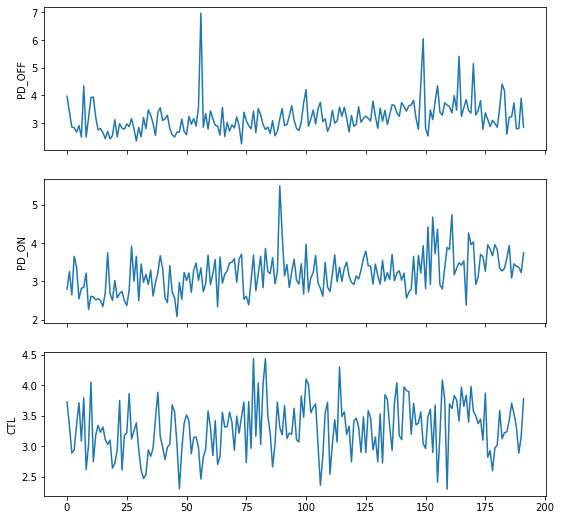

In [135]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
time_window_index = 5
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i],:,:,time_window_index,1],axis=2)
    assert Temp.shape[0] == dict[i].shape[0]
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])


##### Not_colored Plot over trials for a subject

<StemContainer object of 3 artists>

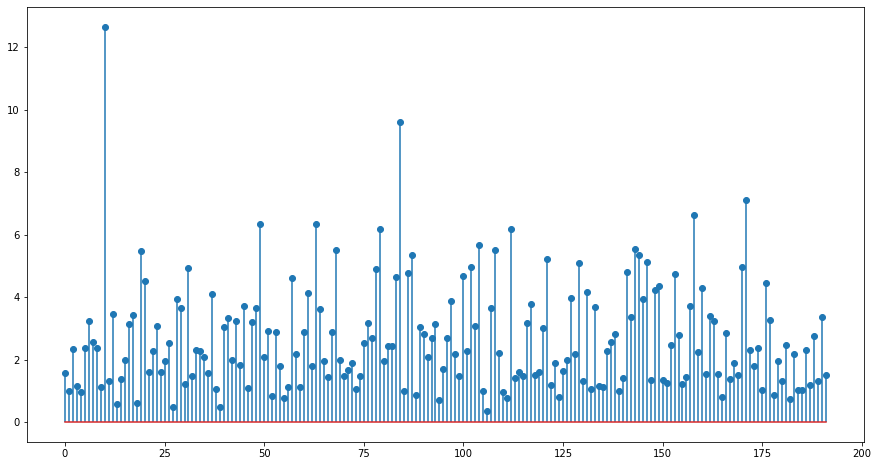

In [129]:
plt.figure(figsize=(15,8))
time_window_index = 2
i = 2
Fz_phase = 0
sub_index = dict[i][0]
Temp = np.mean(PAC_mutual_over_trials_Fz_Fc4[sub_index,:,:,time_window_index,Fz_phase],axis=1)
trial_index = np.arange(192)
plt.stem(trial_index,Temp)


##### Colored Plot of PAC and surprise over trials for a subject 

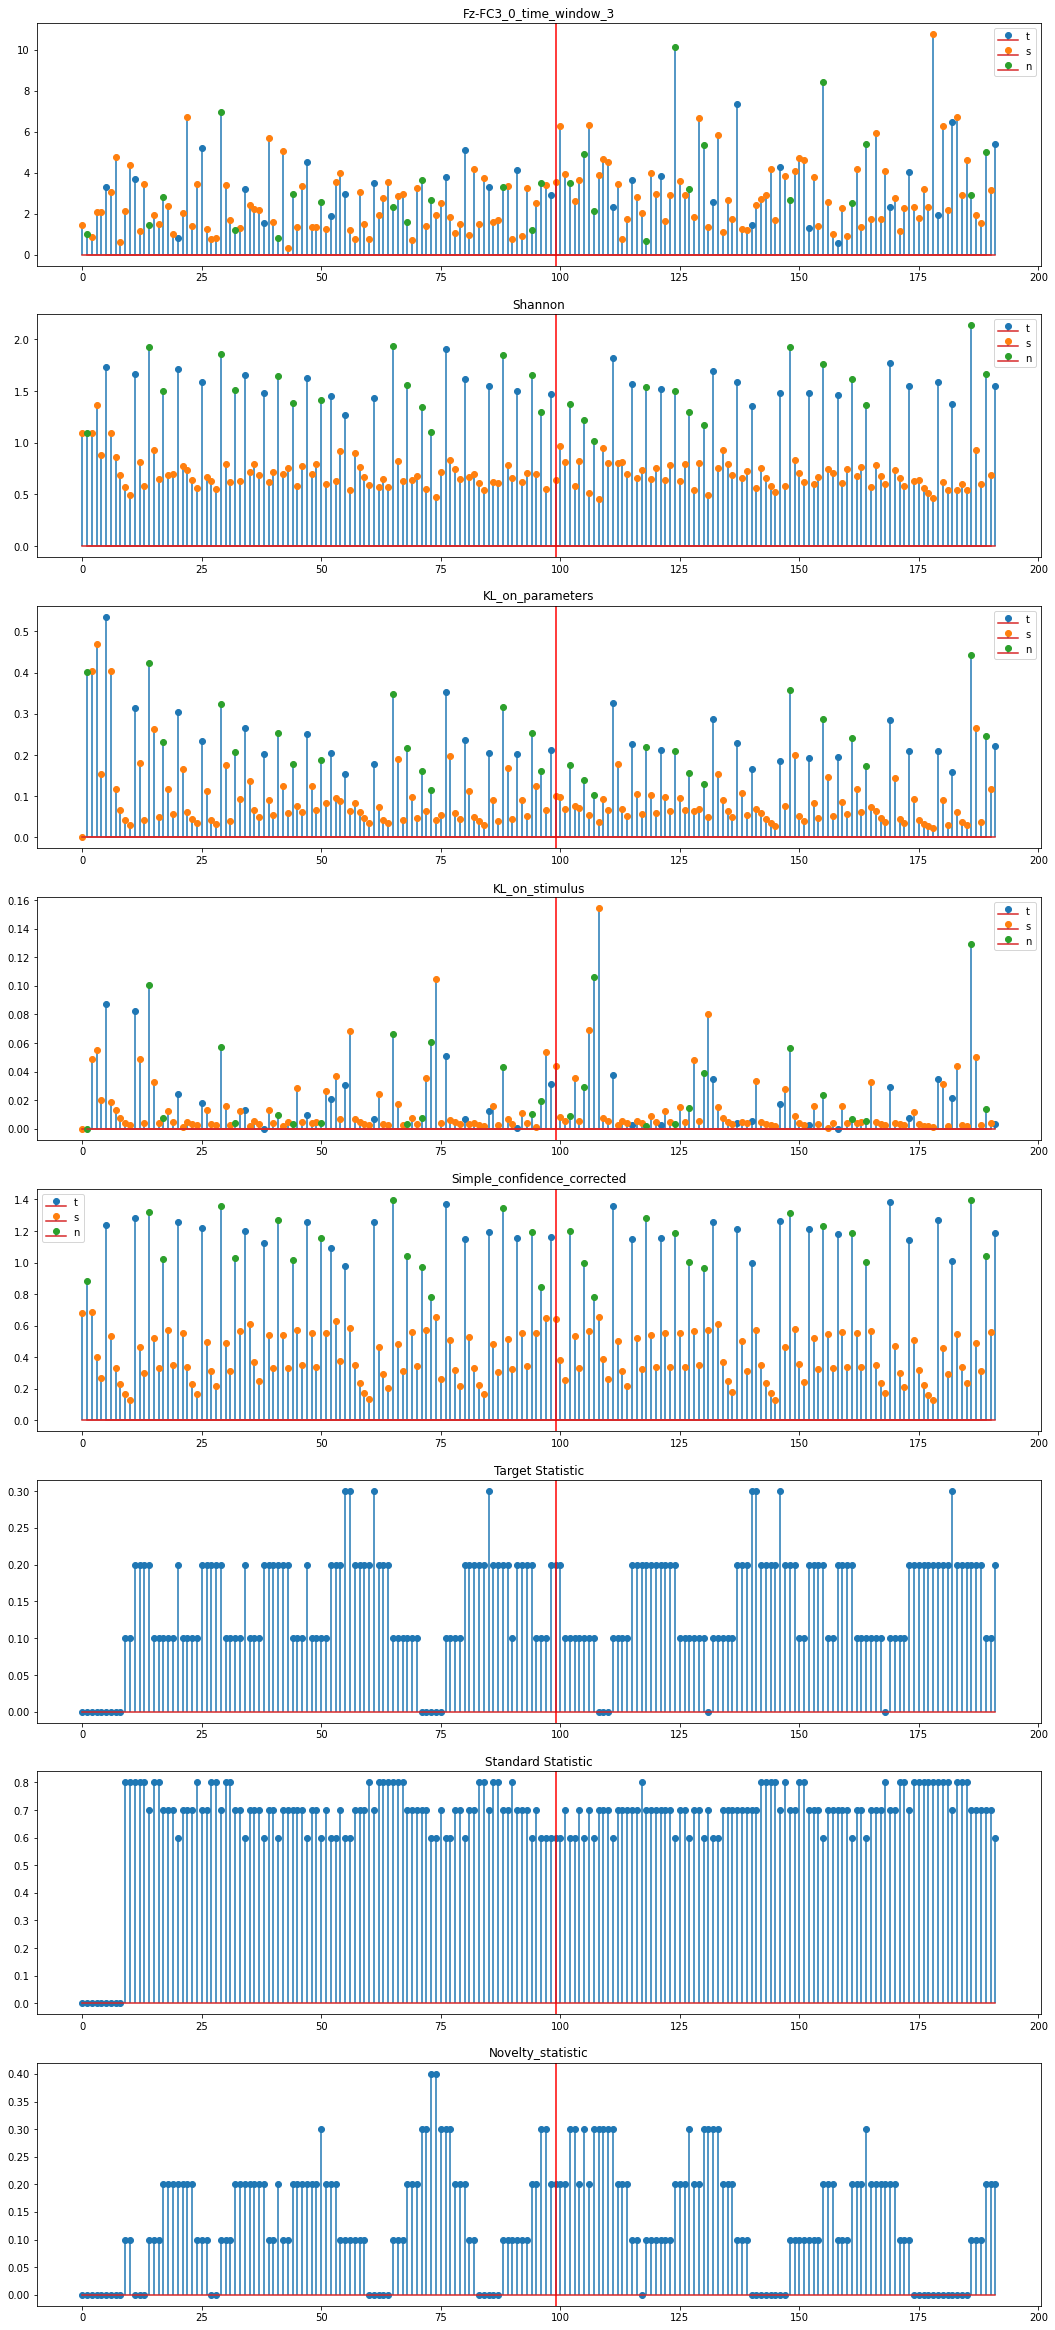

In [199]:
fig, ax = plt.subplots(8,1,figsize=(18,42))

Fz_phase = 0
time_window_index = 3
i = 2
sub_index = dict[i][1]
color = np.zeros(shape=(3,192))
# color[0] = (stimulus_necessary[sub_index] == 0) 
# color[1] = (stimulus_necessary[sub_index] == 1)
# color[2] = (stimulus_necessary[sub_index]  == 2) 
trial_index = np.arange(192)
PAC = np.mean(PAC_mutual_over_trials_Fz_Fc4[sub_index,:,:,time_window_index,Fz_phase],axis=1)
# assert Temp.shape[0] == 25
assert PAC.shape[0] == 192
# Temp1 = np.mean(Temp,ax[0]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[0].stem(trial_index[flag1], PAC[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[0].stem(trial_index[flag1], PAC[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[0].stem(trial_index[flag1], PAC[flag1], markerfmt='o', label='n')

ax[0].set_title(f'Fz-FC3_{Fz_phase}_time_window_{time_window_index}')
ax[0].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[0].legend()

### Surprise_three_KL_on_stimulus

Sur = Surprise_three_KL_on_stimulus_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Sur.shape[0] == 192
# Temp1 = np.mean(Temp,ax[1]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[3].stem(trial_index[flag1], Sur[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[3].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[3].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='n')

ax[3].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[3].set_title('KL_on_stimulus')
ax[3].legend()

# Surprise KL on parameters 

Sur = Surprise_three_KL_on_parameter_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Sur.shape[0] == 192
# Temp1 = np.mean(Temp,ax[1]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[2].stem(trial_index[flag1], Sur[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[2].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[2].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='n')

ax[2].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[2].set_title('KL_on_parameters')
ax[2].legend()




# Surprise Shannon

Sur = Surprise_three_shannon_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Sur.shape[0] == 192
# Temp1 = np.mean(Temp,ax[1]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[1].stem(trial_index[flag1], Sur[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[1].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[1].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='n')

ax[1].set_title('Shannon')
ax[1].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[1].legend()


Sur = Surprise_confidence_corrected_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Sur.shape[0] == 192
# Temp1 = np.mean(Temp,ax[1]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[4].stem(trial_index[flag1], Sur[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[4].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[4].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='n')

ax[4].set_title('Simple_confidence_corrected')
ax[4].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[4].legend()

j = 5

window_length = 10
window_weight = np.ones(shape=(window_length,))/window_length
flag1 = stimulus_necessary[sub_index] == 0
static_target = np.convolve(flag1,window_weight,mode='valid')

temp = np.zeros(shape=(192,))
temp[9:] = static_target
static_target_new = temp


ax[j].set_title('Target Statistic')
ax[j].stem(static_target_new)
ax[j].axvline(x = end_first_block_index[sub_index][0],color='r')


flag1 = stimulus_necessary[sub_index] == 1
static_standard = np.convolve(flag1,window_weight,mode='valid')

temp = np.zeros(shape=(192,))
temp[9:] = static_standard
static_standard_new = temp

ax[j+1].set_title('Standard Statistic')
ax[j+1].stem(static_standard_new)
ax[j+1].axvline(x = end_first_block_index[sub_index][0],color='r')


flag1 = stimulus_necessary[sub_index] == 2
static_novelty = np.convolve(flag1,window_weight,mode='valid')

temp = np.zeros(shape=(192,))
temp[9:] = static_novelty
static_novelty_new = temp

ax[j+2].set_title('Novelty_statistic')
ax[j+2].stem(static_novelty_new)
ax[j+2].axvline(x = end_first_block_index[sub_index][0],color='r')

##### Correlation Box plot for groups

In [58]:
Correlations_Fz_Fc4 = np.zeros(shape=(3,4,25))
# fig, ax = plt.subplots(3,1)
Stimulus_type = 0 # stimulus which correlation should be applied
time_window_index = 2
Fz_phase = 0
for i in np.arange(3):
    for k,sub in enumerate(dict[i]):
        Start_index = 0
        End_index = end_first_block_index[sub][0]
        # End_index = 192
        # Stimulus_types = stimulus_necessary[sub]
        Flag_analysis = np.ones(shape=(End_index-Start_index,)) == 1
        # Flag_analysis = Stimulus_types[Start_index:End_index] == Stimulus_type
         
        PAC = np.mean(PAC_mutual_over_trials_Fz_Fc4[sub,:,:,time_window_index,Fz_phase],axis=1)
        b = PAC[Start_index:End_index][Flag_analysis]
        min_b = np.min(b)
        max_b = np.max(b)
        b = (b-min_b)/(max_b-min_b)
        
        Sur = Surprise_three_KL_on_stimulus_removed_change_size[sub]
        perumute = np.arange(End_index-Start_index)
        a = Sur[Start_index:End_index][perumute][Flag_analysis]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc4[i,0,k] = np.mean(c)/(np.std(a) * np.std(b))



        Sur = Surprise_three_KL_on_parameter_removed_change_size[sub]
        perumute = np.arange(End_index-Start_index)
        a = Sur[Start_index:End_index][perumute][Flag_analysis]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc4[i,1,k] = np.mean(c)/(np.std(a) * np.std(b))


        Sur = Surprise_three_shannon_removed_change_size[sub]
        perumute = np.arange(End_index-Start_index)
        a = Sur[Start_index:End_index][perumute][Flag_analysis]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc4[i,2,k] = np.mean(c)/(np.std(a) * np.std(b))


        Sur = Surprise_confidence_corrected_removed_change_size[sub]
        perumute = np.arange(End_index-Start_index)
        a = Sur[Start_index:End_index][perumute][Flag_analysis]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc4[i,3,k] = np.mean(c)/(np.std(a) * np.std(b))

In [50]:
np.any([1,0,1])

True

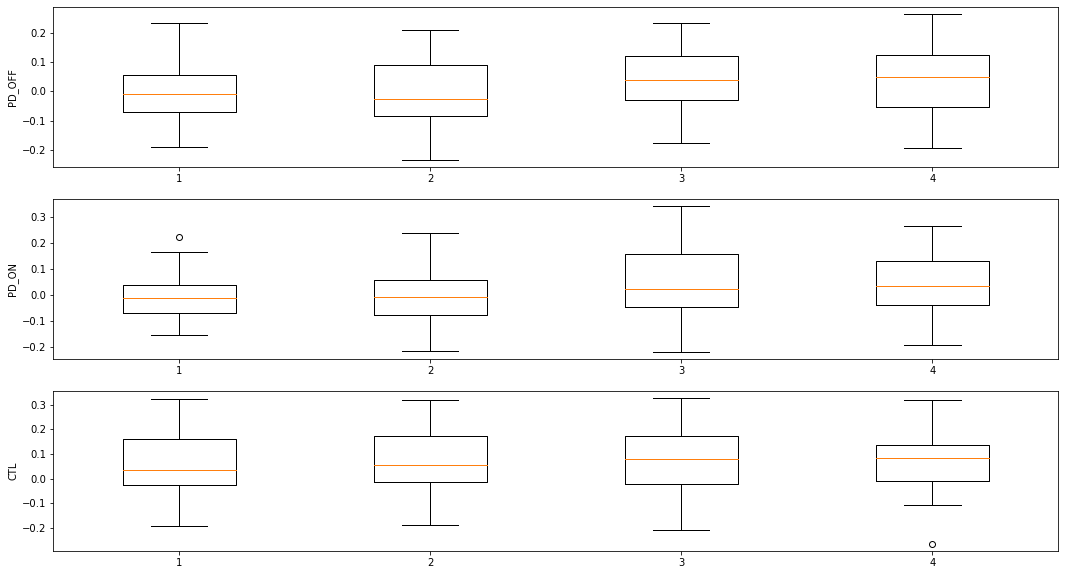

In [59]:
fig,ax = plt.subplots(3,1,figsize=(18,10))
for i in np.arange(3):
        ax[i].boxplot(np.transpose(Correlations_Fz_Fc4[i]))
        ax[i].set_ylabel(Group_name[i])

##### Check different way of relating statistic change to PAC

###### Euclidean distance between statistic of previous and current time

In [33]:
Correlations_Fz_Fc4_statistic = np.zeros(shape=(3,25))
# fig, ax = plt.subplots(3,1)
Stimulus_type = 0 # stimulus which correlation should be applied
time_window_index = 3
Fz_phase = 1
for i in np.arange(3):
    for k,sub in enumerate(dict[i]):
        Start_index = 0
        End_index = end_first_block_index[sub][0]
        # End_index = 192
        Stimulus_types = real_stimulus[sub][0]
        # Flag_analysis = np.ones(shape=(End_index,)) == 1
        # Flag_analysis = Stimulus_types[0,Start_index:End_index] == Stimulus_type
         
        PAC = np.mean(PAC_mutual_over_trials_Fz_Fc4[sub,:,:,time_window_index,Fz_phase],axis=1)
        b = PAC[Start_index+10:End_index]

        min_b = np.min(b)
        max_b = np.max(b)
        b = (b-min_b)/(max_b-min_b)
        window_length = 10
        window_weight = np.ones(shape=(window_length,))/window_length
        flag1 = stimulus_necessary[sub][Start_index:End_index] == 0
        static_target = np.convolve(flag1,window_weight,mode='valid')

        flag1 = stimulus_necessary[sub][Start_index:End_index] == 1
        static_standard = np.convolve(flag1,window_weight,mode='valid')

        flag1 = stimulus_necessary[sub][Start_index:End_index] == 2
        static_novelty = np.convolve(flag1,window_weight,mode='valid')

        temp = static_novelty + static_standard + static_target

        assert np.linalg.norm(temp-1) < 10e-15
        
        temp = np.zeros(shape=(End_index-Start_index,))


        Sur = static_standard[0:-1]*np.abs(static_standard[1:]-static_standard[0:-1]) + static_novelty[0:-1] * np.abs(static_novelty[1:]-static_novelty[0:-1]) + static_target[0:-1] * np.abs(static_target[1:]-static_target[0:-1])
        temp[10:] = Sur
        Sur = temp
        perumute = np.arange(End_index-(Start_index+10))
        a = Sur[Start_index+10:End_index][perumute]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc4_statistic[i,k] = np.mean(c)/(np.std(a) * np.std(b))



        # Sur = Surprise_three_KL_on_parameter_removed_change_size[sub]
        # perumute = np.arange(End_index)
        # a = Sur[Start_index:End_index][perumute]
        # min_a = np.min(a)
        # max_a = np.max(a)
        # a = (a-min_a)/(max_a-min_a)
        # c = (a - np.mean(a)) * (b - np.mean(b))
        # Correlations_Fz_Fc4[i,1,k] = np.mean(c)/(np.std(a) * np.std(b))


        # Sur = Surprise_three_shannon_removed_change_size[sub]
        # perumute = np.arange(End_index)
        # a = Sur[Start_index:End_index][perumute]
        # min_a = np.min(a)
        # max_a = np.max(a)
        # a = (a-min_a)/(max_a-min_a)
        # c = (a - np.mean(a)) * (b - np.mean(b))
        # Correlations_Fz_Fc4[i,2,k] = np.mean(c)/(np.std(a) * np.std(b))


        # Sur = Surprise_confidence_corrected_removed_change_size[sub]
        # perumute = np.arange(End_index)
        # a = Sur[Start_index:End_index][perumute]
        # min_a = np.min(a)
        # max_a = np.max(a)
        # a = (a-min_a)/(max_a-min_a)
        # c = (a - np.mean(a)) * (b - np.mean(b))
        # Correlations_Fz_Fc4[i,3,k] = np.mean(c)/(np.std(a) * np.std(b))


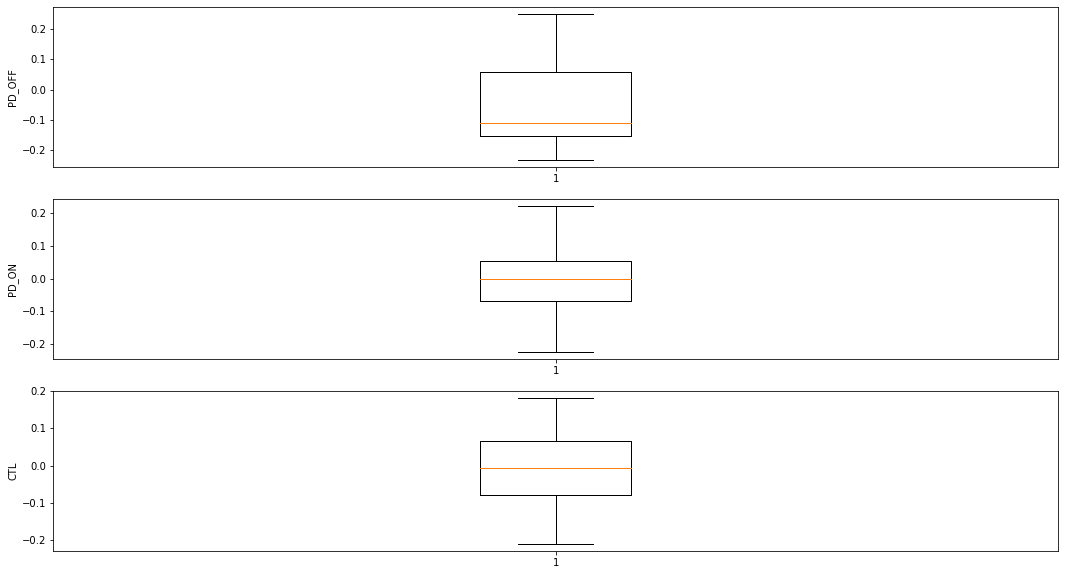

In [34]:
fig,ax = plt.subplots(3,1,figsize=(18,10))
for i in np.arange(3):
        ax[i].boxplot(np.transpose(Correlations_Fz_Fc4_statistic[i]))
        ax[i].set_ylabel(Group_name[i])

In [21]:
mean_a = np.mean(Correlations_Fz_Fc4_statistic[0])
std_a = np.std(Correlations_Fz_Fc4_statistic[0])
print(mean_a)
print(std_a)

0.003728707833860737
0.10658617803853103


##### 2D plot of PAC and Surprise for each subject

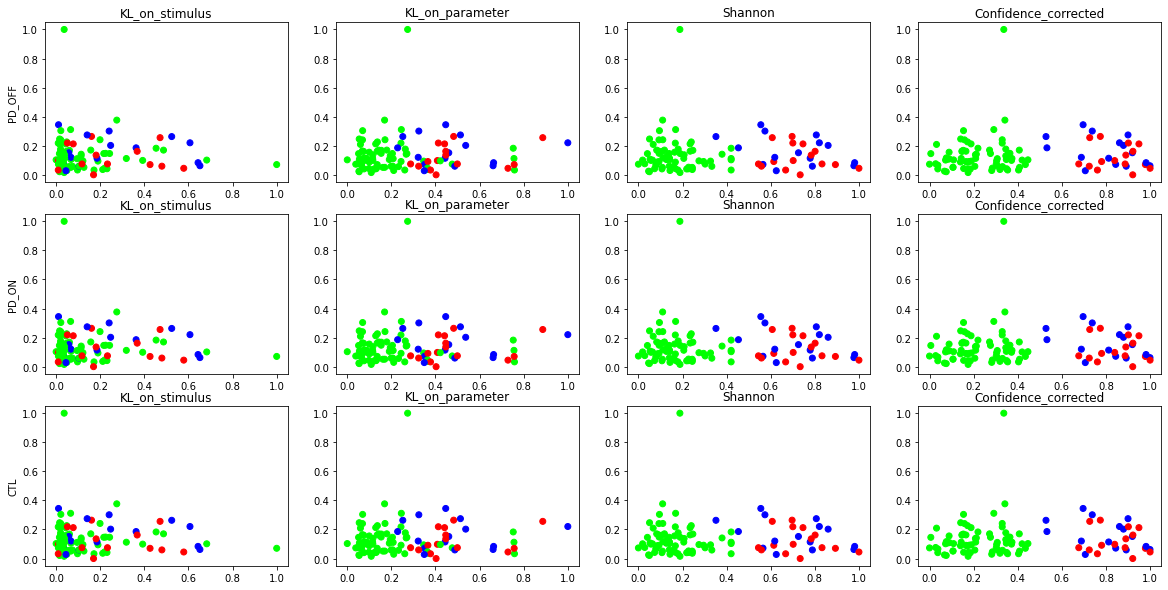

In [56]:
fig, ax = plt.subplots(3,4,figsize=(20,10))
k = 2
j= 10
sub = dict[k][j]
for i in np.arange(3):
    Start_index = 0
    End_index = end_first_block_index[sub][0]
    PAC = np.mean(PAC_mutual_over_trials_Fz_Fc4[sub,:,:,time_window_index,Fz_phase],axis=1)
    b = PAC[Start_index:End_index]
    min_b = np.min(b)
    max_b = np.max(b)
    b = (b-min_b)/(max_b-min_b)
    
    color = np.zeros(shape=(End_index-Start_index,3))
    color[:,0] = stimulus_necessary[sub][Start_index:End_index] == 0
    color[:,1] = stimulus_necessary[sub][Start_index:End_index] == 1
    color[:,2] = stimulus_necessary[sub][Start_index:End_index] == 2

    Sur = Surprise_three_KL_on_stimulus_removed_change_size[sub]
    perumute = np.arange(End_index-Start_index)
    a = Sur[Start_index:End_index][perumute]
    min_a = np.min(a)
    max_a = np.max(a)
    a = (a-min_a)/(max_a-min_a)

    ax[i,0].scatter(a,b,c=color)
    ax[i,0].set_ylabel(Group_name[i])
    ax[i,0].set_title('KL_on_stimulus')
    
    Sur = Surprise_three_KL_on_parameter_removed_change_size[sub]
    perumute = np.arange(End_index-Start_index)
    a = Sur[Start_index:End_index][perumute]
    min_a = np.min(a)
    max_a = np.max(a)
    a = (a-min_a)/(max_a-min_a)
    ax[i,1].scatter(a,b,c=color)
    ax[i,1].set_title('KL_on_parameter')

    Sur = Surprise_three_shannon_removed_change_size[sub]
    perumute = np.arange(End_index-Start_index)
    a = Sur[Start_index:End_index][perumute]
    min_a = np.min(a)
    max_a = np.max(a)
    a = (a-min_a)/(max_a-min_a)
    ax[i,2].scatter(a,b,c=color)
    ax[i,2].set_title('Shannon')

    Sur = Surprise_confidence_corrected_removed_change_size[sub]
    perumute = np.arange(End_index)
    a = Sur[Start_index:End_index][perumute]
    min_a = np.min(a)
    max_a = np.max(a)
    a = (a-min_a)/(max_a-min_a)
    ax[i,3].scatter(a,b,c=color)
    ax[i,3].set_title('Confidence_corrected')


#### Fz-FC3

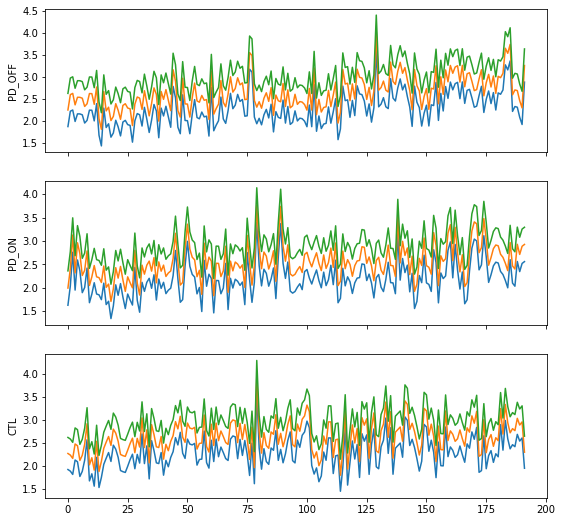

In [37]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
time_window_index = 0
Fz_amplitude = 1
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_amplitude],axis=2)
    assert Temp.shape[0] == dict[i].shape[0]
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    Temp1_std = np.std(Temp1,axis=0)
    ax[i].plot(Temp1-Temp1_std)
    ax[i].plot(Temp1)
    ax[i].plot(Temp1+Temp1_std)
    ax[i].set_ylabel(Group_name[i])

##### Not_colored Plot over trials for a subject

<StemContainer object of 3 artists>

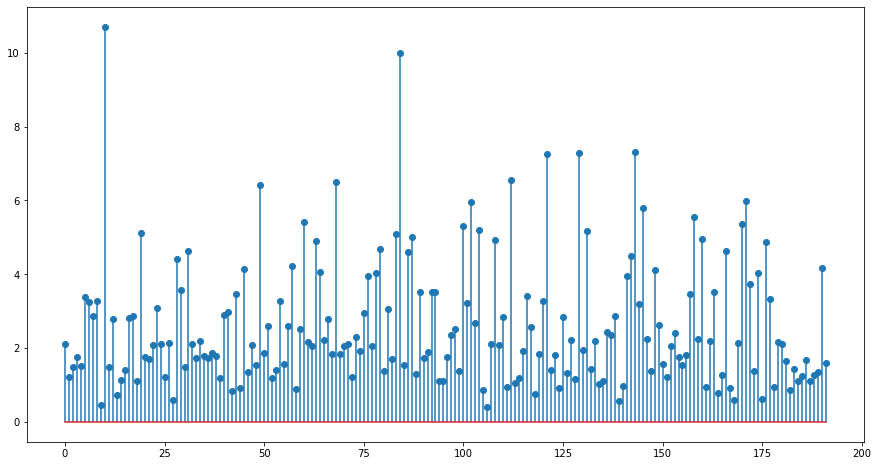

In [35]:
plt.figure(figsize=(15,8))
time_window_index = 2
i = 2
Fz_phase = 0
sub_index = dict[i][0]
Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[sub_index,:,:,time_window_index,Fz_phase],axis=1)
trial_index = np.arange(192)
plt.stem(trial_index,Temp)

##### Colored Plot of PAC and surprise over trials for a subject

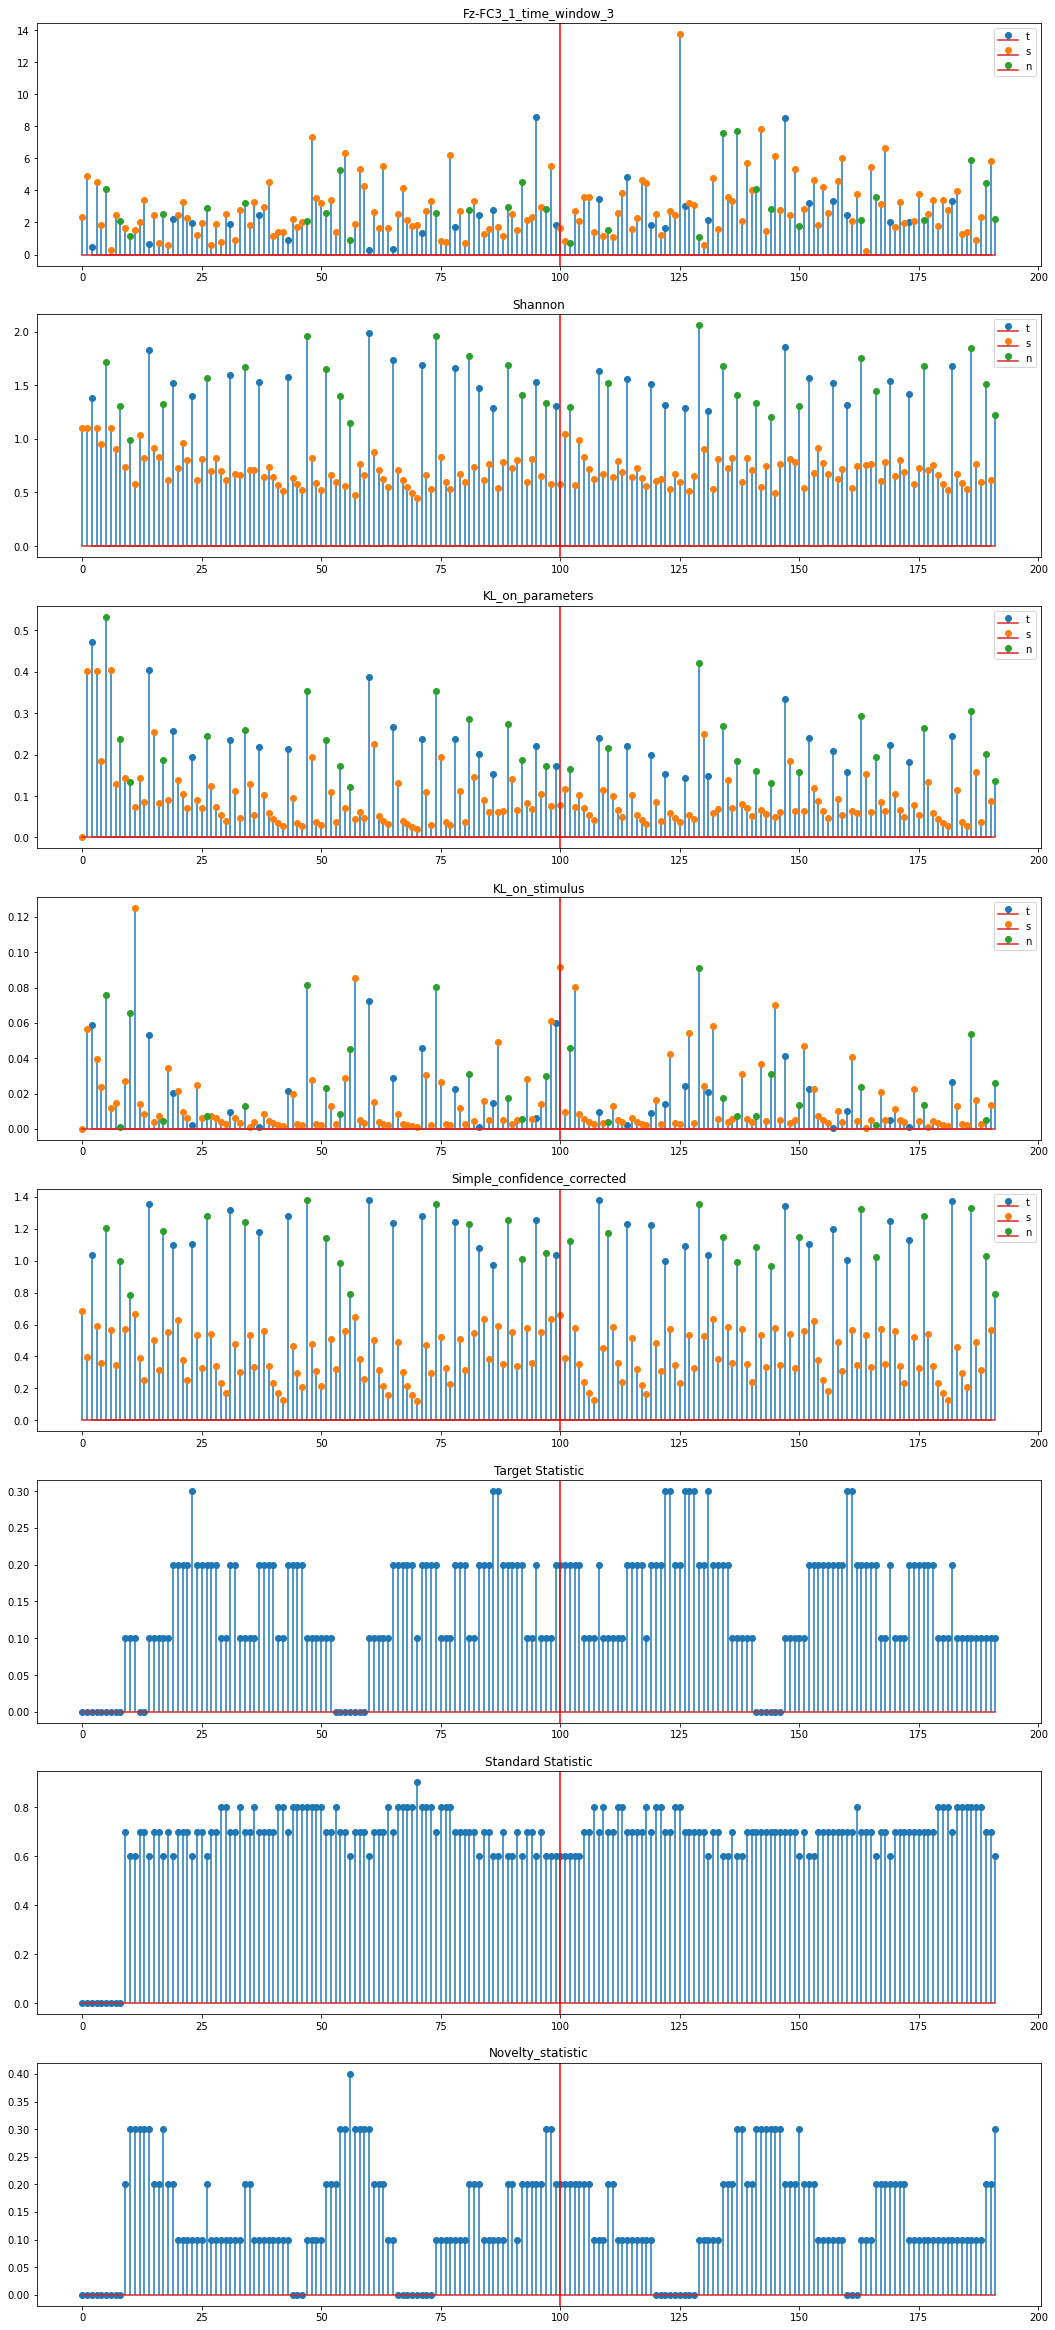

In [57]:
fig, ax = plt.subplots(8,1,figsize=(18,42))

Fz_phase = 1
time_window_index = 3
i = 2
sub_index = dict[i][10]
color = np.zeros(shape=(3,192))
# color[0] = (stimulus_necessary[sub_index] == 0) 
# color[1] = (stimulus_necessary[sub_index] == 1)
# color[2] = (stimulus_necessary[sub_index]  == 2) 
trial_index = np.arange(192)
PAC = np.mean(PAC_mutual_over_trials_Fz_Fc3[sub_index,:,:,time_window_index,Fz_phase],axis=1)
# assert Temp.shape[0] == 25
assert PAC.shape[0] == 192
# Temp1 = np.mean(Temp,ax[0]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[0].stem(trial_index[flag1], PAC[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[0].stem(trial_index[flag1], PAC[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[0].stem(trial_index[flag1], PAC[flag1], markerfmt='o', label='n')

ax[0].set_title(f'Fz-FC3_{Fz_phase}_time_window_{time_window_index}')
ax[0].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[0].legend()

### Surprise_three_KL_on_stimulus

Sur = Surprise_three_KL_on_stimulus_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Sur.shape[0] == 192
# Temp1 = np.mean(Temp,ax[1]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[3].stem(trial_index[flag1], Sur[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[3].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[3].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='n')

ax[3].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[3].set_title('KL_on_stimulus')
ax[3].legend()

# Surprise KL on parameters 

Sur = Surprise_three_KL_on_parameter_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Sur.shape[0] == 192
# Temp1 = np.mean(Temp,ax[1]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[2].stem(trial_index[flag1], Sur[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[2].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[2].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='n')

ax[2].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[2].set_title('KL_on_parameters')
ax[2].legend()




# Surprise Shannon

Sur = Surprise_three_shannon_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Sur.shape[0] == 192
# Temp1 = np.mean(Temp,ax[1]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[1].stem(trial_index[flag1], Sur[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[1].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[1].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='n')

ax[1].set_title('Shannon')
ax[1].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[1].legend()


Sur = Surprise_confidence_corrected_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Sur.shape[0] == 192
# Temp1 = np.mean(Temp,ax[1]is=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = ax[4].stem(trial_index[flag1], Sur[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = ax[4].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = ax[4].stem(trial_index[flag1], Sur[flag1], markerfmt='o', label='n')

ax[4].set_title('Simple_confidence_corrected')
ax[4].axvline(x = end_first_block_index[sub_index][0],color='r')
ax[4].legend()

j = 5

window_length = 10
window_weight = np.ones(shape=(window_length,))/window_length
flag1 = stimulus_necessary[sub_index] == 0
static_target = np.convolve(flag1,window_weight,mode='valid')

temp = np.zeros(shape=(192,))
temp[9:] = static_target
static_target_new = temp


ax[j].set_title('Target Statistic')
ax[j].stem(static_target_new)
ax[j].axvline(x = end_first_block_index[sub_index][0],color='r')


flag1 = stimulus_necessary[sub_index] == 1
static_standard = np.convolve(flag1,window_weight,mode='valid')

temp = np.zeros(shape=(192,))
temp[9:] = static_standard
static_standard_new = temp

ax[j+1].set_title('Standard Statistic')
ax[j+1].stem(static_standard_new)
ax[j+1].axvline(x = end_first_block_index[sub_index][0],color='r')


flag1 = stimulus_necessary[sub_index] == 2
static_novelty = np.convolve(flag1,window_weight,mode='valid')

temp = np.zeros(shape=(192,))
temp[9:] = static_novelty
static_novelty_new = temp

ax[j+2].set_title('Novelty_statistic')
ax[j+2].stem(static_novelty_new)
ax[j+2].axvline(x = end_first_block_index[sub_index][0],color='r')

##### Correlation Box plot for groups

In [66]:
Correlations_Fz_Fc3 = np.zeros(shape=(3,4,25))
# fig, ax = plt.subplots(3,1)
Stimulus_type = 0 # stimulus which correlation should be applied
time_window_index = 2
Fz_phase = 1
for i in np.arange(3):
    for k,sub in enumerate(dict[i]):
        Start_index = 0
        End_index = end_first_block_index[sub][0]
        # End_index = 192
        # Stimulus_types = stimulus_necessary[sub]
        Flag_analysis = np.ones(shape=(End_index-Start_index,)) == 1
        # Flag_analysis = Stimulus_types[Start_index:End_index] == Stimulus_type
         
        PAC = np.mean(PAC_mutual_over_trials_Fz_Fc3[sub,:,:,time_window_index,Fz_phase],axis=1)
        b = PAC[Start_index:End_index][Flag_analysis]
        min_b = np.min(b)
        max_b = np.max(b)
        b = (b-min_b)/(max_b-min_b)
        
        Sur = Surprise_three_KL_on_stimulus_removed_change_size[sub]
        perumute = np.arange(End_index-Start_index)
        a = Sur[Start_index:End_index][perumute][Flag_analysis]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc3[i,0,k] = np.mean(c)/(np.std(a) * np.std(b))



        Sur = Surprise_three_KL_on_parameter_removed_change_size[sub]
        perumute = np.arange(End_index-Start_index)
        a = Sur[Start_index:End_index][perumute][Flag_analysis]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc3[i,1,k] = np.mean(c)/(np.std(a) * np.std(b))


        Sur = Surprise_three_shannon_removed_change_size[sub]
        perumute = np.arange(End_index-Start_index)
        a = Sur[Start_index:End_index][perumute][Flag_analysis]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc3[i,2,k] = np.mean(c)/(np.std(a) * np.std(b))


        Sur = Surprise_confidence_corrected_removed_change_size[sub]
        perumute = np.arange(End_index-Start_index)
        a = Sur[Start_index:End_index][perumute][Flag_analysis]
        min_a = np.min(a)
        max_a = np.max(a)
        a = (a-min_a)/(max_a-min_a)
        c = (a - np.mean(a)) * (b - np.mean(b))
        Correlations_Fz_Fc3[i,3,k] = np.mean(c)/(np.std(a) * np.std(b))

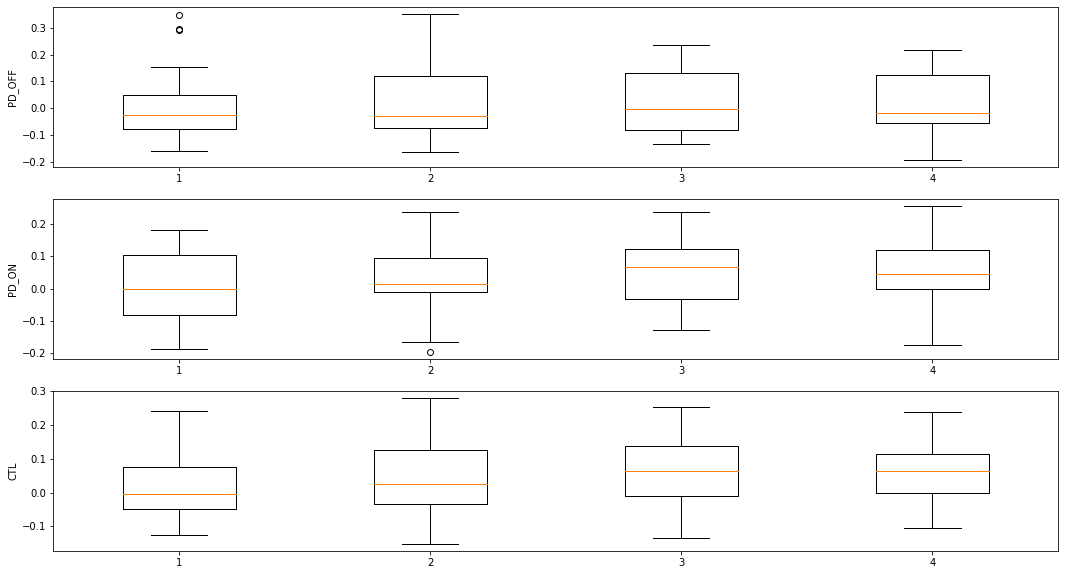

In [67]:
fig,ax = plt.subplots(3,1,figsize=(18,10))
for i in np.arange(3):
        ax[i].boxplot(np.transpose(Correlations_Fz_Fc3[i]))
        ax[i].set_ylabel(Group_name[i])

##### Correlation Box plot for groups

In [71]:
Correlations_Fz_Fc3_per = np.zeros(shape=(3,100,4,25))

# fig, ax = plt.subplots(3,1)
Stimulus_type = 0 # stimulus which correlation should be applied
time_window_index = 2
Fz_phase = 1
for i in np.arange(3):
    for k,sub in enumerate(dict[i]):
        Start_index = 0
        End_index = end_first_block_index[sub][0]
        for j in np.arange(100):
            perumute = np.random.permutation(np.arange(End_index-Start_index))

            # End_index = 192
            # Stimulus_types = stimulus_necessary[sub]
            Flag_analysis = np.ones(shape=(End_index-Start_index,)) == 1
            # Flag_analysis = Stimulus_types[Start_index:End_index] == Stimulus_type
            
            PAC = np.mean(PAC_mutual_over_trials_Fz_Fc3[sub,:,:,time_window_index,Fz_phase],axis=1)
            b = PAC[Start_index:End_index][Flag_analysis]
            min_b = np.min(b)
            max_b = np.max(b)
            b = (b-min_b)/(max_b-min_b)
            
            Sur = Surprise_three_KL_on_stimulus_removed_change_size[sub]
            
            a = Sur[Start_index:End_index][perumute][Flag_analysis]
            min_a = np.min(a)
            max_a = np.max(a)
            a = (a-min_a)/(max_a-min_a)
            c = (a - np.mean(a)) * (b - np.mean(b))
            Correlations_Fz_Fc3_per[i,j,0,k] = np.mean(c)/(np.std(a) * np.std(b))



            Sur = Surprise_three_KL_on_parameter_removed_change_size[sub]
            a = Sur[Start_index:End_index][perumute][Flag_analysis]
            min_a = np.min(a)
            max_a = np.max(a)
            a = (a-min_a)/(max_a-min_a)
            c = (a - np.mean(a)) * (b - np.mean(b))
            Correlations_Fz_Fc3_per[i,j,1,k] = np.mean(c)/(np.std(a) * np.std(b))


            Sur = Surprise_three_shannon_removed_change_size[sub]
            a = Sur[Start_index:End_index][perumute][Flag_analysis]
            min_a = np.min(a)
            max_a = np.max(a)
            a = (a-min_a)/(max_a-min_a)
            c = (a - np.mean(a)) * (b - np.mean(b))
            Correlations_Fz_Fc3_per[i,j,2,k] = np.mean(c)/(np.std(a) * np.std(b))


            Sur = Surprise_confidence_corrected_removed_change_size[sub]
            a = Sur[Start_index:End_index][perumute][Flag_analysis]
            min_a = np.min(a)
            max_a = np.max(a)
            a = (a-min_a)/(max_a-min_a)
            c = (a - np.mean(a)) * (b - np.mean(b))
            Correlations_Fz_Fc3_per[i,j,3,k] = np.mean(c)/(np.std(a) * np.std(b))

(3, 4, 25)


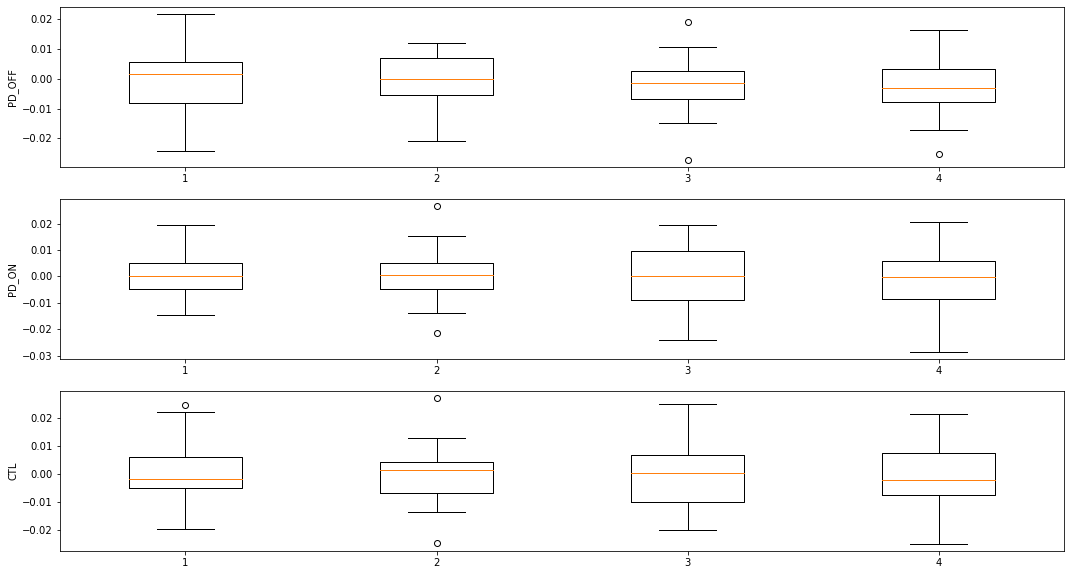

In [72]:
Temp_mean = np.mean(Correlations_Fz_Fc3_per,axis=1)
print(Temp_mean.shape)
fig,ax = plt.subplots(3,1,figsize=(18,10))
for i in np.arange(3):
        ax[i].boxplot(np.transpose(Temp_mean[i]))
        ax[i].set_ylabel(Group_name[i])

(3, 4, 25)


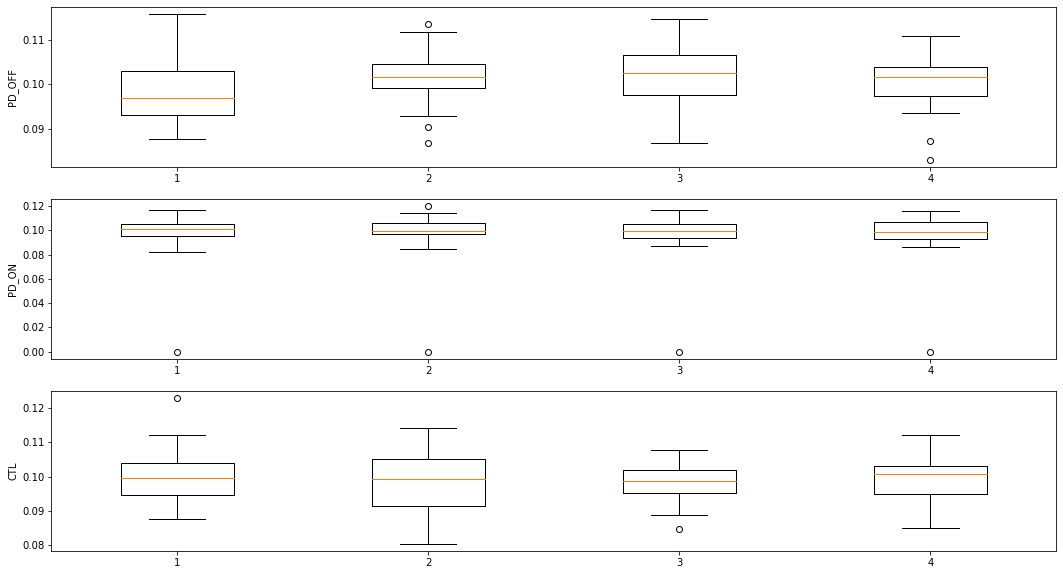

In [73]:
Temp_std = np.std(Correlations_Fz_Fc3_per,axis=1)
print(Temp_std.shape)
fig,ax = plt.subplots(3,1,figsize=(18,10))
for i in np.arange(3):
        ax[i].boxplot(np.transpose(Temp_std[i]))
        ax[i].set_ylabel(Group_name[i])

#### Fz-F4

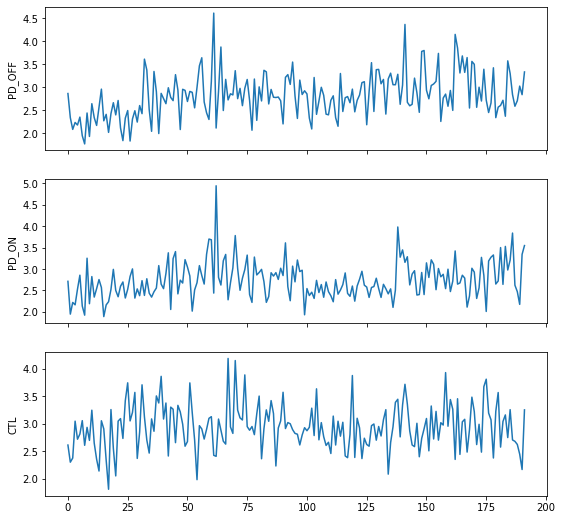

In [31]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F4']
time_window_index = 1
Fz_amplitude = 0
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_amplitude,pair_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])

#### Fz-F3

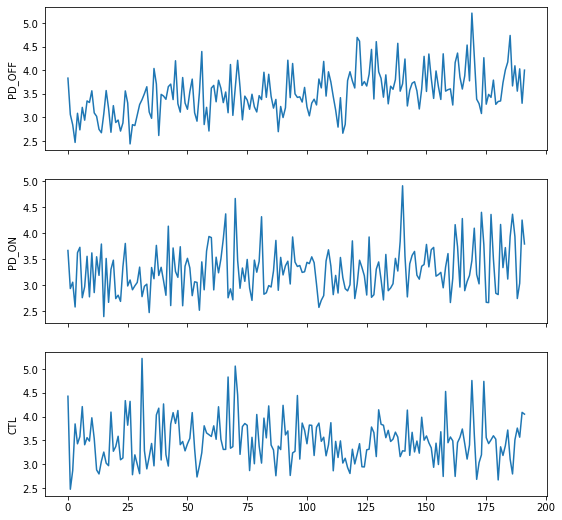

In [32]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F3']
time_window_index = 1
Fz_amplitude = 1
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_amplitude,pair_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])

#### Fz-F4

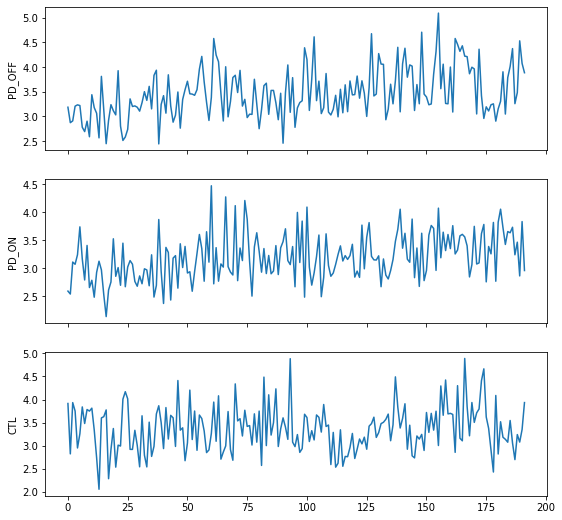

In [33]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F4']
time_window_index = 1
Fz_amplitude = 1
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_amplitude,pair_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])

#### Pz-FC3

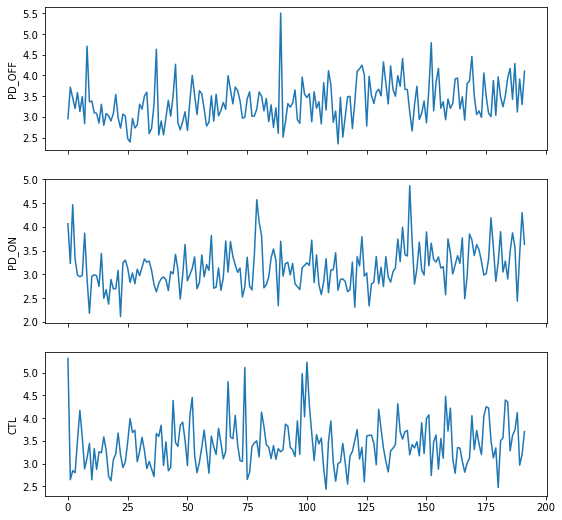

In [35]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-FC3']
time_window_index = 1
Fz_amplitude = 1
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_amplitude,pair_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])

#### Pz-FC4

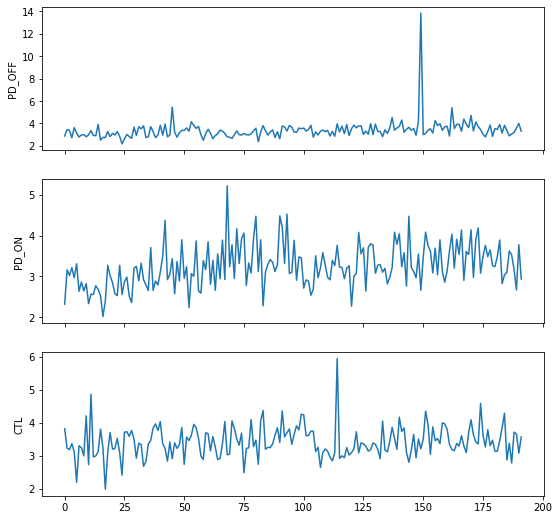

In [36]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-FC4']
time_window_index = 1
Fz_amplitude = 1
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_amplitude,pair_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])

#### Pz-F3

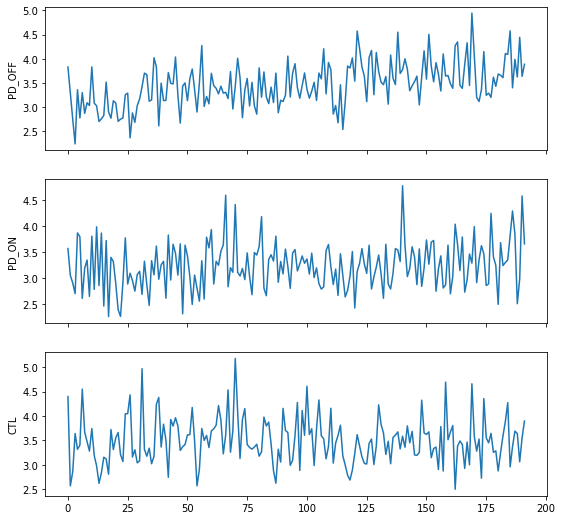

In [37]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-F3']
time_window_index = 1
Fz_amplitude = 1
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_amplitude,pair_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])

#### Pz-F4

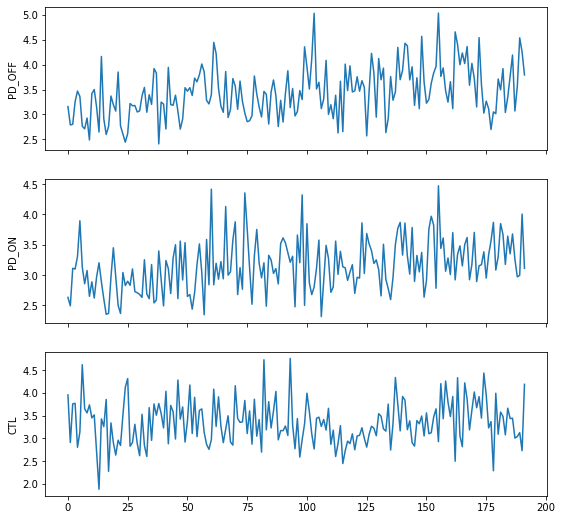

In [38]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-F4']
time_window_index = 1
Fz_amplitude = 1
for i in np.arange(3):
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_amplitude,pair_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])

#### Pz-Pz

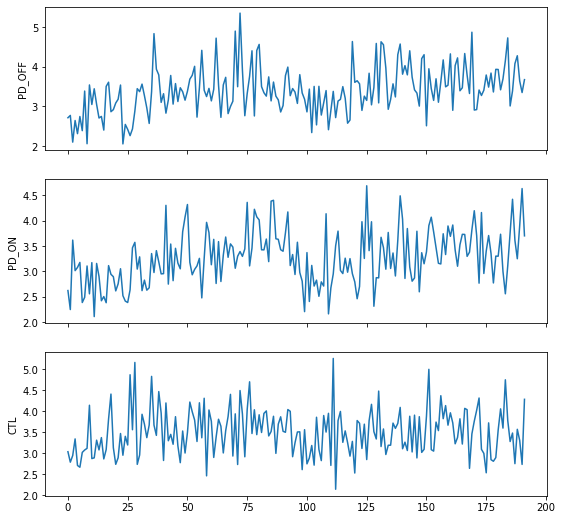

In [47]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
time_window_index = 2
for i in np.arange(3):
    Temp = np.mean(PAC_over_trials_Pz[dict[i],:,:,time_window_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])

#### Fz-Fz

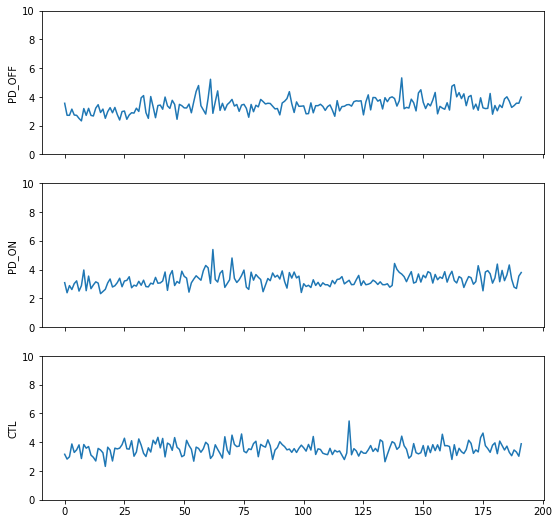

In [51]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
time_window_index = 1
for i in np.arange(3):
    Temp = np.mean(PAC_over_trials_Fz[dict[i],:,:,time_window_index],axis=2)
    assert Temp.shape[0] == 25
    assert Temp.shape[1] == 192
    Temp1 = np.mean(Temp,axis=0)
    ax[i].plot(Temp1)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([0,10])

## Plots of surprise over trials

#### Load Path

In [1]:
Path_save_filter_surprise = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Results\SurpriseCalculations\Removed_unnecessary_ones_by_me_after_check'

### Three State KL on stimulus

#### Load 

In [4]:
Path_saved_KL_on_stimulus = os.path.join(Path_save_filter_surprise,'Surprise_three_KL_on_stimulus_removed_change_size.npy')
Surprise_three_KL_on_stimulus_removed_change_size = np.load(Path_saved_KL_on_stimulus)
Surprise_three_KL_on_stimulus_removed_change_size.shape

(75, 192)

#### Plot mean over trial

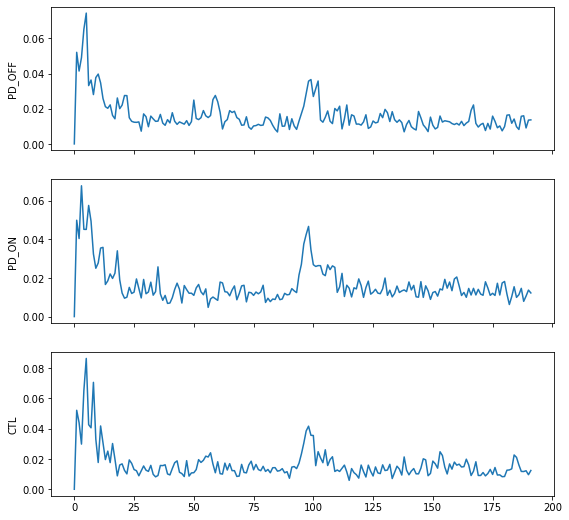

In [12]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
time_window_index = 5
for i in np.arange(3):
    Temp = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    ax[i].plot(Temp)
    ax[i].set_ylabel(Group_name[i])

#### Plot colored surprise over trial for each subject

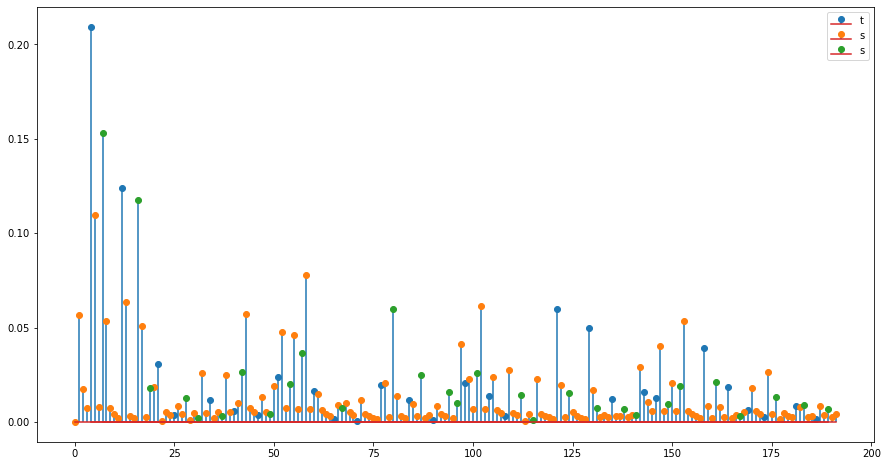

In [131]:
plt.figure(figsize=(15,8))
Fz_amplitude = 0
time_window_index = 5
i = 2
sub_index = dict[i][0]

trial_index = np.arange(192)
Temp = Surprise_three_KL_on_stimulus_removed_change_size[sub_index]
# assert Temp.shape[0] == 25
assert Temp.shape[0] == 192
# Temp1 = np.mean(Temp,pltis=0)

flag1 = stimulus_necessary[sub_index] == 0
markerline, stemlines, baseline = plt.stem(trial_index[flag1], Temp[flag1] , markerfmt='o', label='t')

flag1 = stimulus_necessary[sub_index] == 1
markerline, stemlines, baseline = plt.stem(trial_index[flag1], Temp[flag1], markerfmt='o', label='s')

flag1 = stimulus_necessary[sub_index] == 2
markerline, stemlines, baseline = plt.stem(trial_index[flag1], Temp[flag1], markerfmt='o', label='s')


plt.legend()
plt.show()

### Three State KL on parameter

In [13]:
Path_saved_KL_on_parameter = os.path.join(Path_save_filter_surprise,'Surprise_three_KL_on_parameters_removed_change_size.npy')
Surprise_three_KL_on_parameter_removed_change_size = np.load(Path_saved_KL_on_parameter)
Surprise_three_KL_on_parameter_removed_change_size.shape

(75, 192)

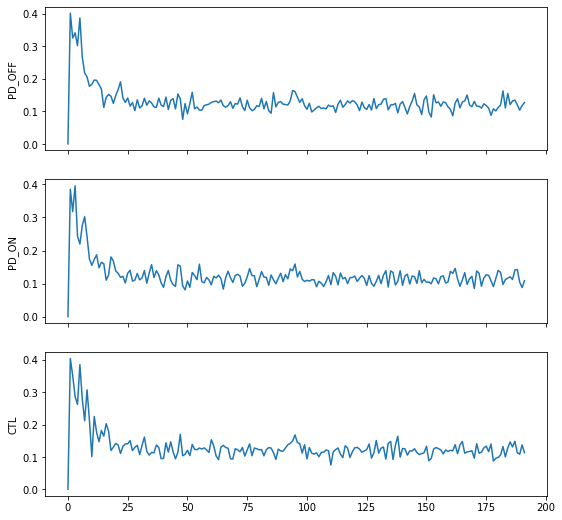

In [14]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))

for i in np.arange(3):
    Temp = np.mean(Surprise_three_KL_on_parameter_removed_change_size[dict[i],:],axis=0)
    ax[i].plot(Temp)
    ax[i].set_ylabel(Group_name[i])

### Three State shannon

In [16]:
Path_saved_KL_on_parameter = os.path.join(Path_save_filter_surprise,'Surprise_three_shannon__removed_change_size.npy')
Surprise_three_shannon_removed_change_size = np.load(Path_saved_KL_on_parameter)
Surprise_three_shannon_removed_change_size.shape

(75, 192)

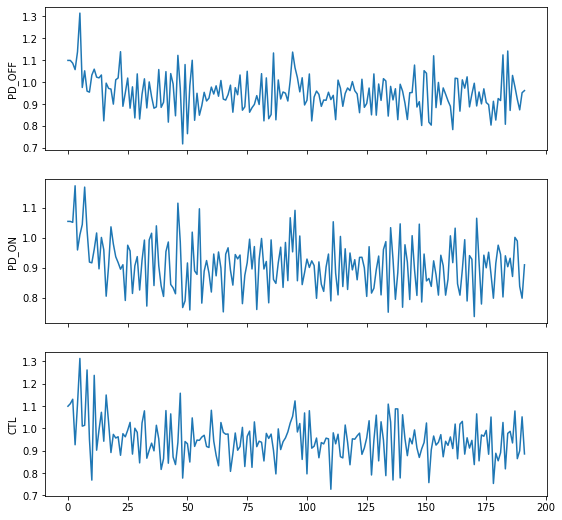

In [17]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
for i in np.arange(3):
    Temp = np.mean(Surprise_three_shannon_removed_change_size[dict[i],:],axis=0)
    ax[i].plot(Temp)
    ax[i].set_ylabel(Group_name[i])

## Surprise PAC Correlation Coefficient

### Three state KL on stimulus

#### Load necessary ones

In [16]:
Path_save_filter_surprise = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Results\SurpriseCalculations\Removed_unnecessary_ones_by_me_after_check'
Path_saved_KL_on_stimulus = os.path.join(Path_save_filter_surprise,'Surprise_three_KL_on_stimulus_removed_change_size.npy')
Surprise_three_KL_on_stimulus_removed_change_size = np.load(Path_saved_KL_on_stimulus)
Surprise_three_KL_on_stimulus_removed_change_size.shape

(75, 192)

#### Fz-FC3 

##### Correlation Between All pairs

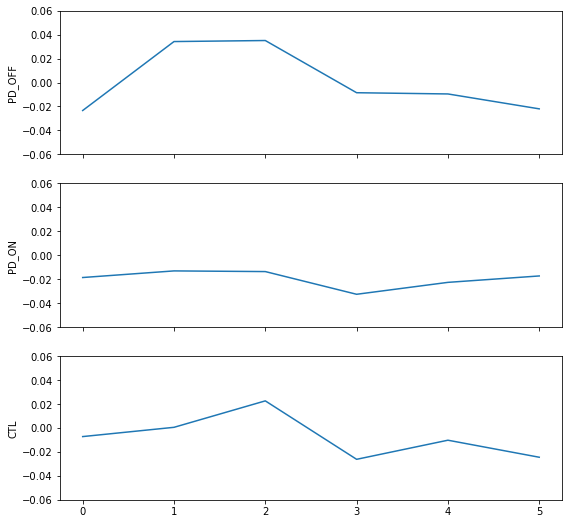

In [100]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == dict[i].shape[0]
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.06])

##### Correlation Between mean PAC and mean Surprise

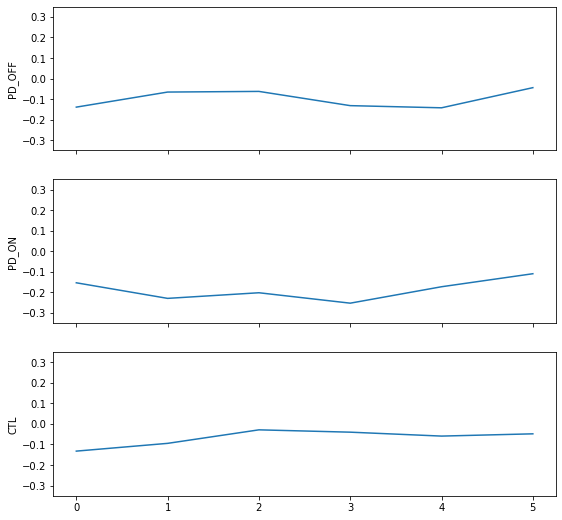

In [102]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == dict[i].shape[0]
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.35,0.35])

##### Mean Correlation Between PAC and Surprise of one subject

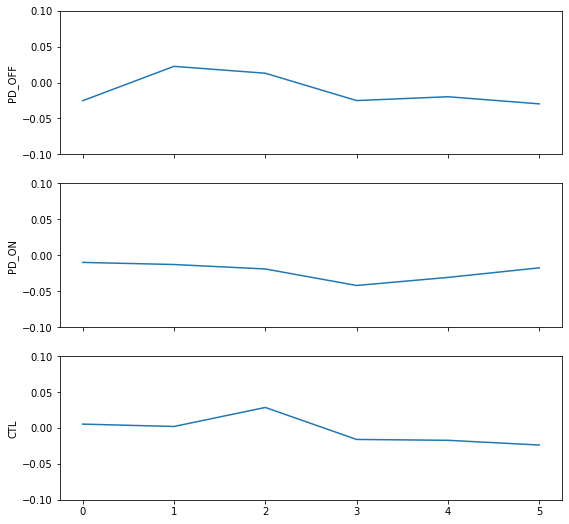

In [12]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
permute = np.arange(192)
for i in np.arange(3):
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        for sub in np.arange(dict[i].shape[0]):
            Sur = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i][sub],:,:,time_window_index,Fz_phase],axis=1)
            PAC = Surprise_three_KL_on_stimulus_removed_change_size[dict[i][sub]][permute]
            c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
            Cor[time_window_index] = (Cor[time_window_index]*sub + np.mean(c)/(np.std(Sur)*np.std(PAC)))/(sub+1)
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.1,0.1])

##### 2D plot for all pairs

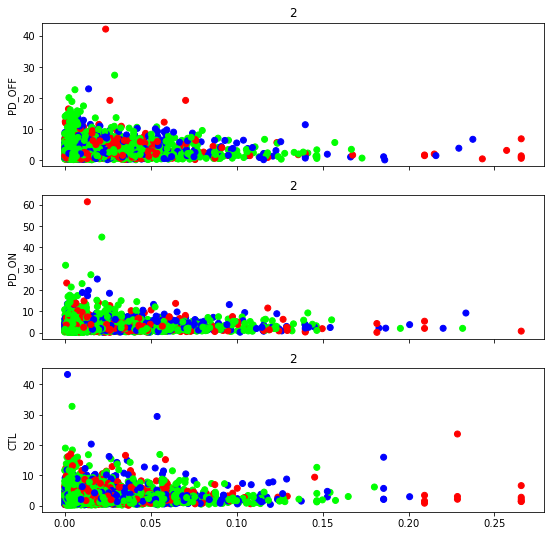

In [71]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 0
time_window_index = 2
for i in np.arange(3):
    Sur = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    Stimulus_types = np.reshape(stimulus_necessary[dict[i],:],newshape=(dict[i].shape[0]*192,))
    color = np.zeros(shape=(3,dict[i].shape[0]*192))
    color[0] = (Stimulus_types == 0) 
    color[1] = (Stimulus_types == 1)
    color[2] = (Stimulus_types == 2) 
    Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_phase],axis=2)
    assert Temp.shape[0] == dict[i].shape[0]
    assert Temp.shape[1] == 192
    PAC = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
    ax[i].scatter(Sur,PAC,c=np.transpose(color))
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_title(f'{time_window_index}')

#### Fz-FC4

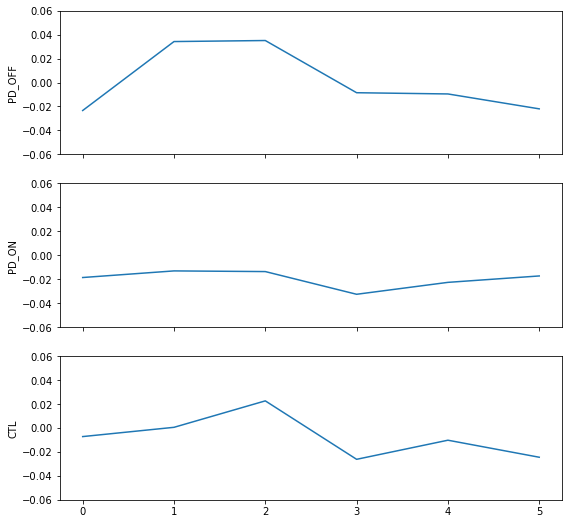

In [77]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == dict[i].shape[0]
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.06])

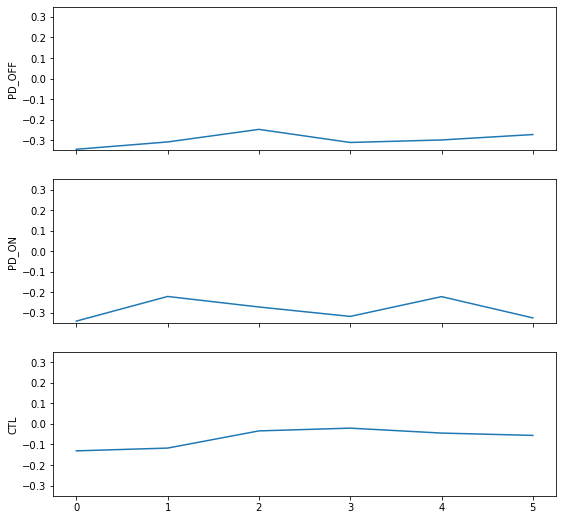

In [53]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.35,0.35])

##### 2D plot for all pairs

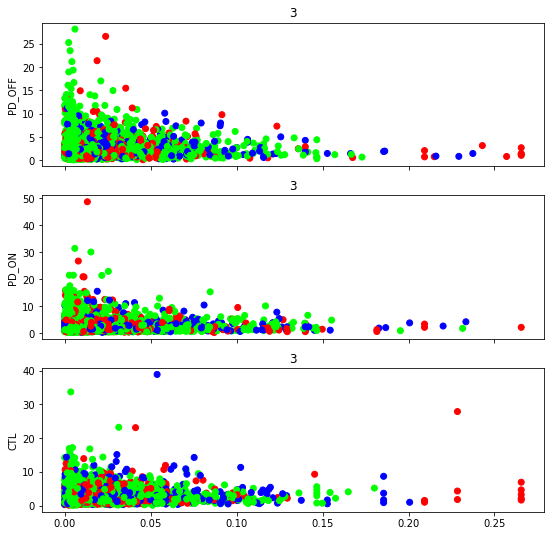

In [73]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 0
time_window_index = 3
for i in np.arange(3):
    Sur = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    Stimulus_types = np.reshape(stimulus_necessary[dict[i],:],newshape=(dict[i].shape[0]*192,))
    color = np.zeros(shape=(3,dict[i].shape[0]*192))
    color[0] = (Stimulus_types == 0) 
    color[1] = (Stimulus_types == 1)
    color[2] = (Stimulus_types == 2) 
    Temp = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i],:,:,time_window_index,Fz_phase],axis=2)
    assert Temp.shape[0] == dict[i].shape[0]
    assert Temp.shape[1] == 192
    PAC = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
    ax[i].scatter(Sur,PAC,c=np.transpose(color))
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_title(f'{time_window_index}')

#### Fz - F3

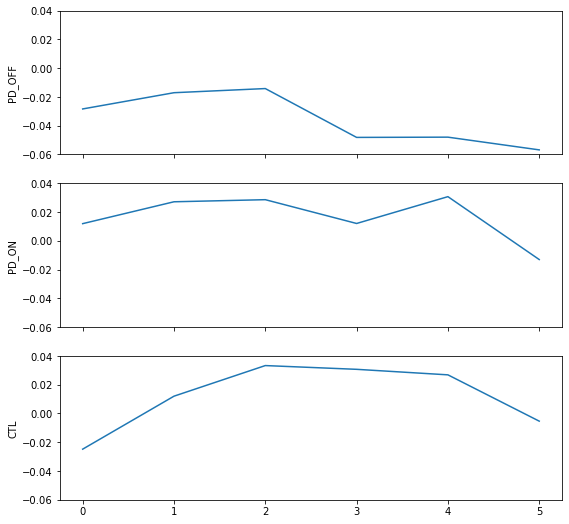

In [60]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F3']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.04])

##### Correlation Between mean PAC and mean Surprise

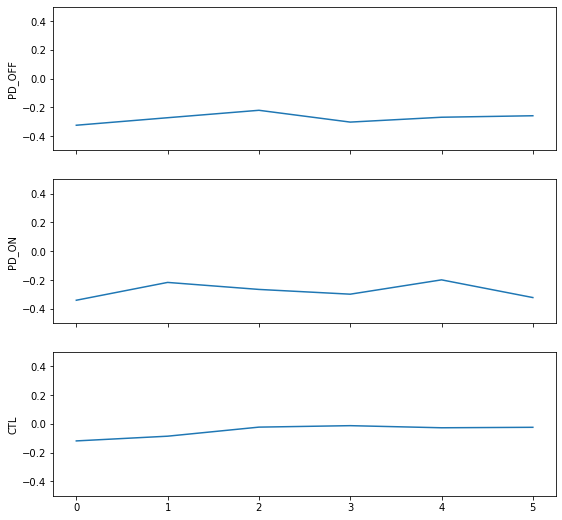

In [20]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F3']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.5,0.5])

##### 2D plots for all pairs

ValueError: cannot reshape array of size 28800 into shape (4800,)

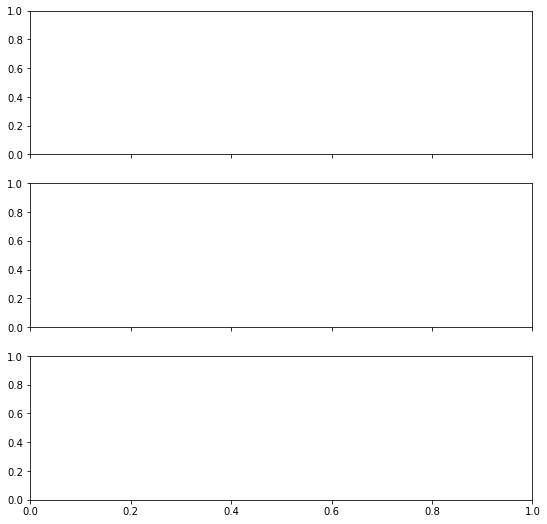

In [74]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F3']
Fz_phase = 0
time_window_index = 2
for i in np.arange(3):
    Sur = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    Stimulus_types = np.reshape(stimulus_necessary[dict[i],:],newshape=(dict[i].shape[0]*192,))
    color = np.zeros(shape=(3,dict[i].shape[0]*192))
    color[0] = (Stimulus_types == 0) 
    color[1] = (Stimulus_types == 1)
    color[2] = (Stimulus_types == 2) 
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,P],axis=2)
    assert Temp.shape[0] == dict[i].shape[0]
    assert Temp.shape[1] == 192
    PAC = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
    ax[i].scatter(Sur,PAC,c=np.transpose(color))
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_title(f'{time_window_index}')

#### Fz-F4

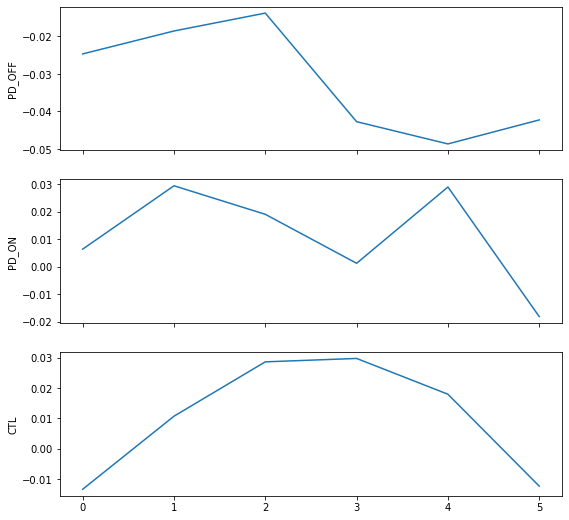

In [33]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F4']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.06])

##### Correlation Between mean PAC and mean Surprise

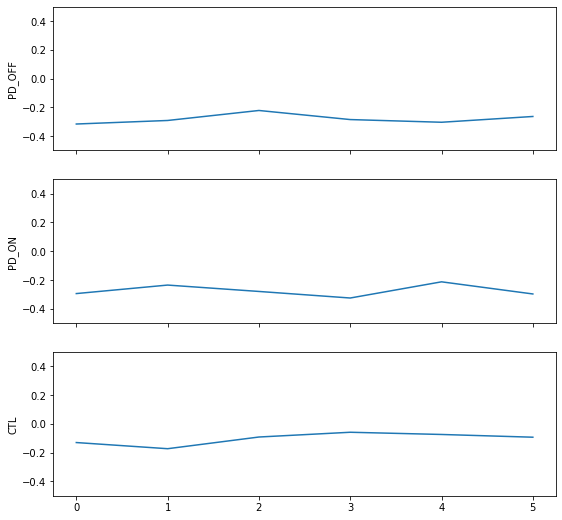

In [34]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F4']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.5,0.5])

#### Pz-FC3

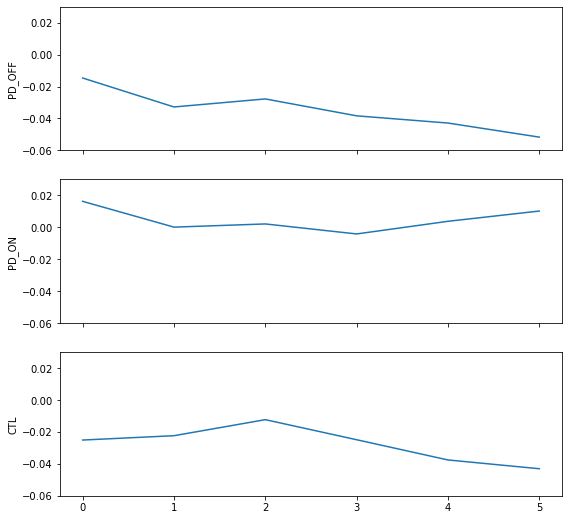

In [26]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-FC3']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.03])


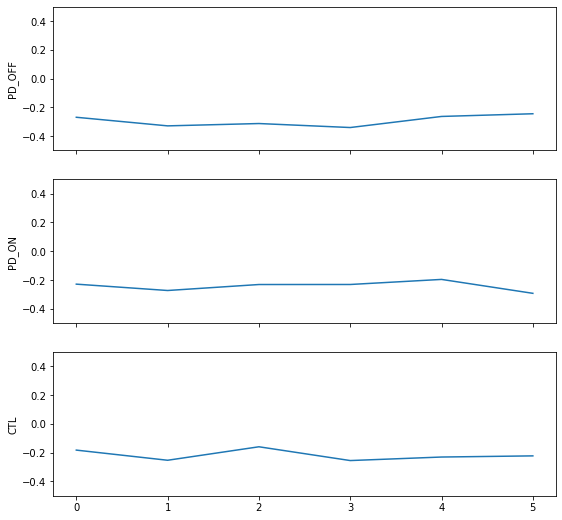

In [27]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-FC3']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.5,0.5])

#### Pz-FC4

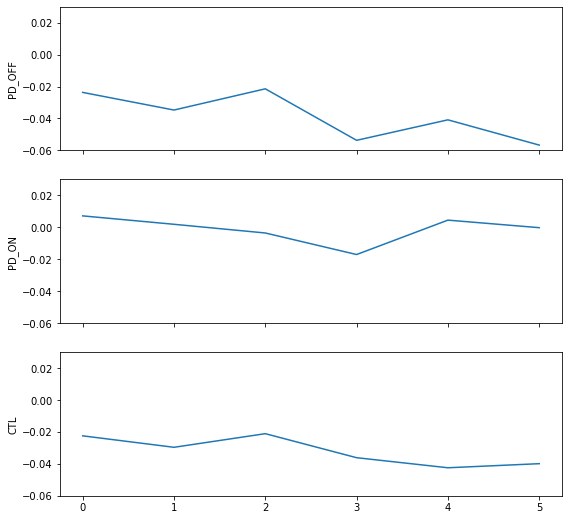

In [28]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-FC4']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.03])


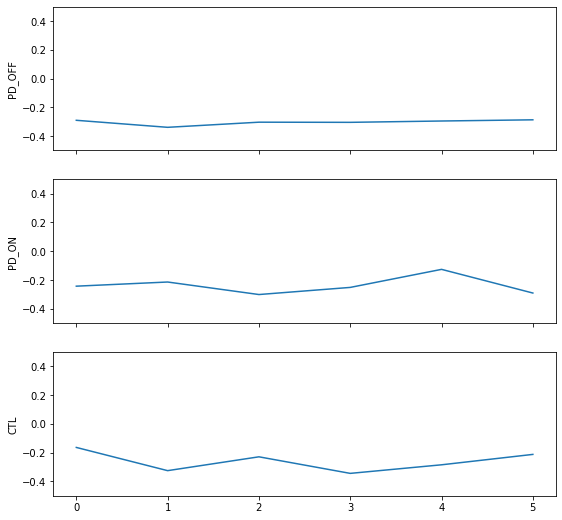

In [29]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-FC4']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.5,0.5])

#### Pz-F3

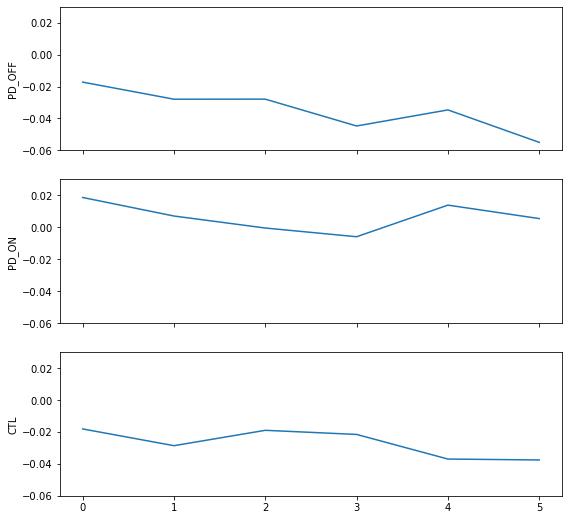

In [30]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-F3']
Pz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Pz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.03])


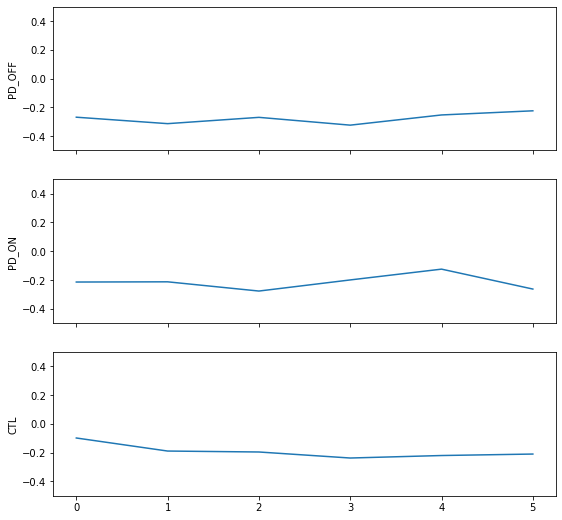

In [32]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-F3']
Pz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Pz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.5,0.5])

#### Pz-F4

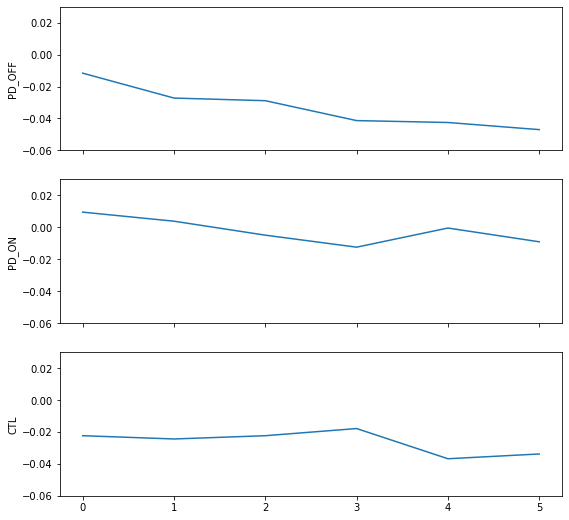

In [35]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-F4']
Pz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Pz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.03])


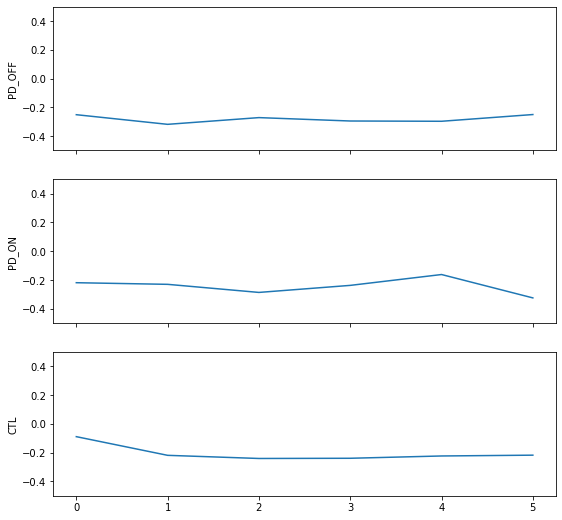

In [36]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-F4']
Pz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Pz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.5,0.5])

### Three state KL on Parameter

#### Load necessary stimulus

In [17]:
Path_save_filter_surprise = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Results\SurpriseCalculations\Removed_unnecessary_ones_by_me_after_check'
Path_saved_KL_on_parameter = os.path.join(Path_save_filter_surprise,'Surprise_three_KL_on_parameters_removed_change_size.npy')
Surprise_three_KL_on_parameter_removed_change_size = np.load(Path_saved_KL_on_parameter)
Surprise_three_KL_on_parameter_removed_change_size.shape

(75, 192)

#### Fz-FC3

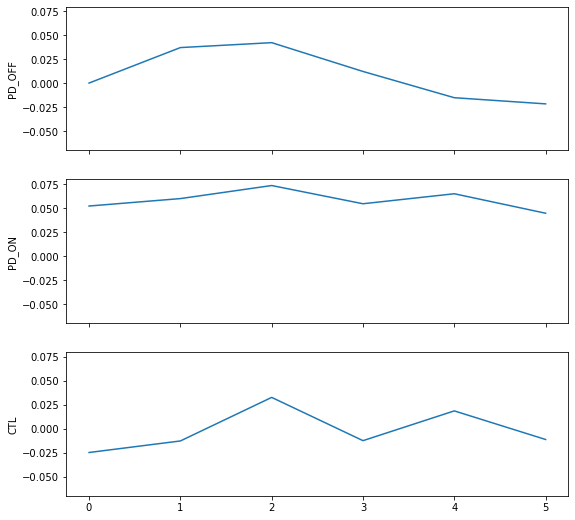

In [74]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_parameter_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.07,0.08])

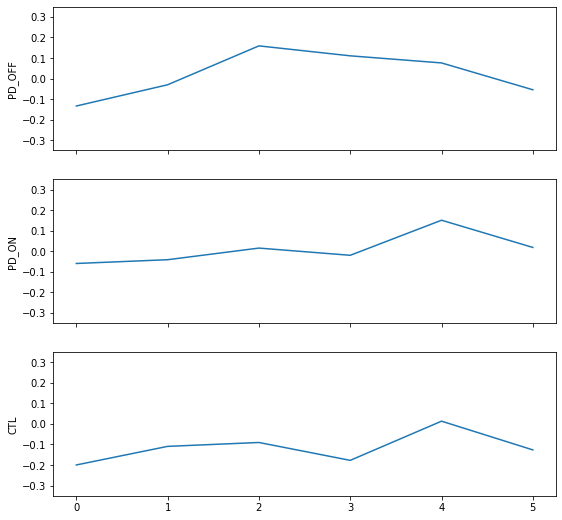

In [70]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_parameter_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.35,0.35])

##### 2D plots

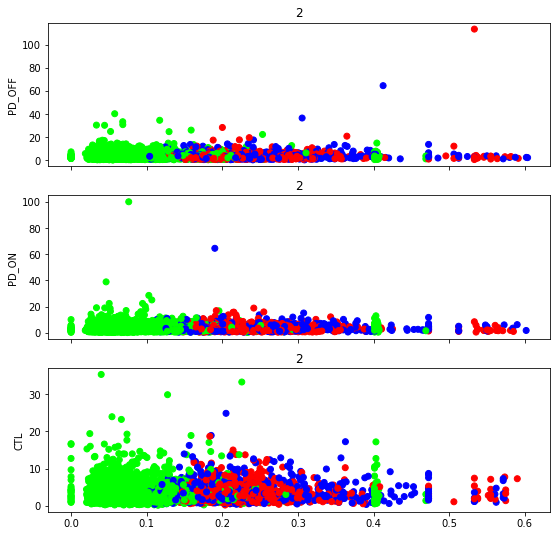

In [93]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
time_window_index = 2
for i in np.arange(3):
    Sur = np.reshape(Surprise_three_KL_on_parameter_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    Stimulus_types = np.reshape(stimulus_necessary[dict[i],:],newshape=(dict[i].shape[0]*192,))
    color = np.zeros(shape=(3,dict[i].shape[0]*192))
    color[0] = (Stimulus_types == 0) 
    color[1] = (Stimulus_types == 1)
    color[2] = (Stimulus_types == 2) 
    Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_phase],axis=2)
    assert Temp.shape[0] == dict[i].shape[0]
    assert Temp.shape[1] == 192
    PAC = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
    ax[i].scatter(Sur,PAC,c=np.transpose(color))
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_title(f'{time_window_index}')

#### Fz-FC4

##### Correlation Between All pairs

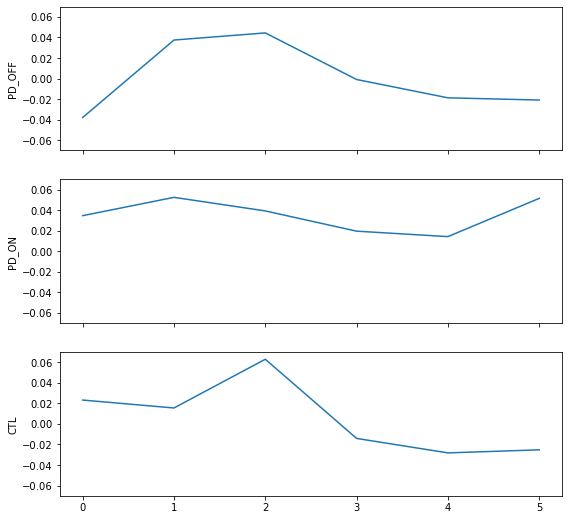

In [75]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_parameter_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.07,0.07])

##### Correlation Between mean PAC and mean Surprise

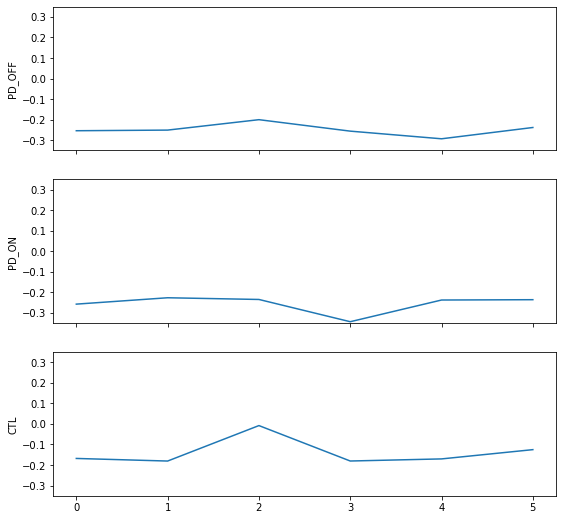

In [77]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_parameter_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.35,0.35])

##### mean Correlation Between PAC and Surprise of one subject

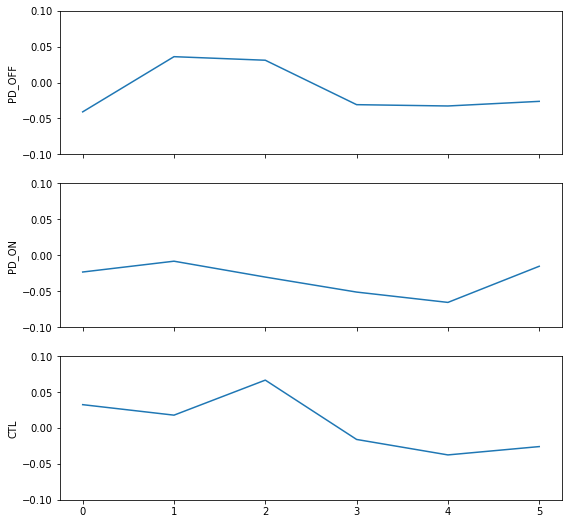

In [104]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
for i in np.arange(3):
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        for sub in np.arange(dict[i].shape[0]):
            Sur = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i][sub],:,:,time_window_index,Fz_phase],axis=1)
            PAC = Surprise_three_KL_on_parameter_removed_change_size[dict[i][sub]]
            c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
            Cor[time_window_index] = (Cor[time_window_index]*sub + np.mean(c)/(np.std(Sur)*np.std(PAC)))/(sub+1)
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.1,0.1])

##### Mean Correlation Between PAC and Permuted Surprise of one subject

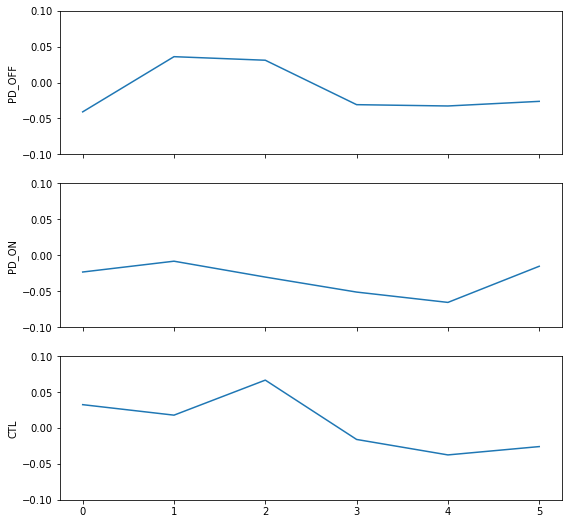

In [109]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
permute = np.arange(192)
for i in np.arange(3):
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        for sub in np.arange(dict[i].shape[0]):
            Sur = np.mean(PAC_mutual_over_trials_Fz_Fc4[dict[i][sub],:,:,time_window_index,Fz_phase],axis=1)
            PAC = Surprise_three_KL_on_parameter_removed_change_size[dict[i][sub]][permute]
            c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
            Cor[time_window_index] = (Cor[time_window_index]*sub + np.mean(c)/(np.std(Sur)*np.std(PAC)))/(sub+1)
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.1,0.1])

#### Fz-F3

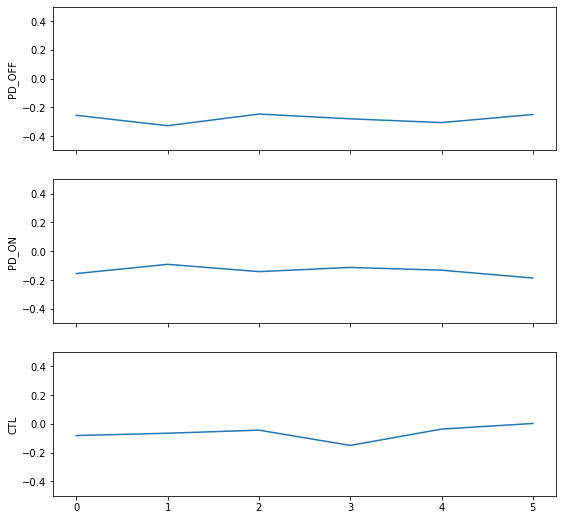

In [80]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F3']
Fz_phase = 1
for i in np.arange(3):
    PAC = np.mean(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.5,0.5])

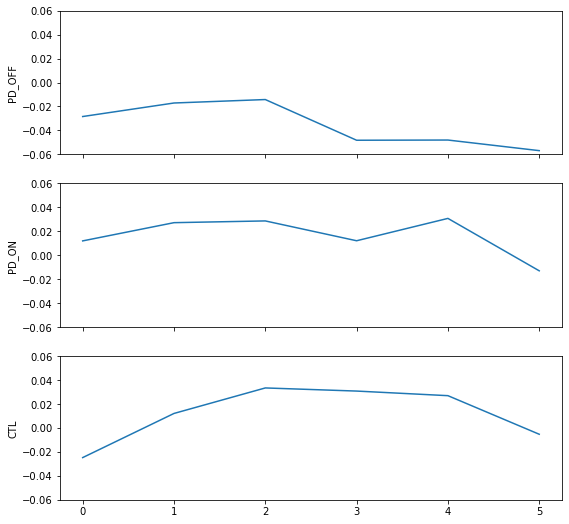

In [82]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F3']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.06])


##### Mean Correlation Between PAC and Permuted Surprise of one subject

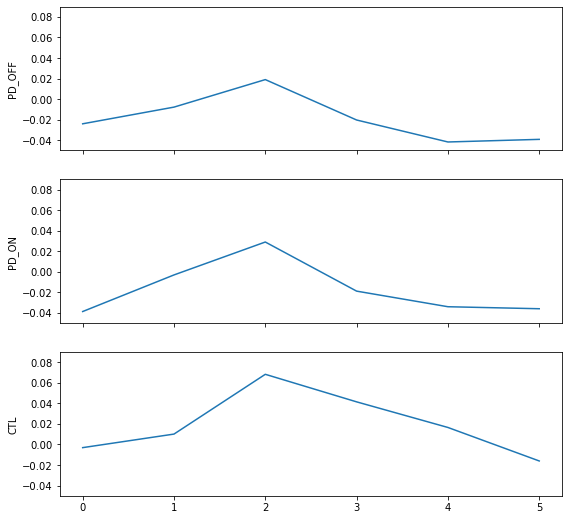

In [88]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F3']
Fz_phase = 0
permute = np.arange(192)
for i in np.arange(3):
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        for sub in np.arange(dict[i].shape[0]):
            Sur = np.mean(PAC_mutual_over_trials_pairs[dict[i][sub],:,:,time_window_index,Fz_phase,pair_index],axis=1)
            PAC = Surprise_three_KL_on_parameter_removed_change_size[dict[i][sub]][permute]
            c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
            Cor[time_window_index] = (Cor[time_window_index]*sub + np.mean(c)/(np.std(Sur)*np.std(PAC)))/(sub+1)
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.05,0.09])

##### 2D plots 

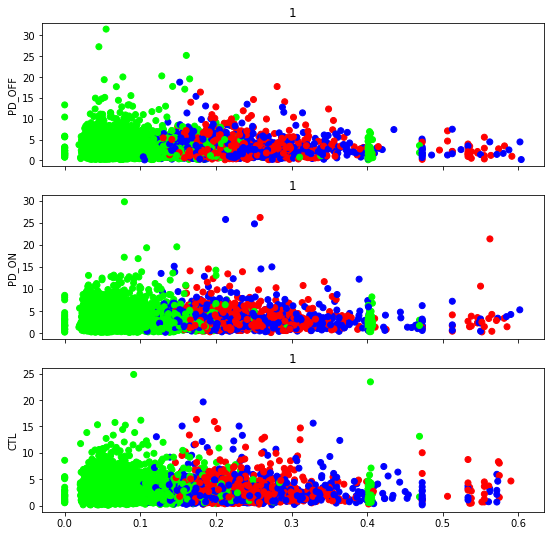

In [94]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F3']
Fz_phase = 0
time_window_index = 1
for i in np.arange(3):
    Sur = np.reshape(Surprise_three_KL_on_parameter_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    Stimulus_types = np.reshape(stimulus_necessary[dict[i],:],newshape=(dict[i].shape[0]*192,))
    color = np.zeros(shape=(3,dict[i].shape[0]*192))
    color[0] = (Stimulus_types == 0) 
    color[1] = (Stimulus_types == 1)
    color[2] = (Stimulus_types == 2) 
    Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
    assert Temp.shape[0] == dict[i].shape[0]
    assert Temp.shape[1] == 192
    PAC = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
    ax[i].scatter(Sur,PAC,c=np.transpose(color))
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_title(f'{time_window_index}')

#### Fz-F4

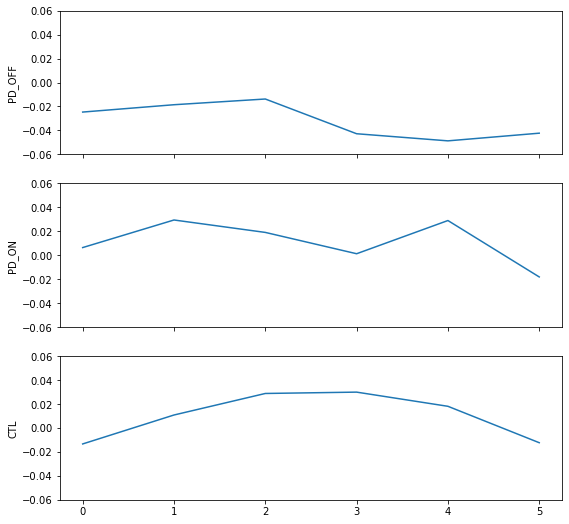

In [83]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F4']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.06])

##### Mean Correlation Between PAC and Permuted Surprise of one subject

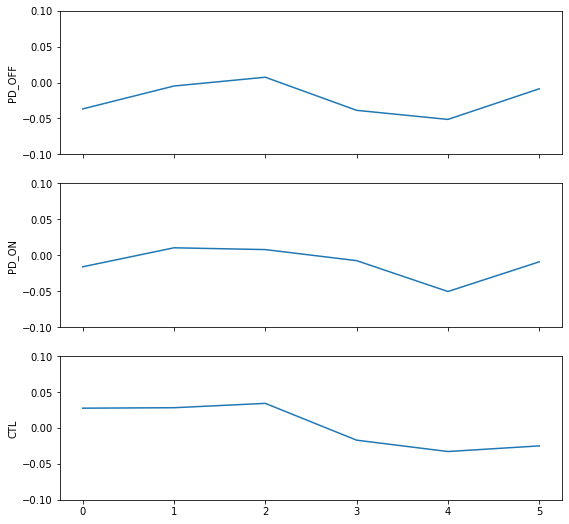

In [82]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Fz-F4']
Fz_phase = 1
permute = np.arange(192)
for i in np.arange(3):
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        for sub in np.arange(dict[i].shape[0]):
            Sur = np.mean(PAC_mutual_over_trials_pairs[dict[i][sub],:,:,time_window_index,Fz_phase,pair_index],axis=1)
            PAC = Surprise_three_shannon_removed_change_size[dict[i][sub]][permute]
            c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
            Cor[time_window_index] = (Cor[time_window_index]*sub + np.mean(c)/(np.std(Sur)*np.std(PAC)))/(sub+1)
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.1,0.1])

#### Pz-FC3

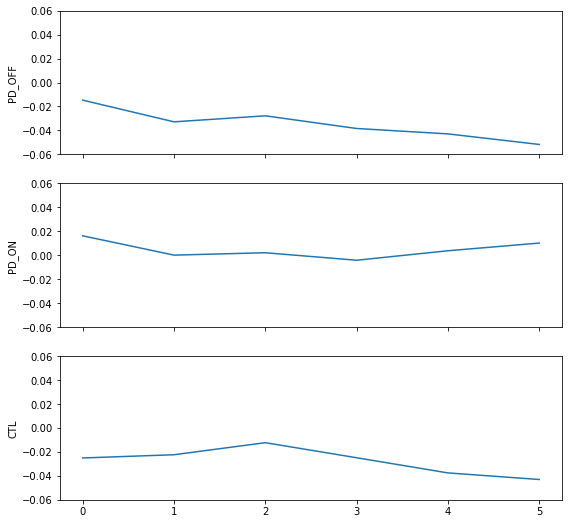

In [84]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
pair_index = Pair_index['Pz-FC3']
Fz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_KL_on_stimulus_removed_change_size[dict[i],:],newshape=(25*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_pairs[dict[i],:,:,time_window_index,Fz_phase,pair_index],axis=2)
        assert Temp.shape[0] == 25
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(25*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.06])

#### Pz-FC4

#### Pz-F3

#### Pz-F4

### Three state Shanon

#### Load necessary stimulus

In [14]:
Path_save_filter_surprise = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Results\SurpriseCalculations\Removed_unnecessary_ones_by_me_after_check'
Path_saved_KL_on_parameter = os.path.join(Path_save_filter_surprise,'Surprise_three_shannon__removed_change_size.npy')
Surprise_three_shannon_removed_change_size = np.load(Path_saved_KL_on_parameter)
Surprise_three_shannon_removed_change_size.shape

(75, 192)

#### Fz-Fc3

##### Correlation Between All pairs

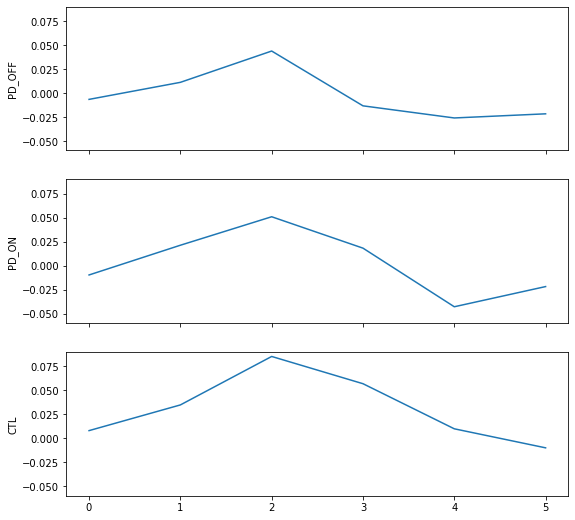

In [23]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 0
for i in np.arange(3):
    PAC = np.reshape(Surprise_three_shannon_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == dict[i].shape[0]
        assert Temp.shape[1] == 192
        Sur = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.06,0.09])

##### Correlation Between mean PAC and mean Surprise

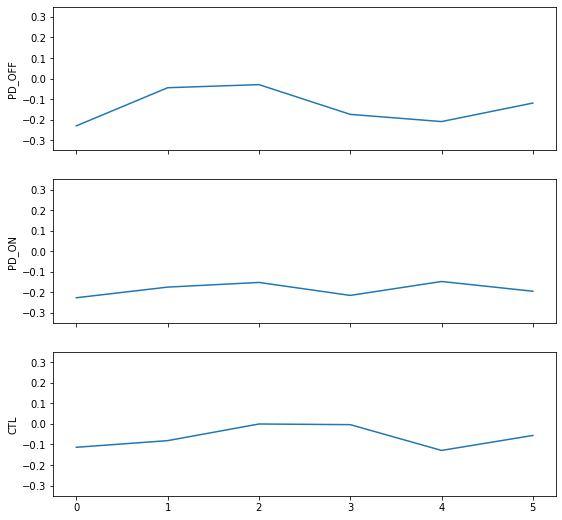

In [26]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 0
for i in np.arange(3):
    PAC = np.mean(Surprise_three_shannon_removed_change_size[dict[i],:],axis=0)
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_phase],axis=2)
        assert Temp.shape[0] == dict[i].shape[0]
        assert Temp.shape[1] == 192
        Sur = np.mean(Temp,axis=0)
        c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
        Cor[time_window_index] = np.mean(c)/(np.std(Sur)*np.std(PAC))
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.35,0.35])

##### Mean Correlation Between PAC and Permuted Surprise of one subject

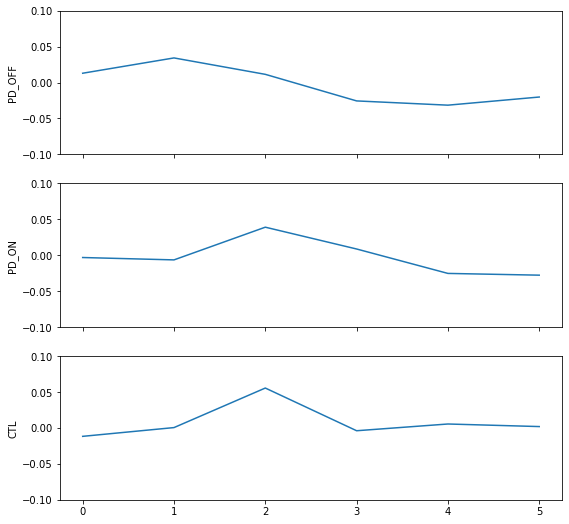

In [27]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 1
permute = np.arange(192)
for i in np.arange(3):
    Cor = np.zeros(shape=(6,))
    for time_window_index in np.arange(6):
        for sub in np.arange(dict[i].shape[0]):
            Sur = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i][sub],:,:,time_window_index,Fz_phase],axis=1)
            PAC = Surprise_three_shannon_removed_change_size[dict[i][sub]][permute]
            c = (Sur-np.mean(Sur))*(PAC-np.mean(PAC))
            Cor[time_window_index] = (Cor[time_window_index]*sub + np.mean(c)/(np.std(Sur)*np.std(PAC)))/(sub+1)
    ax[i].plot(Cor)
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_ylim([-0.1,0.1])

##### 2D plot for all pairs

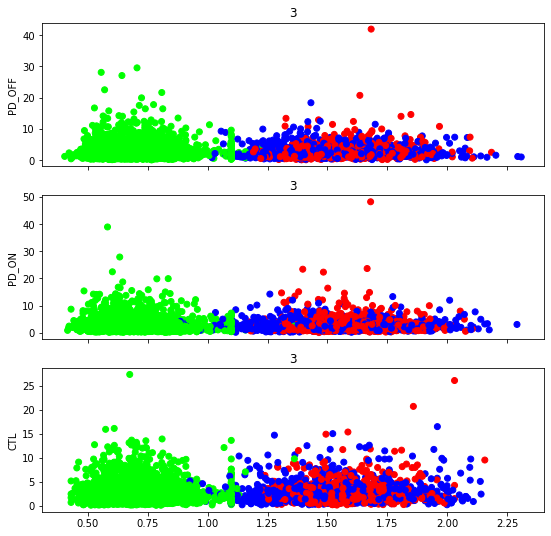

In [80]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(9,9))
Fz_phase = 0
time_window_index = 3
for i in np.arange(3):
    Sur = np.reshape(Surprise_three_shannon_removed_change_size[dict[i],:],newshape=(dict[i].shape[0]*192,))
    Cor = np.zeros(shape=(6,))
    Stimulus_types = np.reshape(stimulus_necessary[dict[i],:],newshape=(dict[i].shape[0]*192,))
    color = np.zeros(shape=(3,dict[i].shape[0]*192))
    color[0] = (Stimulus_types == 0) 
    color[1] = (Stimulus_types == 1)
    color[2] = (Stimulus_types == 2) 
    Temp = np.mean(PAC_mutual_over_trials_Fz_Fc3[dict[i],:,:,time_window_index,Fz_phase],axis=2)
    assert Temp.shape[0] == dict[i].shape[0]
    assert Temp.shape[1] == 192
    PAC = np.reshape(Temp,newshape=(dict[i].shape[0]*192,))
    ax[i].scatter(Sur,PAC,c=np.transpose(color))
    ax[i].set_ylabel(Group_name[i])
    ax[i].set_title(f'{time_window_index}')

### Three state Confidence Corrected

#### Load necessary stimulus

In [15]:
Path_save_filter_surprise = 'D:\Mastersharif\MasterProject\Surprise\Codes\\brainsurprise2\\brainsurprise\Results\SurpriseCalculations\Removed_unnecessary_ones_by_me_after_check'
Path_saved_confidence_corrected = os.path.join(Path_save_filter_surprise,'Surprise_confidence_corrected_v1_removed_change_size.npy')
Surprise_confidence_corrected_removed_change_size = np.load(Path_saved_confidence_corrected)
Surprise_confidence_corrected_removed_change_size.shape

(75, 192)

## Surprise Correlation Optimization on parameters

### General Setting

In [12]:
Load_Path_cor = "D:/Mastersharif/MasterProject/Surprise/Codes/brainsurprise2/brainsurprise/Results/SurpriseCalculations/Completed_created_by_me_after_check/"
Save_Path_cor = "D:/Mastersharif/MasterProject/Surprise/Codes/brainsurprise2/brainsurprise/Results/SurpriseCalculations/SurpriseCorrelationPAC/"

parameter_dims = {"exponential":13,"linear":200,"linear_epsilon":10}
time_window = {"200-400":2,"400-600":3}

### Filter CTL Subject on PAC

In [13]:
PAC_ctl_over_trials_Fz = PAC_over_trials_Fz[dict[2]]
print(PAC_ctl_over_trials_Fz.shape)

PAC_ctl_over_trials_Pz = PAC_over_trials_Pz[dict[2]]
print(PAC_ctl_over_trials_Pz.shape)

PAC_ctl_over_trials_Fz_Fc3= PAC_mutual_over_trials_Fz_Fc3[dict[2]]
print(PAC_ctl_over_trials_Fz_Fc3.shape)

PAC_ctl_over_trials_Fz_Fc4= PAC_mutual_over_trials_Fz_Fc4[dict[2]]
print(PAC_ctl_over_trials_Fz_Fc4.shape)

PAC_ctl_over_trials_pairs= PAC_mutual_over_trials_pairs[dict[2]]
print(PAC_ctl_over_trials_pairs.shape)

(25, 192, 16, 6)
(25, 192, 16, 6)
(25, 192, 16, 6, 2)
(25, 192, 16, 6, 2)
(25, 192, 16, 6, 2, 6)


### Shannon Surprise for several parameter and PAC

#### Shannon surprise exponential Parameter

##### Load

In [17]:
File_Path = "surprise_three_shanon_several_exponential_w1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
surprise_three_shanon_several_exponential_w1 = a['surprise_three_shanon_several_exponential_w']
surprise_three_shanon_several_exponential_w1.shape

surprise_ctl_three_shanon_several_exponential_w1 = surprise_three_shanon_several_exponential_w1[:,dict[2],:]


##### Remove unnecessary Surprises 

In [18]:
Surprise_ctl_three_shannon_removed_change_size = np.zeros(shape=(parameter_dims['exponential'],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = surprise_ctl_three_shanon_several_exponential_w1[:,k,index_remaining]
    Surprise_ctl_three_shannon_removed_change_size[:,k,:] = temp[:,0:192]
    

In [28]:
Surprise_ctl_three_shannon_removed_change_size.shape

(13, 25, 192)

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [47]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [58]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Shannon_Exp.shape)
argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Save max correlation

In [37]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_exponential_parameter_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,c)

(25, 2)


##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [49]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [50]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Pz_Shannon_Exp.shape)
argmax_correlation_index_Pz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Pz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Save max correlation

In [46]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_exponential_parameter_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [15]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [19]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc3_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc3_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
#################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [21]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_exponential_parameter_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [42]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [43]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc4_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc4_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [45]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_exponential_parameter_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [ ]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

In [ ]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
temp2 = np.expand_dims(temp2,axis=3)
print(temp2.shape)
######################################
a = temp * temp2
print(a.shape)
correlation = np.mean(a,axis=2)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_pairs_Shannon_Exp.shape)
argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_pairs_Shannon_Exp.shape)

###### Check

In [ ]:
# print(np.mean(temp,axis=2))
# print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

###### Save max correlation

In [62]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_exponential_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2, 6)


#### Shannon surprise linear Parameter

##### Load

In [71]:
File_Path = "surprise_three_shanon_several_linear_w1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
surprise_three_shanon_several_linear_w1 = a['surprise_three_shanon_several_linear_w']
surprise_three_shanon_several_linear_w1.shape

surprise_ctl_three_shanon_several_linear_w1 = surprise_three_shanon_several_linear_w1[:,dict[2],:]


In [72]:
print(surprise_ctl_three_shanon_several_linear_w1.shape)

(200, 25, 200)


##### Remove unnecessary Surprises 

In [73]:
Surprise_ctl_three_shannon_removed_change_size = np.zeros(shape=(parameter_dims['linear'],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = surprise_ctl_three_shanon_several_linear_w1[:,k,index_remaining]
    Surprise_ctl_three_shannon_removed_change_size[:,k,:] = temp[:,0:192]
    

In [74]:
Surprise_ctl_three_shannon_removed_change_size.shape

(200, 25, 192)

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [26]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [27]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Shannon_Exp.shape)
argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Save max correlation

In [28]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_linear_parameter_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,c)

(25, 2)


##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [29]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [30]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################Surprise_ctl_three_shannon_removed_change_size
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Pz_Shannon_Exp.shape)
argmax_correlation_index_Pz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Pz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [32]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_linear_parameter_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [75]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [76]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc3_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc3_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [77]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

[[ 5.55111512e-17  3.42318766e-16  9.25185854e-18  2.68303898e-16
  -6.47630098e-17  9.25185854e-18 -5.08852220e-17  2.31296463e-16
  -1.11022302e-16 -6.01370805e-17 -1.41090843e-16 -5.55111512e-17
   2.12792746e-16 -1.48029737e-16  4.62592927e-17  7.40148683e-17
   4.16333634e-17  2.45174251e-16  1.20274161e-16  1.75785312e-16
   1.43403807e-16 -6.47630098e-17 -1.48029737e-16 -7.40148683e-17
  -2.12792746e-16]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]
[[-3.63135448e-16  4.04768811e-16  2.08166817e-17 ... -2.98372438e-16
  -3.75856753e-16 -1.17961196e-16]
 [-4.79940162e-16  1.11022302e-16  8.04911693e-16 ...  4.99600361e-16
  -2.96059473e-16 -2.96059473e-16]
 [ 4.57966998e-16  1.66533454e-16  2.68303898e-16 ... -1.66533454e-16
  -5.36607795e-16  1.34151949e-16]
 ...
 [-2.26670534e-16  1.11022302e-16  1.38777878e-17 ...  1.24900090e-16
  -6.01370805e-17  7.40148683e-17]
 [ 2.63677968e-16 -1.66533454e-16  1.34151949e-16 ... -1.57281595e-16
   9.251

###### Save max correlation

In [36]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_linear_parameter_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [37]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [38]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc4_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc4_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [40]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_linear_parameter_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [41]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [42]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_three_shannon_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_three_shannon_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
temp2 = np.expand_dims(temp2,axis=3)
print(temp2.shape)
######################################
a = temp * temp2
print(a.shape)
correlation = np.mean(a,axis=2)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_pairs_Shannon_Exp.shape)
argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192, 6)
(200, 25, 192, 1)
(200, 25, 192, 6)
(200, 25, 6)
(25, 6)
(25, 6)


###### Check

In [ ]:
# print(np.mean(temp,axis=2))
# print(np.std(temp,axis=2))
##################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

###### Save max correlation

In [45]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "Shannon_Surprise_linear_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2, 6)


### KL Surprise on stimulus for several parameter and PAC

#### KL surprise on stimulus exponential Parameter

##### Load

In [56]:
File_Path = "surprise_KL_over_stimulus_several_exponential_w1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
surprise_kl_over_stimulus_several_exponential_w1 = a['surprise_KL_over_stimulus_several_exponential_w']
surprise_kl_over_stimulus_several_exponential_w1.shape

surprise_ctl_three_kl_over_stimulus_several_exponential_w1 = surprise_kl_over_stimulus_several_exponential_w1[:,dict[2],:]


##### Remove unnecessary Surprises 

In [57]:
Surprise_ctl_kl_over_stimulus_removed_change_size = np.zeros(shape=(parameter_dims['exponential'],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = surprise_ctl_three_kl_over_stimulus_several_exponential_w1[:,k,index_remaining]
    Surprise_ctl_kl_over_stimulus_removed_change_size[:,k,:] = temp[:,0:192]    

In [62]:
Surprise_ctl_kl_over_stimulus_removed_change_size.shape

(13, 25, 192)

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [56]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [58]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Shannon_Exp.shape)
argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Save max correlation

In [59]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_exponential_parameter_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,c)

(25, 2)


##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [60]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [71]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Pz_Shannon_Exp.shape)
argmax_correlation_index_Pz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Pz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [62]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_exponential_parameter_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [65]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [68]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc3_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc3_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [67]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
##################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

[[ 5.55111512e-17  3.42318766e-16  9.25185854e-18  2.68303898e-16
  -6.47630098e-17  9.25185854e-18 -5.08852220e-17  2.31296463e-16
  -1.11022302e-16 -6.01370805e-17 -1.41090843e-16 -5.55111512e-17
   2.12792746e-16 -1.48029737e-16  4.62592927e-17  7.40148683e-17
   4.16333634e-17  2.45174251e-16  1.20274161e-16  1.75785312e-16
   1.43403807e-16 -6.47630098e-17 -1.48029737e-16 -7.40148683e-17
  -2.12792746e-16]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]
[[-4.16333634e-17 -1.93132547e-16 -1.38777878e-17  1.57859836e-16
   5.78241159e-17 -1.85037171e-16 -2.08166817e-17 -2.08166817e-17
  -1.75785312e-16 -1.71159383e-16  1.89663100e-16 -1.83880688e-16
  -2.54426110e-17  2.12792746e-16  1.60751042e-16  6.70759744e-17
   2.05853852e-16  2.03540888e-16 -1.91976065e-16 -1.52655666e-16
  -6.47630098e-17 -3.93203988e-17  1.52655666e-16  1.82724206e-16
  -4.39463281e-17]
 [-1.20274161e-16  6.24500451e-17 -5.78241159e-17 -4.62592927e-18
   4.62592927e-18 -9.4

###### Save max correlation

In [69]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_exponential_parameter_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [68]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [73]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_stimulus_removed_change_size- temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc4_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc4_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [75]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_exponential_parameter_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [76]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [77]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
temp2 = np.expand_dims(temp2,axis=3)
print(temp2.shape)
######################################
a = temp * temp2
print(a.shape)
correlation = np.mean(a,axis=2)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_pairs_Shannon_Exp.shape)
argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192, 6)
(13, 25, 192, 1)
(13, 25, 192, 6)
(13, 25, 6)
(25, 6)
(25, 6)


###### Check

In [82]:
# print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
##################################################
# print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

[[[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]]]
[[[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [

###### Save max correlation

In [83]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_exponential_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2, 6)


#### KL surprise on stimulus linear Parameter

##### Load

In [27]:
File_Path = "surprise_KL_over_stimulus_several_linear_w1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
surprise_KL_on_stimulus_several_linear_w1 = a['surprise_KL_over_stimulus_several_linear_w']
surprise_KL_on_stimulus_several_linear_w1.shape

surprise_ctl_KL_on_stimulus_several_linear_w1 = surprise_KL_on_stimulus_several_linear_w1[:,dict[2],:]


In [28]:
print(surprise_ctl_KL_on_stimulus_several_linear_w1.shape)

(200, 25, 200)


##### Remove unnecessary Surprises 

In [29]:
Surprise_ctl_KL_on_stimulus_removed_change_size = np.zeros(shape=(parameter_dims['linear'],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = surprise_ctl_three_shanon_several_linear_w1[:,k,index_remaining]
    Surprise_ctl_KL_on_stimulus_removed_change_size[:,k,:] = temp[:,0:192]
    

In [31]:
Surprise_ctl_KL_on_stimulus_removed_change_size.shape

(200, 25, 192)

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [34]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [35]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Shannon_Exp.shape)
argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [38]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_linear_parameter_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,c)

(25, 2)


##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [39]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [41]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################Surprise_ctl_KL_on_stimulus_removed_change_size
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Pz_Shannon_Exp.shape)
argmax_correlation_index_Pz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Pz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [43]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_linear_parameter_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [44]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [45]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc3_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc3_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [47]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_linear_parameter_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [48]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [49]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc4_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc4_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [51]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_linear_parameter_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [52]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [53]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_stimulus_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_stimulus_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
temp2 = np.expand_dims(temp2,axis=3)
print(temp2.shape)
######################################
a = temp * temp2
print(a.shape)
correlation = np.mean(a,axis=2)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_pairs_Shannon_Exp.shape)
argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192, 6)
(200, 25, 192, 1)
(200, 25, 192, 6)
(200, 25, 6)
(25, 6)
(25, 6)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
#################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [55]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_stimulus_linear_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2, 6)


### KL Surprise on parameter for several parameter and PAC

#### KL surprise on parameter exponential Parameter

##### Load

In [24]:
File_Path = "surprise_KL_over_parameter_several_exponential_w1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
surprise_kl_over_parameter_several_exponential_w1 = a['surprise_KL_over_parameter_several_exponential_w']
surprise_kl_over_parameter_several_exponential_w1.shape

surprise_ctl_three_kl_over_parameter_several_exponential_w1 = surprise_kl_over_parameter_several_exponential_w1[:,dict[2],:]


##### Remove unnecessary Surprises 

In [25]:
Surprise_ctl_kl_over_parameter_removed_change_size = np.zeros(shape=(parameter_dims['exponential'],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = surprise_ctl_three_kl_over_parameter_several_exponential_w1[:,k,index_remaining]
    Surprise_ctl_kl_over_parameter_removed_change_size[:,k,:] = temp[:,0:192]    

In [26]:
Surprise_ctl_kl_over_parameter_removed_change_size.shape

(13, 25, 192)

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [27]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [29]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Shannon_Exp.shape)
argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [31]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_exponential_parameter_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,c)

(25, 2)


##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [32]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [33]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Pz_Shannon_Exp.shape)
argmax_correlation_index_Pz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Pz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [35]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_exponential_parameter_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [36]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [37]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc3_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc3_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
##################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [39]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_exponential_parameter_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [54]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [55]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_parameter_removed_change_size- temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc4_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc4_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [57]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_exponential_parameter_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [48]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [49]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_kl_over_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
temp2 = np.expand_dims(temp2,axis=3)
print(temp2.shape)
######################################
a = temp * temp2
print(a.shape)
correlation = np.mean(a,axis=2)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_pairs_Shannon_Exp.shape)
argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(13, 25, 1)
(13, 25, 1)
(13, 25, 192)
(1, 25, 192, 6)
(13, 25, 192, 1)
(13, 25, 192, 6)
(13, 25, 6)
(25, 6)
(25, 6)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
# print(np.std(temp,axis=2))
##################################################
print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

###### Save max correlation

In [52]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_exponential_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2, 6)


#### KL surprise on parameter linear Parameter

##### Load

In [108]:
File_Path = "surprise_KL_over_parameter_several_linear_w1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
surprise_KL_on_parameter_several_linear_w1 = a['surprise_KL_over_parameter_several_linear_w']
surprise_KL_on_parameter_several_linear_w1.shape

surprise_ctl_KL_on_parameter_several_linear_w1 = surprise_KL_on_parameter_several_linear_w1[:,dict[2],:]


In [109]:
print(surprise_ctl_KL_on_parameter_several_linear_w1.shape)

(200, 25, 200)


##### Remove unnecessary Surprises 

In [110]:
Surprise_ctl_KL_on_parameter_removed_change_size = np.zeros(shape=(parameter_dims['linear'],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = surprise_ctl_KL_on_parameter_several_linear_w1[:,k,index_remaining]
    Surprise_ctl_KL_on_parameter_removed_change_size[:,k,:] = temp[:,0:192]
    

In [111]:
Surprise_ctl_KL_on_parameter_removed_change_size.shape

(200, 25, 192)

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [112]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [113]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
#####################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Shannon_Exp.shape)
argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [114]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

[[-1.85037171e-17  1.94289029e-16 -9.25185854e-18  1.75785312e-16
  -4.16333634e-17  4.62592927e-17  1.38777878e-16  1.29526020e-16
   7.40148683e-17 -1.38777878e-17  4.62592927e-17 -1.89663100e-16
  -2.77555756e-17 -3.70074342e-17 -7.40148683e-17  2.40548322e-16
  -2.28983499e-16  7.40148683e-17 -9.25185854e-18  9.25185854e-18
  -1.75785312e-16 -1.48029737e-16 -1.20274161e-16 -5.55111512e-17
   8.32667268e-17]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]
[[ 1.09865820e-16  1.61907524e-17  2.20888123e-16 ... -2.77555756e-16
  -1.48029737e-16 -5.31981866e-17]
 [ 7.86407976e-17  3.14563190e-16 -1.49186219e-16 ... -1.75785312e-16
   8.32667268e-17 -1.01770444e-16]
 [ 2.26670534e-16 -1.43403807e-16  1.43403807e-16 ...  2.96059473e-16
  -1.29526020e-16 -1.34151949e-16]
 ...
 [ 0.00000000e+00 -9.25185854e-17  9.25185854e-17 ... -5.55111512e-17
  -9.25185854e-17  7.40148683e-17]
 [-3.70074342e-17  3.70074342e-17  7.40148683e-17 ... -7.40148683e-17
   0.000

###### Save max correlation

In [115]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_linear_parameter_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,c)

(25, 2)


##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [116]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [117]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################Surprise_ctl_KL_on_parameter_removed_change_size
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Pz_Shannon_Exp.shape)
argmax_correlation_index_Pz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Pz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [119]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_linear_parameter_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [120]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [121]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc3_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc3_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [123]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_linear_parameter_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [124]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [125]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * temp2
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc4_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc4_Shannon_Exp.shape)

(25, 1)
(25, 192)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192)
(25,)
(25,)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [127]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_linear_parameter_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [128]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [129]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
temp2 = np.expand_dims(temp2,axis=3)
print(temp2.shape)
######################################
a = temp * temp2
print(a.shape)
correlation = np.mean(a,axis=2)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_pairs_Shannon_Exp.shape)
argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(200, 25, 1)
(200, 25, 1)
(200, 25, 192)
(1, 25, 192, 6)
(200, 25, 192, 1)
(200, 25, 192, 6)
(200, 25, 6)
(25, 6)
(25, 6)


###### Check

In [ ]:
# print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
#################################################
# print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

###### Save max correlation

In [132]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "KL_Surprise_on_parameter_linear_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2, 6)


### BF Surprise for several parameter and PAC

#### BF surprise exponential Parameter

##### Load

In [14]:
File_Path = "BF_Sur_several_exponential_m_linear_epsilon_v1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
BF_surprise_several_exponential_w1 = a['BF_Sur_several_exponential_m_linear_epsilon']
BF_surprise_several_exponential_w1.shape

BF_surprise_ctl_several_exponential_w1 = BF_surprise_several_exponential_w1[:,:,dict[2],:]
BF_surprise_ctl_several_exponential_w1.shape

(13, 10, 25, 200)

##### Remove unnecessary Surprises 

In [15]:
BF_Surprise_ctl_removed_change_size = np.zeros(shape=(parameter_dims['exponential'],parameter_dims["linear_epsilon"],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = BF_surprise_ctl_several_exponential_w1[:,:,k,index_remaining]
    BF_Surprise_ctl_removed_change_size[:,:,k,:] = temp[:,:,0:192]    

In [16]:
BF_Surprise_ctl_removed_change_size.shape

(13, 10, 25, 192)

##### Normalization Surprize

In [17]:
temp1 = np.expand_dims(np.mean(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
print(temp1.shape)
temp2 = (BF_Surprise_ctl_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
normalized_surprise = temp2 

(13, 10, 25, 1)
(13, 10, 25, 1)
(13, 10, 25, 192)


In [ ]:
# print(np.mean(normalized_surprise,axis=3))
print(np.std(normalized_surprise,axis=3))

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [43]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [82]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = (BF_Surprise_ctl_removed_change_size - temp1)
# print(temp2.shape)
# temp1 = np.expand_dims(np.std(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
#####################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=3)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_Fz_Shannon_Exp.shape)
a = [[np.where(correlation[:,:,i] == max_correlation_Fz_Shannon_Exp[i])[0][0],np.where(correlation[:,:,i] == max_correlation_Fz_Shannon_Exp[i])[1][0]] for i in np.arange(25)]
a = np.array(a)
a.shape
# argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=(0,1))
# print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(13, 10, 25, 1)
(13, 10, 25, 192)
(13, 10, 25, 1)
(13, 10, 25, 192)
(1, 1, 25, 192)
(25,)


(25, 2)

In [ ]:
print(np.mean(temp,axis=3))
# print(np.std(temp,axis=3))
###################################################
print(np.mean(temp2,axis=3))
# print(np.std(temp2,axis=3))

###### Save max correlation

In [101]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_exponential_m_linear_epsilon_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [102]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [120]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = (BF_Surprise_ctl_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=3)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_Pz_Shannon_Exp.shape)
t = [[np.where(correlation[:,:,i] == max_correlation_Pz_Shannon_Exp[i])[0][0],np.where(correlation[:,:,i] == max_correlation_Pz_Shannon_Exp[i])[1][0]] for i in np.arange(25)]
t = np.array(t)
t.shape

(25, 1)
(25, 192)
(13, 10, 25, 1)
(13, 10, 25, 1)
(13, 10, 25, 192)
(1, 1, 25, 192)
(25,)


(25, 2)

In [125]:
a.shape

(25, 1)

In [ ]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
###################################################
# print(np.mean(temp2,axis=3))
# # print(np.std(temp2,axis=3))

###### Save max correlation

In [126]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_exponential_m_linear_epsilon_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [127]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [131]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = (BF_Surprise_ctl_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=3)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
t = [[np.where(correlation[:,:,i] == max_correlation_Fz_Fc3_Shannon_Exp[i])[0][0],np.where(correlation[:,:,i] == max_correlation_Fz_Fc3_Shannon_Exp[i])[1][0]] for i in np.arange(25)]
t = np.array(t)
t.shape

(25, 1)
(25, 192)
(13, 10, 25, 1)
(13, 10, 25, 1)
(13, 10, 25, 192)
(1, 1, 25, 192)
(25,)


(25, 2)

In [ ]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
##################################################
# print(np.mean(temp2,axis=3))
# print(np.std(temp2,axis=3))

###### Save max correlation

In [139]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_exponential_parameter_linear_m_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [151]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [152]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
####################################

######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=3)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
t = [[np.where(correlation[:,:,i] == max_correlation_Fz_Fc4_Shannon_Exp[i])[0][0],np.where(correlation[:,:,i] == max_correlation_Fz_Fc4_Shannon_Exp[i])[1][0]] for i in np.arange(25)]
t = np.array(t)
t.shape


(25, 1)
(25, 192)
(1, 1, 25, 192)
(25,)


(25, 2)

###### Check

In [153]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
###################################################
# print(np.mean(temp2,axis=3))
# print(np.std(temp2,axis=3))

[[[ 8.32667268e-17 -1.85037171e-16  1.57281595e-16 -1.52655666e-16
    3.23815049e-17  1.11022302e-16  3.23815049e-17 -2.40548322e-16
   -1.11022302e-16 -1.75785312e-16 -1.80411242e-16 -9.94574793e-17
   -2.26670534e-16 -7.40148683e-17 -1.20274161e-16  2.03540888e-16
    3.23815049e-17 -1.85037171e-17  2.77555756e-17  1.29526020e-16
   -9.48315500e-17 -2.77555756e-16  9.25185854e-17 -1.48029737e-16
   -2.12792746e-16]]]
[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1.]]]


###### Save max correlation

In [145]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_exponential_parameter_linear_epsilon_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [18]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [19]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_kl_over_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
normalized_surprise = np.expand_dims(normalized_surprise,axis=4)
print(normalized_surprise.shape)
######################################
a = temp * normalized_surprise
print(a.shape)
correlation = np.mean(a,axis=3)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_pairs_Shannon_Exp.shape)
# argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
# print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(1, 1, 25, 192, 6)
(13, 10, 25, 192, 1)
(13, 10, 25, 192, 6)
(13, 10, 25, 6)
(25, 6)


In [20]:
temp.shape

(1, 1, 25, 192, 6)

###### Check

In [ ]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
##################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

###### Save max correlation

In [22]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_exponential_parameter_linear_epsilon_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

#### BF surprise linear Parameter

##### Load

In [20]:
File_Path = "BF_Sur_several_linear_m_linear_epsilon_v1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
BF_surprise_several_linear_w1 = a['BF_sur_several_linear_m_linear_epsilon']
BF_surprise_several_linear_w1.shape

BF_surprise_ctl_several_linear_w1 = BF_surprise_several_linear_w1[:,:,dict[2],:]
BF_surprise_ctl_several_linear_w1.shape

(200, 10, 25, 200)

##### Remove unnecessary Surprises 

In [21]:
BF_Surprise_ctl_removed_change_size = np.zeros(shape=(parameter_dims['linear'],parameter_dims["linear_epsilon"],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = BF_surprise_ctl_several_linear_w1[:,:,k,index_remaining]
    BF_Surprise_ctl_removed_change_size[:,:,k,:] = temp[:,:,0:192]    

In [22]:
BF_Surprise_ctl_removed_change_size.shape

(200, 10, 25, 192)

##### Normalization Surprize

In [23]:
temp1 = np.expand_dims(np.mean(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
print(temp1.shape)
temp2 = (BF_Surprise_ctl_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
normalized_surprise = temp2 

(200, 10, 25, 1)
(200, 10, 25, 1)
(200, 10, 25, 192)


In [ ]:
# print(np.mean(normalized_surprise,axis=3))
# print(np.std(normalized_surprise,axis=3))

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [26]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [27]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = (BF_Surprise_ctl_removed_change_size - temp1)
# print(temp2.shape)
# temp1 = np.expand_dims(np.std(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
#####################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=3)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_Fz_Shannon_Exp.shape)
a = [[np.where(correlation[:,:,i] == max_correlation_Fz_Shannon_Exp[i])[0][0],np.where(correlation[:,:,i] == max_correlation_Fz_Shannon_Exp[i])[1][0]] for i in np.arange(25)]
a = np.array(a)
a.shape
# argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=(0,1))
# print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 1, 25, 192)
(25,)


(25, 2)

In [29]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
###################################################
# print(np.mean(temp2,axis=3))
# print(np.std(temp2,axis=3))

[[[-1.85037171e-17  1.94289029e-16 -9.25185854e-18  1.75785312e-16
   -4.16333634e-17  4.62592927e-17  1.38777878e-16  1.29526020e-16
    7.40148683e-17 -1.38777878e-17  4.62592927e-17 -1.89663100e-16
   -2.77555756e-17 -3.70074342e-17 -7.40148683e-17  2.40548322e-16
   -2.28983499e-16  7.40148683e-17 -9.25185854e-18  9.25185854e-18
   -1.75785312e-16 -1.48029737e-16 -1.20274161e-16 -5.55111512e-17
    8.32667268e-17]]]
[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1.]]]


###### Save max correlation

In [30]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_linear_m_linear_epsilon_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [39]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [32]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = (BF_Surprise_ctl_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=3)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_Pz_Shannon_Exp.shape)
t = [[np.where(correlation[:,:,i] == max_correlation_Pz_Shannon_Exp[i])[0][0],np.where(correlation[:,:,i] == max_correlation_Pz_Shannon_Exp[i])[1][0]] for i in np.arange(25)]
t = np.array(t)
t.shape

(25, 1)
(25, 192)
(1, 1, 25, 192)
(25,)


(25, 2)

In [ ]:
a.shape

(25, 1)

In [33]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
###################################################
# print(np.mean(temp2,axis=3))
# # print(np.std(temp2,axis=3))

[[[ 1.29526020e-16 -6.01370805e-17  1.85037171e-17  2.77555756e-17
   -4.16333634e-17 -1.20274161e-16 -1.29526020e-16 -2.28983499e-16
   -2.93746509e-16  4.62592927e-17  6.47630098e-17 -8.32667268e-17
   -1.36464913e-16 -1.29526020e-16  3.70074342e-17 -3.70074342e-17
    1.75785312e-16  3.88578059e-16  7.86407976e-17  1.85037171e-17
    1.75785312e-16  1.66533454e-16 -1.29526020e-16  0.00000000e+00
    1.29526020e-16]]]
[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1.]]]


###### Save max correlation

In [34]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_linear_m_linear_epsilon_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [35]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [40]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = (BF_Surprise_ctl_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(BF_Surprise_ctl_removed_change_size,axis=3),axis=3)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
print(a.shape)
correlation = np.mean(a,axis=3)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
t = [[np.where(correlation[:,:,i] == max_correlation_Fz_Fc3_Shannon_Exp[i])[0][0],np.where(correlation[:,:,i] == max_correlation_Fz_Fc3_Shannon_Exp[i])[1][0]] for i in np.arange(25)]
t = np.array(t)
t.shape

(25, 1)
(25, 192)
(1, 1, 25, 192)
(200, 10, 25, 192)
(25,)


(25, 2)

In [37]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
##################################################
# print(np.mean(temp2,axis=3))
# print(np.std(temp2,axis=3))

[[[ 5.55111512e-17  3.42318766e-16  9.25185854e-18  2.68303898e-16
   -6.47630098e-17  9.25185854e-18 -5.08852220e-17  2.31296463e-16
   -1.11022302e-16 -6.01370805e-17 -1.41090843e-16 -5.55111512e-17
    2.12792746e-16 -1.48029737e-16  4.62592927e-17  7.40148683e-17
    4.16333634e-17  2.45174251e-16  1.20274161e-16  1.75785312e-16
    1.43403807e-16 -6.47630098e-17 -1.48029737e-16 -7.40148683e-17
   -2.12792746e-16]]]
[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1.]]]


###### Save max correlation

In [41]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_linear_parameter_linear_m_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [42]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [43]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
####################################

######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=3)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
t = [[np.where(correlation[:,:,i] == max_correlation_Fz_Fc4_Shannon_Exp[i])[0][0],np.where(correlation[:,:,i] == max_correlation_Fz_Fc4_Shannon_Exp[i])[1][0]] for i in np.arange(25)]
t = np.array(t)
t.shape


(25, 1)
(25, 192)
(1, 1, 25, 192)
(25,)


(25, 2)

###### Check

In [44]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
###################################################
# print(np.mean(temp2,axis=3))
# print(np.std(temp2,axis=3))

[[[ 8.32667268e-17 -1.85037171e-16  1.57281595e-16 -1.52655666e-16
    3.23815049e-17  1.11022302e-16  3.23815049e-17 -2.40548322e-16
   -1.11022302e-16 -1.75785312e-16 -1.80411242e-16 -9.94574793e-17
   -2.26670534e-16 -7.40148683e-17 -1.20274161e-16  2.03540888e-16
    3.23815049e-17 -1.85037171e-17  2.77555756e-17  1.29526020e-16
   -9.48315500e-17 -2.77555756e-16  9.25185854e-17 -1.48029737e-16
   -2.12792746e-16]]]
[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1.]]]


###### Save max correlation

In [45]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_linear_parameter_linear_epsilon_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [46]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [47]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_kl_over_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_kl_over_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
normalized_surprise = np.expand_dims(normalized_surprise,axis=4)
print(normalized_surprise.shape)
######################################
a = temp * normalized_surprise
print(a.shape)
correlation = np.mean(a,axis=3)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=(0,1))
print(max_correlation_pairs_Shannon_Exp.shape)
# argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
# print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(1, 1, 25, 192, 6)
(200, 10, 25, 192, 1)
(200, 10, 25, 192, 6)
(200, 10, 25, 6)
(25, 6)


In [ ]:
temp.shape

(1, 1, 25, 192, 6)

###### Check

In [48]:
print(np.mean(temp,axis=3))
print(np.std(temp,axis=3))
##################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[[[ 2.76110153e-17 -6.76542156e-17 -1.73472348e-17 -6.53990750e-16
     8.96273796e-17  2.60208521e-17]
   [-6.93889390e-17 -2.31151903e-16  5.68989300e-16  2.95481232e-16
     6.15248593e-16 -8.07224657e-16]
   [ 2.12503626e-17 -5.59159200e-16 -2.98950679e-16  3.96095194e-17
    -5.30174862e-17  9.18536081e-16]
   [-4.05347052e-16  4.33391748e-16 -4.36861195e-16  8.71409426e-16
     3.33066907e-16  1.82724206e-16]
   [ 2.87385856e-16 -4.97865638e-16  6.07153217e-18  3.75416296e-17
     2.38524478e-16  8.96129236e-16]
   [-1.74917950e-16  3.29308340e-16 -1.46295013e-16  4.18068358e-16
    -1.00035720e-16 -5.56557115e-17]
   [ 2.61654124e-16 -3.39283000e-16  1.43837488e-16 -5.38920760e-16
     5.44703171e-16 -1.76074433e-16]
   [ 3.49257660e-16  3.97829917e-16  1.38055077e-17  6.24211331e-16
    -6.27391657e-17 -6.67868538e-17]
   [-3.77736037e-16  2.30139981e-16  4.50377582e-16  2.14816590e-16
     4.27898457e-17 -2.19153399e-16]
   [ 1.12525729e-15  8.09537622e-17 -3.79326200e-16  2.

###### Save max correlation

In [50]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
# b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
# c = np.concatenate((a,b),axis=1)
# print(c.shape)
Name = "BF_Surprise_linear_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

### Confidence Corrected Surprise for several parameter and PAC

#### Confidence Corrected exponential Parameter

##### Load

In [14]:
File_Path = "surprise_confidence_corrected_several_exponential_m1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
confidence_surprise_several_exponential_w1 = a['surprise_confidence_corrected_several_exponential_m']
confidence_surprise_several_exponential_w1.shape

confidence_surprise_several_exponential_w1 = confidence_surprise_several_exponential_w1[:,dict[2],:]


In [15]:
print(confidence_surprise_several_exponential_w1.shape)

(13, 25, 200)


##### Remove unnecessary Surprises 

In [16]:
Surprise_ctl_Confidence_on_parameter_removed_change_size = np.zeros(shape=(parameter_dims['exponential'],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = confidence_surprise_several_exponential_w1[:,k,index_remaining]
    Surprise_ctl_Confidence_on_parameter_removed_change_size[:,k,:] = temp[:,0:192]
    

In [17]:
Surprise_ctl_Confidence_on_parameter_removed_change_size.shape

(13, 25, 192)

##### Normalized Surprise

In [25]:
temp1 = np.expand_dims(np.mean(Surprise_ctl_Confidence_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_Confidence_on_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_Confidence_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
normalized_surprise = temp2

(13, 25, 1)
(13, 25, 1)
(13, 25, 192)


In [ ]:
print(temp2.shape)
print(np.std(temp2,axis=2))

##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [23]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [26]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
#####################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Shannon_Exp.shape)
argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 25, 192)
(25,)
(25,)


In [27]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[-1.85037171e-17  1.94289029e-16 -9.25185854e-18  1.75785312e-16
  -4.16333634e-17  4.62592927e-17  1.38777878e-16  1.29526020e-16
   7.40148683e-17 -1.38777878e-17  4.62592927e-17 -1.89663100e-16
  -2.77555756e-17 -3.70074342e-17 -7.40148683e-17  2.40548322e-16
  -2.28983499e-16  7.40148683e-17 -9.25185854e-18  9.25185854e-18
  -1.75785312e-16 -1.48029737e-16 -1.20274161e-16 -5.55111512e-17
   8.32667268e-17]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


###### Save max correlation

In [28]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_exponential_parameter_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [42]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [43]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################Surprise_ctl_KL_on_parameter_removed_change_size
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Pz_Shannon_Exp.shape)
argmax_correlation_index_Pz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Pz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 25, 192)
(25,)
(25,)


In [44]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[ 1.29526020e-16 -6.01370805e-17  1.85037171e-17  2.77555756e-17
  -4.16333634e-17 -1.20274161e-16 -1.29526020e-16 -2.28983499e-16
  -2.93746509e-16  4.62592927e-17  6.47630098e-17 -8.32667268e-17
  -1.36464913e-16 -1.29526020e-16  3.70074342e-17 -3.70074342e-17
   1.75785312e-16  3.88578059e-16  7.86407976e-17  1.85037171e-17
   1.75785312e-16  1.66533454e-16 -1.29526020e-16  0.00000000e+00
   1.29526020e-16]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


###### Save max correlation

In [45]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_on_exponential_parameter_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [46]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [47]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc3_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc3_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 25, 192)
(25,)
(25,)


In [48]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[ 5.55111512e-17  3.42318766e-16  9.25185854e-18  2.68303898e-16
  -6.47630098e-17  9.25185854e-18 -5.08852220e-17  2.31296463e-16
  -1.11022302e-16 -6.01370805e-17 -1.41090843e-16 -5.55111512e-17
   2.12792746e-16 -1.48029737e-16  4.62592927e-17  7.40148683e-17
   4.16333634e-17  2.45174251e-16  1.20274161e-16  1.75785312e-16
   1.43403807e-16 -6.47630098e-17 -1.48029737e-16 -7.40148683e-17
  -2.12792746e-16]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


###### Save max correlation

In [49]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_exponential_parameter_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [50]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [51]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc4_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc4_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 25, 192)
(25,)
(25,)


###### Check

In [52]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[ 8.32667268e-17 -1.85037171e-16  1.57281595e-16 -1.52655666e-16
   3.23815049e-17  1.11022302e-16  3.23815049e-17 -2.40548322e-16
  -1.11022302e-16 -1.75785312e-16 -1.80411242e-16 -9.94574793e-17
  -2.26670534e-16 -7.40148683e-17 -1.20274161e-16  2.03540888e-16
   3.23815049e-17 -1.85037171e-17  2.77555756e-17  1.29526020e-16
  -9.48315500e-17 -2.77555756e-16  9.25185854e-17 -1.48029737e-16
  -2.12792746e-16]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


###### Save max correlation

In [53]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_exponential_parameter_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [41]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [54]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
normalized_surprise = np.expand_dims(normalized_surprise,axis=3)
print(normalized_surprise.shape)
######################################
a = temp * normalized_surprise
print(a.shape)
correlation = np.mean(a,axis=2)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_pairs_Shannon_Exp.shape)
argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(1, 25, 192, 6)
(13, 25, 192, 1)
(13, 25, 192, 6)
(13, 25, 6)
(25, 6)
(25, 6)


###### Check

In [56]:
print(np.mean(temp,axis=2))
# print(np.std(temp,axis=2))
#################################################
# print(np.mean(temp2,axis=2))
print(np.std(temp2,axis=2))

[[[ 2.76110153e-17 -6.76542156e-17 -1.73472348e-17 -6.53990750e-16
    8.96273796e-17  2.60208521e-17]
  [-6.93889390e-17 -2.31151903e-16  5.68989300e-16  2.95481232e-16
    6.15248593e-16 -8.07224657e-16]
  [ 2.12503626e-17 -5.59159200e-16 -2.98950679e-16  3.96095194e-17
   -5.30174862e-17  9.18536081e-16]
  [-4.05347052e-16  4.33391748e-16 -4.36861195e-16  8.71409426e-16
    3.33066907e-16  1.82724206e-16]
  [ 2.87385856e-16 -4.97865638e-16  6.07153217e-18  3.75416296e-17
    2.38524478e-16  8.96129236e-16]
  [-1.74917950e-16  3.29308340e-16 -1.46295013e-16  4.18068358e-16
   -1.00035720e-16 -5.56557115e-17]
  [ 2.61654124e-16 -3.39283000e-16  1.43837488e-16 -5.38920760e-16
    5.44703171e-16 -1.76074433e-16]
  [ 3.49257660e-16  3.97829917e-16  1.38055077e-17  6.24211331e-16
   -6.27391657e-17 -6.67868538e-17]
  [-3.77736037e-16  2.30139981e-16  4.50377582e-16  2.14816590e-16
    4.27898457e-17 -2.19153399e-16]
  [ 1.12525729e-15  8.09537622e-17 -3.79326200e-16  2.31296463e-16
   -2.

###### Save max correlation

In [57]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_exponential_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2, 6)


#### Confidence Corrected linear Parameter

##### Load

In [58]:
File_Path = "surprise_confidence_corrected_several_linear_m1.mat"
Load_File = os.path.join(Load_Path_cor,File_Path)
a = scio.loadmat(Load_File)
confidence_surprise_several_linear_w1 = a['surprise_confidence_corrected_several_linear_m']
confidence_surprise_several_linear_w1.shape
confidence_surprise_several_linear_w1 = confidence_surprise_several_linear_w1[:,dict[2],:]


In [59]:
print(confidence_surprise_several_linear_w1 .shape)

(200, 25, 200)


##### Remove unnecessary Surprises 

In [61]:
Surprise_ctl_Confidence_on_parameter_removed_change_size = np.zeros(shape=(parameter_dims['linear'],25,192))
total_index = np.arange(200)
for k,i in enumerate(dict[2]):
    index_remaining = np.setdiff1d(total_index,index_should_be_removed[i][0][0]-1)
    assert real_stimulus[i][0].shape[1] == index_remaining.shape[0]
    assert index_remaining.shape[0] >= 192
    temp = confidence_surprise_several_linear_w1[:,k,index_remaining]
    Surprise_ctl_Confidence_on_parameter_removed_change_size[:,k,:] = temp[:,0:192]
    

In [62]:
Surprise_ctl_Confidence_on_parameter_removed_change_size.shape

(200, 25, 192)

##### Normalized Surprise

In [63]:
temp1 = np.expand_dims(np.mean(Surprise_ctl_Confidence_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = (Surprise_ctl_Confidence_on_parameter_removed_change_size - temp1)
temp1 = np.expand_dims(np.std(Surprise_ctl_Confidence_on_parameter_removed_change_size,axis=2),axis=2)
print(temp1.shape)
temp2 = temp2/temp1
print(temp2.shape)
normalized_surprise = temp2

(200, 25, 1)
(200, 25, 1)
(200, 25, 192)


In [73]:
print(normalized_surprise.shape)
print(np.mean(normalized_surprise,axis=2))

(200, 25, 192)
[[ 1.73472348e-16  1.38777878e-16 -5.96744876e-16 ... -5.59737442e-16
  -1.15648232e-16  5.31981866e-17]
 [-3.00685403e-16 -3.19189120e-16 -9.25185854e-18 ...  3.23815049e-17
  -2.59052039e-16 -1.06396373e-16]
 [ 6.24500451e-17 -2.70616862e-16 -7.63278329e-17 ...  3.67761377e-16
  -2.86807615e-16 -1.20274161e-16]
 ...
 [-1.50342701e-16  2.31296463e-18 -9.71445147e-17 ... -2.65990933e-16
   3.26128013e-16  1.61907524e-17]
 [-1.50342701e-16  2.31296463e-18 -9.71445147e-17 ... -2.65990933e-16
   3.26128013e-16  1.61907524e-17]
 [ 6.47630098e-17  2.31296463e-18 -9.71445147e-17 ... -2.65990933e-16
   3.26128013e-16 -1.43403807e-16]]


##### Calculate the correlation between the PAC Feature Fz and Surprise exponential parameter

In [74]:
PAC_ctl_feature_over_trials_Fz = np.mean(PAC_ctl_over_trials_Fz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Fz.shape

(25, 192)

###### Calculate the Correlation

In [75]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
#####################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Shannon_Exp.shape)
argmax_correlation_index_Fz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 25, 192)
(25,)
(25,)


In [76]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[-1.85037171e-17  1.94289029e-16 -9.25185854e-18  1.75785312e-16
  -4.16333634e-17  4.62592927e-17  1.38777878e-16  1.29526020e-16
   7.40148683e-17 -1.38777878e-17  4.62592927e-17 -1.89663100e-16
  -2.77555756e-17 -3.70074342e-17 -7.40148683e-17  2.40548322e-16
  -2.28983499e-16  7.40148683e-17 -9.25185854e-18  9.25185854e-18
  -1.75785312e-16 -1.48029737e-16 -1.20274161e-16 -5.55111512e-17
   8.32667268e-17]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


###### Save max correlation

In [77]:
a = np.expand_dims(max_correlation_Fz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_linear_parameter_PAC_over_Fz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pz and Surprise exponential parameter 

In [78]:
PAC_ctl_feature_over_trials_Pz = np.mean(PAC_ctl_over_trials_Pz[:,:,:,time_window["200-400"]],axis=2)
PAC_ctl_feature_over_trials_Pz.shape

(25, 192)

###### Calculate the Correlation

In [79]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Pz - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Pz,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################Surprise_ctl_KL_on_parameter_removed_change_size
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Pz_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Pz_Shannon_Exp.shape)
argmax_correlation_index_Pz_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Pz_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 25, 192)
(25,)
(25,)


In [80]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[ 1.29526020e-16 -6.01370805e-17  1.85037171e-17  2.77555756e-17
  -4.16333634e-17 -1.20274161e-16 -1.29526020e-16 -2.28983499e-16
  -2.93746509e-16  4.62592927e-17  6.47630098e-17 -8.32667268e-17
  -1.36464913e-16 -1.29526020e-16  3.70074342e-17 -3.70074342e-17
   1.75785312e-16  3.88578059e-16  7.86407976e-17  1.85037171e-17
   1.75785312e-16  1.66533454e-16 -1.29526020e-16  0.00000000e+00
   1.29526020e-16]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


###### Save max correlation

In [81]:
a = np.expand_dims(max_correlation_Pz_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Pz_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_linear_parameter_PAC_over_Pz_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC3 and Shannon Surprise exponential parameter

In [82]:
PAC_ctl_feature_over_trials_Fz_Fc3 = np.mean(PAC_ctl_over_trials_Fz_Fc3[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc3 = PAC_ctl_feature_over_trials_Fz_Fc3[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc3.shape

(25, 192)

In [83]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc3 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc3,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc3_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc3_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc3_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc3_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 25, 192)
(25,)
(25,)


In [84]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[ 5.55111512e-17  3.42318766e-16  9.25185854e-18  2.68303898e-16
  -6.47630098e-17  9.25185854e-18 -5.08852220e-17  2.31296463e-16
  -1.11022302e-16 -6.01370805e-17 -1.41090843e-16 -5.55111512e-17
   2.12792746e-16 -1.48029737e-16  4.62592927e-17  7.40148683e-17
   4.16333634e-17  2.45174251e-16  1.20274161e-16  1.75785312e-16
   1.43403807e-16 -6.47630098e-17 -1.48029737e-16 -7.40148683e-17
  -2.12792746e-16]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


###### Save max correlation

In [85]:
a = np.expand_dims(max_correlation_Fz_Fc3_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc3_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_linear_parameter_PAC_over_Fz_Fc3_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Fz-FC4 and Shannon Surprise exponential parameter

In [86]:
PAC_ctl_feature_over_trials_Fz_Fc4 = np.mean(PAC_ctl_over_trials_Fz_Fc4[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_Fz_Fc4 = PAC_ctl_feature_over_trials_Fz_Fc4[:,:,0]
PAC_ctl_feature_over_trials_Fz_Fc4.shape

(25, 192)

In [87]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_Fz_Fc4 - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_Fz_Fc4,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
######################################
a = temp * normalized_surprise
correlation = np.mean(a,axis=2)
correlation.shape
###################################
max_correlation_Fz_Fc4_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_Fz_Fc4_Shannon_Exp.shape)
argmax_correlation_index_Fz_Fc4_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_Fz_Fc4_Shannon_Exp.shape)

(25, 1)
(25, 192)
(1, 25, 192)
(25,)
(25,)


###### Check

In [88]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
###################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

[[ 8.32667268e-17 -1.85037171e-16  1.57281595e-16 -1.52655666e-16
   3.23815049e-17  1.11022302e-16  3.23815049e-17 -2.40548322e-16
  -1.11022302e-16 -1.75785312e-16 -1.80411242e-16 -9.94574793e-17
  -2.26670534e-16 -7.40148683e-17 -1.20274161e-16  2.03540888e-16
   3.23815049e-17 -1.85037171e-17  2.77555756e-17  1.29526020e-16
  -9.48315500e-17 -2.77555756e-16  9.25185854e-17 -1.48029737e-16
  -2.12792746e-16]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]


###### Save max correlation

In [89]:
a = np.expand_dims(max_correlation_Fz_Fc4_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_Fz_Fc4_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_linear_parameter_PAC_over_Fz_Fc4_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2)


##### Calculate the correlation of the PAC Feature Pairs and Shannon Surprise exponential parameter

In [90]:
PAC_ctl_feature_over_trials_pairs = np.mean(PAC_ctl_over_trials_pairs[:,:,:,time_window["200-400"]],axis=2)

## Select High Frequency for Fz and low Frequency for Fc3
PAC_ctl_feature_over_trials_pairs = PAC_ctl_feature_over_trials_pairs[:,:,0]
PAC_ctl_feature_over_trials_pairs.shape

(25, 192, 6)

In [91]:
temp = np.expand_dims(np.mean(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
print(temp.shape)
temp = (PAC_ctl_feature_over_trials_pairs - temp)
temp1 = np.expand_dims(np.std(PAC_ctl_feature_over_trials_pairs,axis=1),axis=1)
temp = temp/temp1
print(temp.shape)
####################################
# temp1 = np.expand_dims(np.mean(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = (Surprise_ctl_KL_on_parameter_removed_change_size - temp1)
# temp1 = np.expand_dims(np.std(Surprise_ctl_KL_on_parameter_removed_change_size,axis=2),axis=2)
# print(temp1.shape)
# temp2 = temp2/temp1
# print(temp2.shape)
temp = np.expand_dims(temp,axis=0)
print(temp.shape)
normalized_surprise = np.expand_dims(normalized_surprise,axis=3)
print(normalized_surprise.shape)
######################################
a = temp * normalized_surprise
print(a.shape)
correlation = np.mean(a,axis=2)
print(correlation.shape)
# ###################################
max_correlation_pairs_Shannon_Exp = np.max(correlation,axis=0)
print(max_correlation_pairs_Shannon_Exp.shape)
argmax_correlation_index_pairs_Shannon_Exp = np.argmax(correlation,axis=0)
print(argmax_correlation_index_pairs_Shannon_Exp.shape)

(25, 1, 6)
(25, 192, 6)
(1, 25, 192, 6)
(200, 25, 192, 1)
(200, 25, 192, 6)
(200, 25, 6)
(25, 6)
(25, 6)


###### Check

In [ ]:
print(np.mean(temp,axis=2))
print(np.std(temp,axis=2))
#################################################
# print(np.mean(temp2,axis=2))
# print(np.std(temp2,axis=2))

###### Save max correlation

In [93]:
a = np.expand_dims(max_correlation_pairs_Shannon_Exp,axis=1)
b = np.expand_dims(argmax_correlation_index_pairs_Shannon_Exp,axis=1)
c = np.concatenate((a,b),axis=1)
print(c.shape)
Name = "confidence_surprise_linear_parameter_PAC_over_pairs_t_200_400.npy"
Save_File = os.path.join(Save_Path_cor,Name)
np.save(Save_File,a)

(25, 2, 6)


## Plot Correlation Box Plot

### General Setting 

In [34]:
Load_path = 'D:\\Mastersharif\\MasterProject\\Surprise\\Codes\\brainsurprise2\\brainsurprise\\Results\\SurpriseCalculations\\SurpriseCorrelationPAC' 
Labels = ["Shannon","KL on stimulus","KL on parameter","Bayesian Factor", "Confidence Corrected"]


font = {'family' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)        

### Fz, Exponential

#### Load Correlations

In [31]:
Fz_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
File_name = 'Shannon_Surprise_exponential_parameter_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)


a = np.load(File_path)
b = np.squeeze(a)
Fz_exponential_correlation[0,:] = b

## KL on Stimulus
File_name = 'KL_Surprise_on_stimulus_exponential_parameter_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)

Fz_exponential_correlation[1,:] = b[:,0]


## KL on Parameter
File_name = 'KL_Surprise_on_parameter_exponential_parameter_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
Fz_exponential_correlation[2,:] = b[:,0]

## BF surprise
File_name = 'BF_Surprise_exponential_m_linear_epsilon_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_exponential_correlation[3,:] = b

## Confidence Corrected
File_name = 'confidence_surprise_exponential_parameter_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_exponential_correlation[4,:] = b

(25,)
(25,)


### P_value 

In [75]:
z_value , p_value = stats.ttest_rel(Fz_exponential_correlation[3,:],Fz_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_exponential_correlation[3,:],Fz_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_exponential_correlation[3,:],Fz_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_exponential_correlation[3,:],Fz_exponential_correlation[4,:])
print(p_value)

z_value , p_value = stats.ttest_1samp(Fz_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_exponential_correlation[4,:],0,alternative="greater")
print(p_value)

0.0005171643409349441
0.005576721962232264
0.013086238177807017
1.8157919579003147e-05
9.17720546595499e-08
5.494338461310804e-10
6.479966337448812e-07
2.4789980101989926e-08
4.4168165418086106e-07


#### Show 

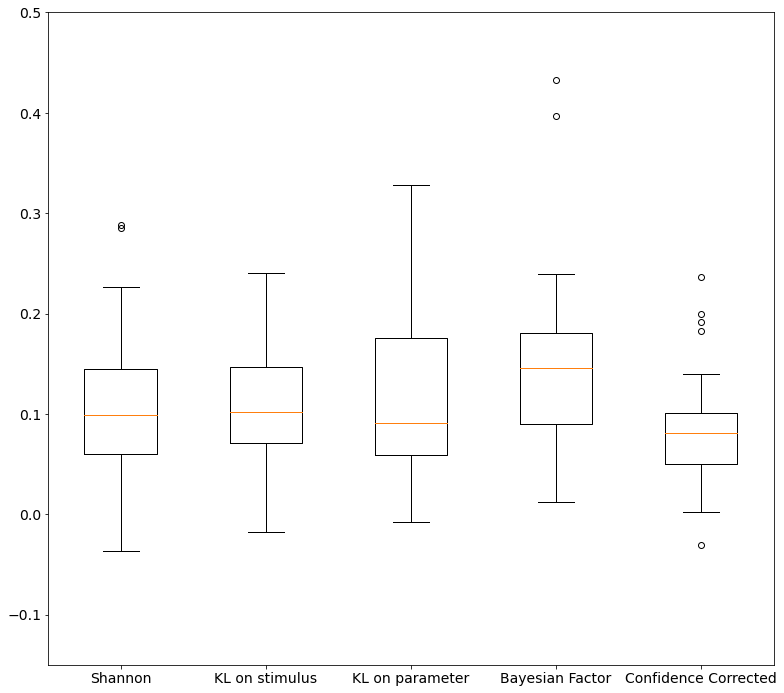

In [62]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Fz channel")
plt.boxplot(Fz_exponential_correlation.T,labels=Labels)
plt.ylim([-0.15,0.5])
plt.show()

### Pz, Exponential

#### Load Correlations

In [37]:
Pz_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
File_name = 'Shannon_Surprise_exponential_parameter_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)


a = np.load(File_path)
b = np.squeeze(a)
Pz_exponential_correlation[0,:] = b

## KL on Stimulus
File_name = 'KL_Surprise_on_stimulus_exponential_parameter_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)

Pz_exponential_correlation[1,:] = b


## KL on Parameter
File_name = 'KL_Surprise_on_parameter_exponential_parameter_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
Pz_exponential_correlation[2,:] = b

## BF surprise
File_name = 'BF_Surprise_exponential_m_linear_epsilon_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Pz_exponential_correlation[3,:] = b

## Confidence Corrected
File_name = 'confidence_surprise_exponential_parameter_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Pz_exponential_correlation[4,:] = b

(25,)
(25,)


### P_value 

In [74]:
z_value , p_value = stats.ttest_rel(Pz_exponential_correlation[3,:],Pz_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_exponential_correlation[3,:],Pz_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_exponential_correlation[3,:],Pz_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_exponential_correlation[3,:],Pz_exponential_correlation[4,:])
print(p_value)

z_value , p_value = stats.ttest_1samp(Pz_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_exponential_correlation[4,:],0,alternative="greater")
print(p_value)

0.020722460729134633
0.33335307444549755
0.01394623259482014
0.002704994459789626
0.0011211333095200492
3.2126089530813033e-07
0.00019430641389425025
4.003334166023208e-05
0.0015642800107716294


#### Show 

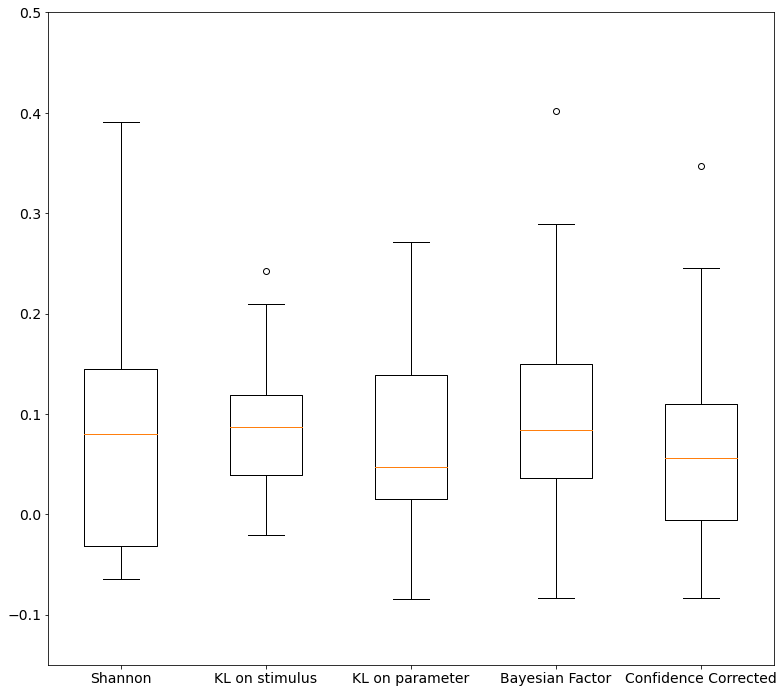

In [61]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Pz channel")
plt.boxplot(Pz_exponential_correlation.T,labels=Labels)
plt.ylim([-0.15,0.5])
plt.show()


### Fz FC3, Exponential

#### Load Correlations

In [10]:
Fz_FC3_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
File_name = 'Shannon_Surprise_exponential_parameter_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)


a = np.load(File_path)
b = np.squeeze(a)
Fz_FC3_exponential_correlation[0,:] = b

## KL on Stimulus
File_name = 'KL_Surprise_on_stimulus_exponential_parameter_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)

Fz_FC3_exponential_correlation[1,:] = b


## KL on Parameter
File_name = 'KL_Surprise_on_parameter_exponential_parameter_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
Fz_FC3_exponential_correlation[2,:] = b

## BF surprise
File_name = 'BF_Surprise_exponential_m_linear_epsilon_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_FC3_exponential_correlation[3,:] = b

## Confidence Corrected
File_name = 'confidence_surprise_exponential_parameter_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_FC3_exponential_correlation[4,:] = b

(25,)
(25,)


### P_value 

In [73]:
z_value , p_value = stats.ttest_rel(Fz_FC3_exponential_correlation[3,:],Fz_FC3_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_FC3_exponential_correlation[3,:],Fz_FC3_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_FC3_exponential_correlation[3,:],Fz_FC3_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_FC3_exponential_correlation[3,:],Fz_FC3_exponential_correlation[4,:])
print(p_value)

z_value , p_value = stats.ttest_1samp(Fz_FC3_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_FC3_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_FC3_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_FC3_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_FC3_exponential_correlation[4,:],0,alternative="greater")
print(p_value)

0.0004528369360756322
0.008652796611345378
0.00464185163048929
2.96553012154449e-05
2.190709767236774e-07
1.946489475112091e-09
2.2662727395917804e-07
1.3922696420637405e-07
5.118057797788527e-07


#### Show 

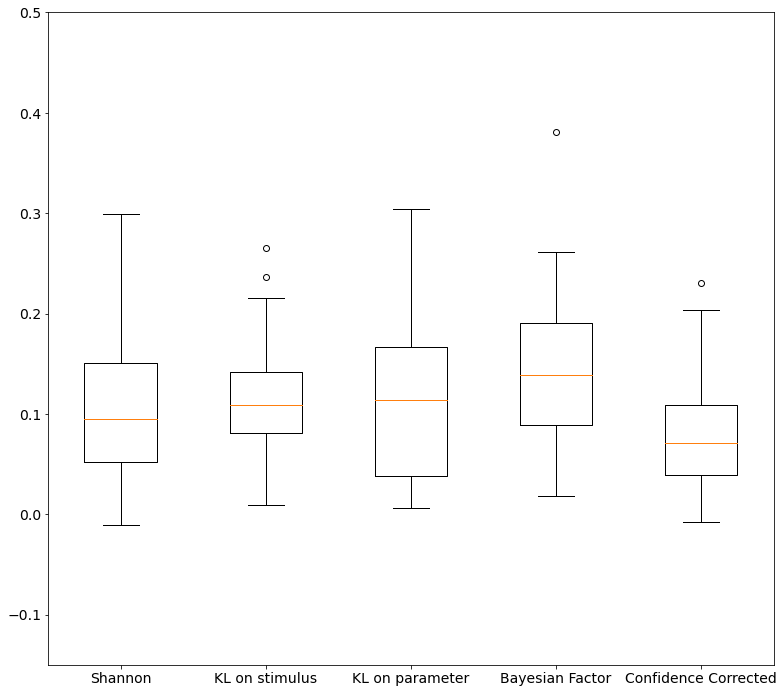

In [60]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Fz FC3 channel")
plt.boxplot(Fz_FC3_exponential_correlation.T,labels=Labels)
plt.ylim([-0.15,0.5])
plt.show()


### Fz FC4, Exponential

#### Load Correlations

In [13]:
Fz_FC4_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
File_name = 'Shannon_Surprise_exponential_parameter_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)


a = np.load(File_path)
b = np.squeeze(a)
Fz_FC4_exponential_correlation[0,:] = b

## KL on Stimulus
File_name = 'KL_Surprise_on_stimulus_exponential_parameter_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)

Fz_FC4_exponential_correlation[1,:] = b


## KL on Parameter
File_name = 'KL_Surprise_on_parameter_exponential_parameter_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
Fz_FC4_exponential_correlation[2,:] = b

## BF surprise
File_name = 'BF_Surprise_exponential_m_linear_epsilon_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_FC4_exponential_correlation[3,:] = b

## Confidence Corrected
File_name = 'confidence_surprise_exponential_parameter_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_FC4_exponential_correlation[4,:] = b

(25,)
(25,)


### P_value 

In [72]:
z_value , p_value = stats.ttest_rel(Fz_FC4_exponential_correlation[3,:],Fz_FC4_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_FC4_exponential_correlation[3,:],Fz_FC4_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_FC4_exponential_correlation[3,:],Fz_FC4_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_FC4_exponential_correlation[3,:],Fz_FC4_exponential_correlation[4,:])
print(p_value)

z_value , p_value = stats.ttest_1samp(Fz_FC4_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_FC4_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_FC4_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_FC4_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_FC4_exponential_correlation[4,:],0,alternative="greater")
print(p_value)

0.0008770446950944911
0.0016659160410085502
0.0016659160410085502
6.914591356433685e-05
1.6111665097197383e-07
5.718284602351559e-07
5.718284602351559e-07
8.568504754600373e-08
5.311356622747623e-07


#### Show 

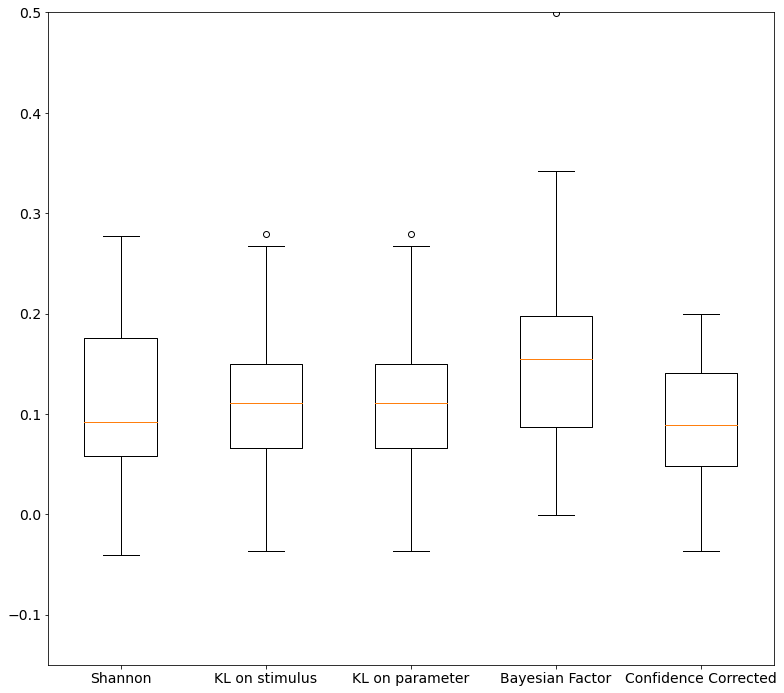

In [63]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Fz-FC4 channel")
plt.boxplot(Fz_FC4_exponential_correlation.T,labels=Labels)
plt.ylim([-0.15,0.5])
plt.show()

### Load Common Surprise Array

In [43]:
## Shannon
File_name = 'Shannon_Surprise_exponential_parameter_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
Shannon = np.squeeze(a)
print(Shannon.shape)

## KL on stimulus
File_name = 'KL_Surprise_on_stimulus_exponential_parameter_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
KL_on_Stimulus = np.squeeze(a)
print(KL_on_Stimulus.shape)

## KL on parameter
File_name = 'KL_Surprise_on_parameter_exponential_parameter_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
KL_on_parameters = np.squeeze(a)
print(KL_on_parameters.shape)

## BF surprise
File_name = 'BF_Surprise_exponential_m_linear_epsilon_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
BF_surprise = np.squeeze(a)
print(BF_surprise.shape)

## Confidence Corrected
File_name = 'confidence_surprise_exponential_parameter_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
Confidence_surprise = np.squeeze(a)
print(Confidence_surprise.shape)



(25, 6)
(25, 6)
(25, 6)
(25, 6)
(25, 6)


### Fz F3, Exponential

#### Load Correlations

In [20]:
Fz_F3_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
Fz_F3_exponential_correlation[0,:] = Shannon[:,0]

## KL on Stimulus
Fz_F3_exponential_correlation[1,:] = KL_on_Stimulus[:,0]


## KL on Parameter
Fz_F3_exponential_correlation[2,:] = KL_on_parameters[:,0]

## BF surprise
Fz_F3_exponential_correlation[3,:] = BF_surprise[:,0]

## Confidence Corrected
Fz_F3_exponential_correlation[4,:] = Confidence_surprise[:,0]

### P_value 

In [71]:
z_value , p_value = stats.ttest_rel(Fz_F3_exponential_correlation[3,:],Fz_F3_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_F3_exponential_correlation[3,:],Fz_F3_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_F3_exponential_correlation[3,:],Fz_F3_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_F3_exponential_correlation[3,:],Fz_F3_exponential_correlation[4,:])
print(p_value)
########
z_value , p_value = stats.ttest_1samp(Fz_F3_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_F3_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_F3_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_F3_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_F3_exponential_correlation[4,:],0,alternative="greater")
print(p_value)



0.00041831910418636646
0.009270922648358883
0.018666259362353266
8.101572558586525e-05
1.7392118588800694e-07
3.4988776657906127e-09
6.255636202742538e-07
5.971853562013629e-08
1.6603453866635778e-06


#### Show 

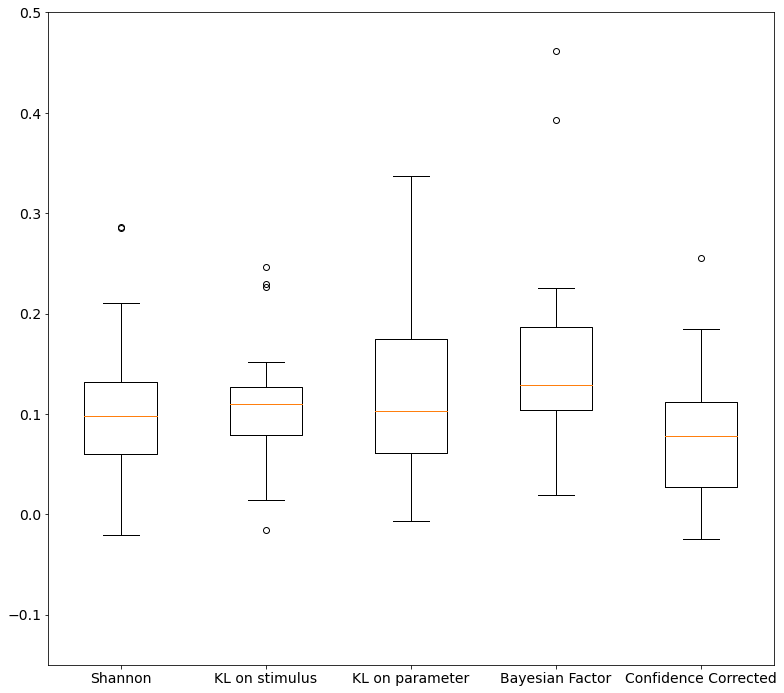

In [64]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Fz F3 channel")
plt.boxplot(Fz_F3_exponential_correlation.T,labels=Labels)
plt.ylim([-0.15,0.5])
plt.show()

### Fz F4, Exponential

#### Load Correlations

In [24]:
Fz_F4_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
Fz_F4_exponential_correlation[0,:] = Shannon[:,1]

## KL on Stimulus
Fz_F4_exponential_correlation[1,:] = KL_on_Stimulus[:,1]


## KL on Parameter
Fz_F4_exponential_correlation[2,:] = KL_on_parameters[:,1]

## BF surprise
Fz_F4_exponential_correlation[3,:] = BF_surprise[:,1]

## Confidence Corrected
Fz_F4_exponential_correlation[4,:] = Confidence_surprise[:,1]

### P_value 

In [76]:
z_value , p_value = stats.ttest_rel(Fz_F4_exponential_correlation[3,:],Fz_F4_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_F4_exponential_correlation[3,:],Fz_F4_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_F4_exponential_correlation[3,:],Fz_F4_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Fz_F4_exponential_correlation[3,:],Fz_F4_exponential_correlation[4,:])
print(p_value)

z_value , p_value = stats.ttest_1samp(Fz_F4_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_F4_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_F4_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_F4_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Fz_F4_exponential_correlation[4,:],0,alternative="greater")
print(p_value)

0.0008888422679894525
0.03184038803384528
0.010265443809841696
0.00028022880237889595
2.260275445890479e-06
7.079116521284926e-09
7.937476819662644e-06
5.002302420315725e-07
2.323257976552584e-06


#### Show 

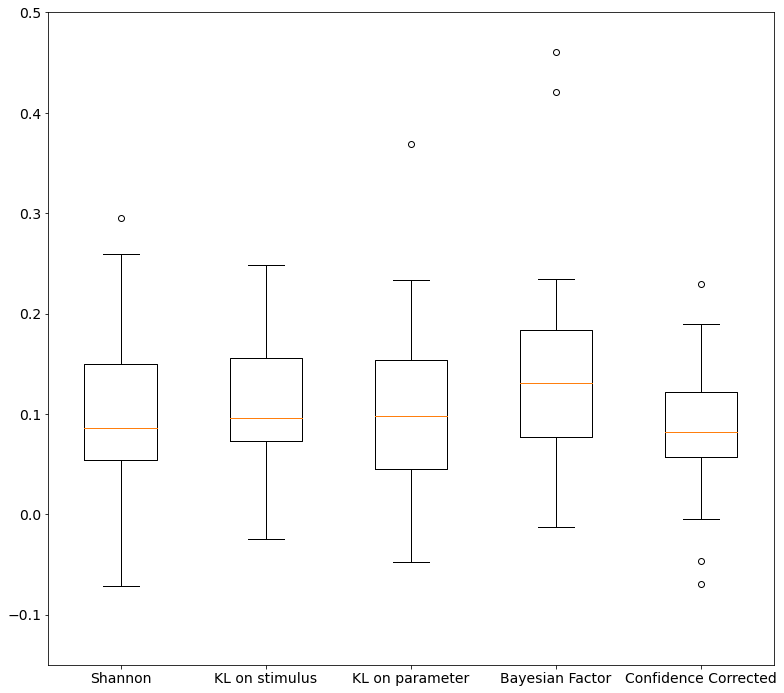

In [65]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Fz F4 channel")
plt.boxplot(Fz_F4_exponential_correlation.T,labels=Labels)
plt.ylim([-0.15,0.5])
plt.show()

### Pz FC3, Exponential

#### Load Correlations

In [46]:
Pz_FC3_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
Pz_FC3_exponential_correlation[0,:] = Shannon[:,2]

## KL on Stimulus
Pz_FC3_exponential_correlation[1,:] = KL_on_Stimulus[:,2]


## KL on Parameter
Pz_FC3_exponential_correlation[2,:] = KL_on_parameters[:,2]

## BF surprise
Pz_FC3_exponential_correlation[3,:] = BF_surprise[:,2]

## Confidence Corrected
Pz_FC3_exponential_correlation[4,:] = Confidence_surprise[:,2]

### P_value

In [83]:
z_value , p_value = stats.ttest_rel(Pz_FC3_exponential_correlation[3,:],Pz_FC3_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC3_exponential_correlation[3,:],Pz_FC3_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC3_exponential_correlation[3,:],Pz_FC3_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC3_exponential_correlation[3,:],Pz_FC3_exponential_correlation[4,:])
print(p_value)
##########################################
z_value , p_value = stats.ttest_1samp(Pz_FC3_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_FC3_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_FC3_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_FC3_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_FC3_exponential_correlation[4,:],0,alternative="greater")
print(p_value)
######################################
z_value , p_value = stats.ttest_rel(Pz_FC3_exponential_correlation[1,:],Pz_FC3_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC3_exponential_correlation[1,:],Pz_FC3_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC3_exponential_correlation[1,:],Pz_FC3_exponential_correlation[3,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC3_exponential_correlation[1,:],Pz_FC3_exponential_correlation[4,:])
print(p_value)

0.013403056517856244
0.22290277392331034
0.005617153167396493
0.0011619747884582174
0.0006127788842207897
5.973769945492338e-07
0.00028715776466455755
3.805042401805313e-05
0.0012880553798464076
0.7238170830217444
0.46056417408701544
0.22290277392331034
0.2119698510520414


#### Show 

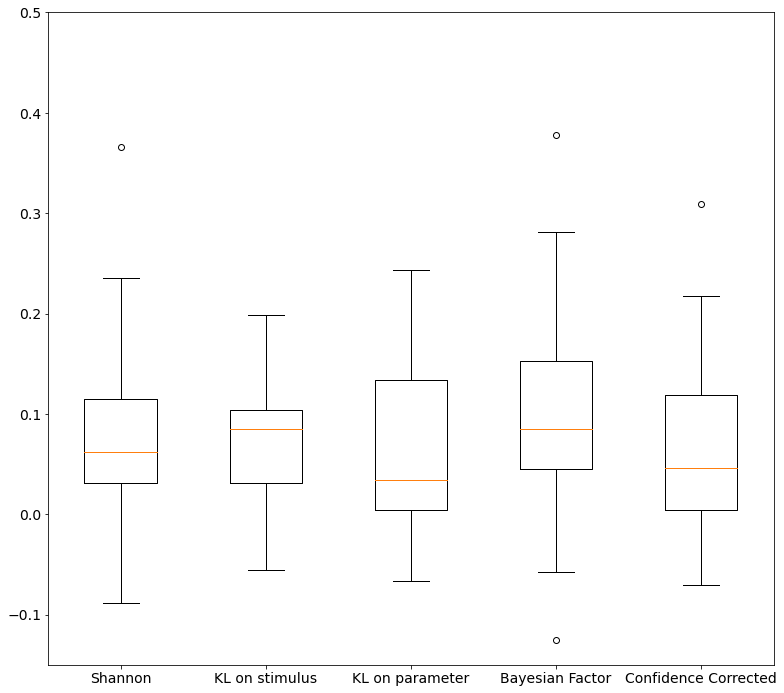

In [66]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Pz FC3 channel")
plt.ylim([-0.15,0.5])
plt.boxplot(Pz_FC3_exponential_correlation.T,labels=Labels)
plt.show()

### Pz FC4, Exponential

#### Load Correlations

In [50]:
Pz_FC4_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
Pz_FC4_exponential_correlation[0,:] = Shannon[:,3]

## KL on Stimulus
Pz_FC4_exponential_correlation[1,:] = KL_on_Stimulus[:,3]


## KL on Parameter
Pz_FC4_exponential_correlation[2,:] = KL_on_parameters[:,3]

## BF surprise
Pz_FC4_exponential_correlation[3,:] = BF_surprise[:,3]

## Confidence Corrected
Pz_FC4_exponential_correlation[4,:] = Confidence_surprise[:,3]

#### P_value

In [84]:
z_value , p_value = stats.ttest_rel(Pz_FC4_exponential_correlation[3,:],Pz_FC4_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC4_exponential_correlation[3,:],Pz_FC4_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC4_exponential_correlation[3,:],Pz_FC4_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC4_exponential_correlation[3,:],Pz_FC4_exponential_correlation[4,:])
print(p_value)

z_value , p_value = stats.ttest_1samp(Pz_FC4_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_FC4_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_FC4_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_FC4_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_FC4_exponential_correlation[4,:],0,alternative="greater")
print(p_value)

z_value , p_value = stats.ttest_rel(Pz_FC4_exponential_correlation[1,:],Pz_FC4_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC4_exponential_correlation[1,:],Pz_FC4_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC4_exponential_correlation[1,:],Pz_FC4_exponential_correlation[3,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_FC4_exponential_correlation[1,:],Pz_FC4_exponential_correlation[4,:])
print(p_value)

0.009461843325499023
0.18078592792331086
4.19664198794188e-05
0.0001430002190272495
0.0010789207087833913
1.4260894973717347e-06
0.0031229582429391227
4.8548689996935405e-05
0.0031860803357409858
0.6119457256000556
0.051393855242784794
0.18078592792331086
0.11551223028558477


#### Show 

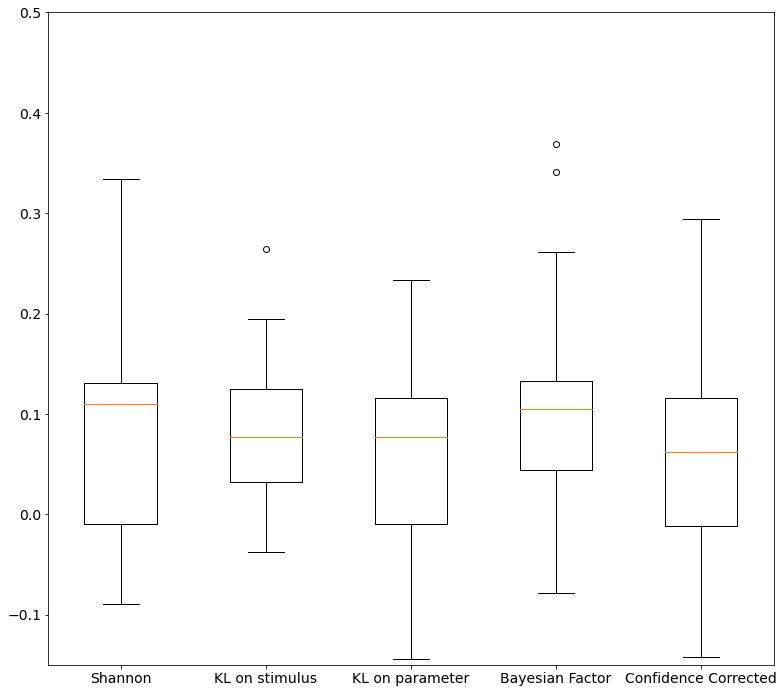

In [67]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Pz FC4 channel")
plt.ylim([-0.15,0.5])
plt.boxplot(Pz_FC4_exponential_correlation.T,labels=Labels)
plt.show()

### Pz F3, Exponential

#### Load Correlations

In [52]:
Pz_F3_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
Pz_F3_exponential_correlation[0,:] = Shannon[:,4]

## KL on Stimulus
Pz_F3_exponential_correlation[1,:] = KL_on_Stimulus[:,4]


## KL on Parameter
Pz_F3_exponential_correlation[2,:] = KL_on_parameters[:,4]

## BF surprise
Pz_F3_exponential_correlation[3,:] = BF_surprise[:,4]

## Confidence Corrected
Pz_F3_exponential_correlation[4,:] = Confidence_surprise[:,4]

### P_value

In [85]:
z_value , p_value = stats.ttest_rel(Pz_F3_exponential_correlation[3,:],Pz_F3_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F3_exponential_correlation[3,:],Pz_F3_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F3_exponential_correlation[3,:],Pz_F3_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F3_exponential_correlation[3,:],Pz_F3_exponential_correlation[4,:])
print(p_value)

z_value , p_value = stats.ttest_1samp(Pz_F3_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_F3_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_F3_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_F3_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_F3_exponential_correlation[4,:],0,alternative="greater")
print(p_value)


z_value , p_value = stats.ttest_rel(Pz_F3_exponential_correlation[1,:],Pz_F3_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F3_exponential_correlation[1,:],Pz_F3_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F3_exponential_correlation[1,:],Pz_F3_exponential_correlation[3,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F3_exponential_correlation[1,:],Pz_F3_exponential_correlation[4,:])
print(p_value)





0.006981174776548742
0.1398778741520648
0.012577963874611119
0.0012427119761934532
0.0015043484864417402
3.099946990141835e-06
0.0003781790564106142
3.658711256152809e-05
0.002885507966203255
0.7452368534255183
0.7061215537354739
0.1398778741520648
0.297686489816705


#### Show 

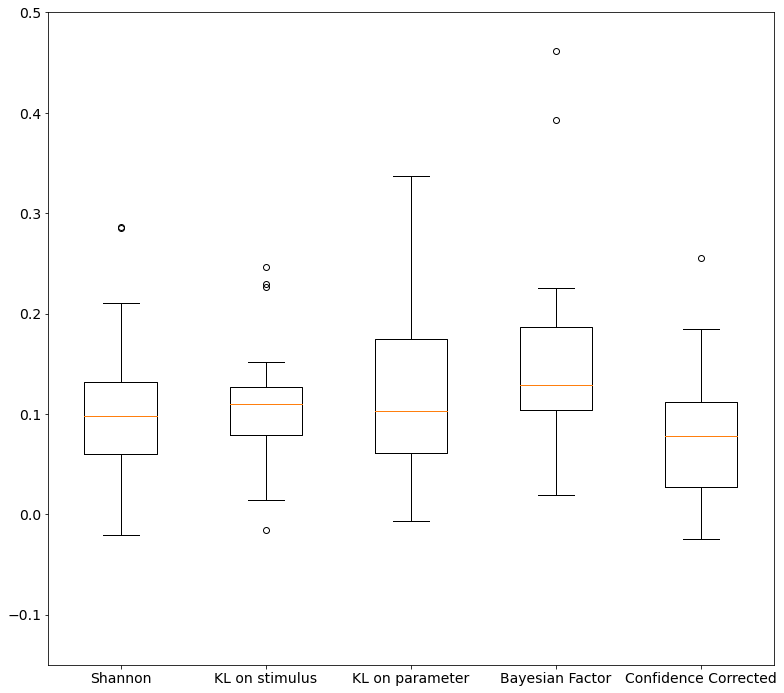

In [68]:
plt.figure(figsize=(13,12))
#plt.title("Correlation of PAC in Pz F3 channel")
plt.boxplot(Fz_F3_exponential_correlation.T,labels=Labels)
plt.ylim([-0.15,0.5])
plt.show()

### Pz F4, Exponential

#### Load Correlations

In [54]:
Pz_F4_exponential_correlation = np.zeros(shape=(5,25))
## Shannon
Pz_F4_exponential_correlation[0,:] = Shannon[:,4]

## KL on Stimulus
Pz_F4_exponential_correlation[1,:] = KL_on_Stimulus[:,4]


## KL on Parameter
Pz_F4_exponential_correlation[2,:] = KL_on_parameters[:,4]

## BF surprise
Pz_F4_exponential_correlation[3,:] = BF_surprise[:,4]

## Confidence Corrected
Pz_F4_exponential_correlation[4,:] = Confidence_surprise[:,4]

### P_value

In [86]:
z_value , p_value = stats.ttest_rel(Pz_F4_exponential_correlation[3,:],Pz_F4_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F4_exponential_correlation[3,:],Pz_F4_exponential_correlation[1,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F4_exponential_correlation[3,:],Pz_F4_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F4_exponential_correlation[3,:],Pz_F4_exponential_correlation[4,:])
print(p_value)

z_value , p_value = stats.ttest_1samp(Pz_F4_exponential_correlation[0,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_F4_exponential_correlation[1,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_F4_exponential_correlation[2,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_F4_exponential_correlation[3,:],0,alternative="greater")
print(p_value)
z_value , p_value = stats.ttest_1samp(Pz_F4_exponential_correlation[4,:],0,alternative="greater")
print(p_value)


z_value , p_value = stats.ttest_rel(Pz_F4_exponential_correlation[1,:],Pz_F4_exponential_correlation[0,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F4_exponential_correlation[1,:],Pz_F4_exponential_correlation[2,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F4_exponential_correlation[1,:],Pz_F4_exponential_correlation[3,:])
print(p_value)
z_value , p_value = stats.ttest_rel(Pz_F4_exponential_correlation[1,:],Pz_F4_exponential_correlation[4,:])
print(p_value)

0.006981174776548742
0.1398778741520648
0.012577963874611119
0.0012427119761934532
0.0015043484864417402
3.099946990141835e-06
0.0003781790564106142
3.658711256152809e-05
0.002885507966203255
0.7452368534255183
0.7061215537354739
0.1398778741520648
0.297686489816705


#### Show 

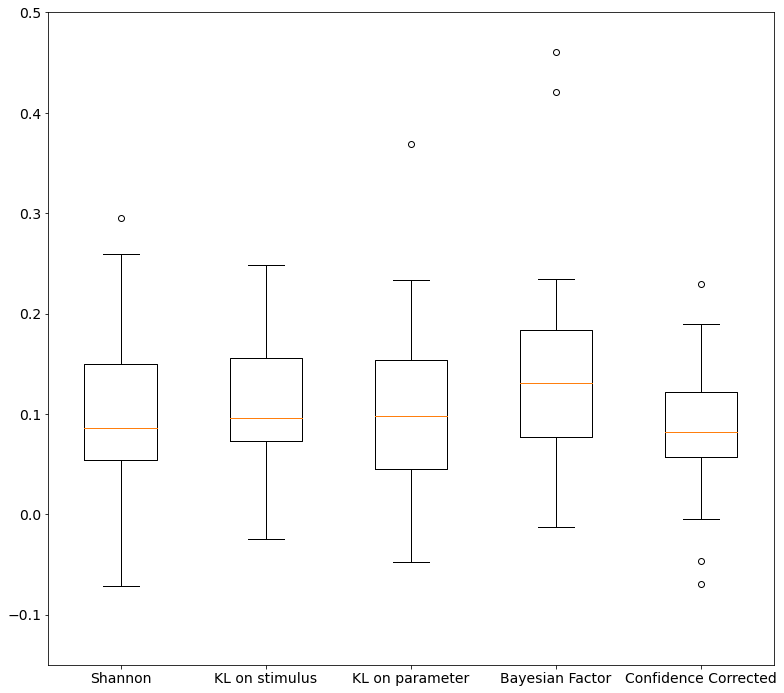

In [69]:
plt.figure(figsize=(13,12))
# plt.title("Correlation of PAC in Fz F4 channel")
plt.boxplot(Fz_F4_exponential_correlation.T,labels=Labels)
plt.ylim([-0.15,0.5])
plt.show()

### Fz, Linear

#### Load Correlations

In [5]:
Fz_linear_correlation = np.zeros(shape=(5,25))
## Shannon
File_name = 'Shannon_Surprise_linear_parameter_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)


a = np.load(File_path)
b = np.squeeze(a)
Fz_linear_correlation[0,:] = b[:,0]

## KL on Stimulus
File_name = 'KL_Surprise_on_stimulus_linear_parameter_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)

Fz_linear_correlation[1,:] = b[:,0]


## KL on Parameter
File_name = 'KL_Surprise_on_parameter_linear_parameter_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
Fz_linear_correlation[2,:] = b[:,0]

## BF surprise
File_name = 'BF_Surprise_linear_m_linear_epsilon_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_linear_correlation[3,:] = b

## Confidence Corrected
File_name = 'confidence_surprise_linear_parameter_PAC_over_Fz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_linear_correlation[4,:] = b

(25,)
(25,)


#### Show 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


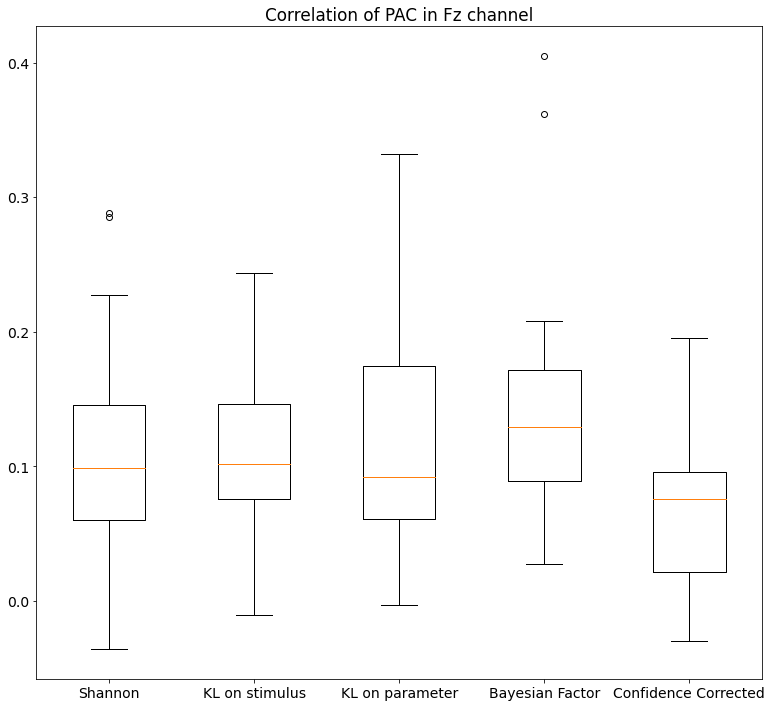

In [6]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Fz channel")
plt.boxplot(Fz_linear_correlation.T,labels=Labels)
plt.show()

### Pz, linear

#### Load Correlations

In [7]:
Pz_linear_correlation = np.zeros(shape=(5,25))
## Shannon
File_name = 'Shannon_Surprise_linear_parameter_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)


a = np.load(File_path)
b = np.squeeze(a)
Pz_linear_correlation[0,:] = b

## KL on Stimulus
File_name = 'KL_Surprise_on_stimulus_linear_parameter_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)

Pz_linear_correlation[1,:] = b


## KL on Parameter
File_name = 'KL_Surprise_on_parameter_linear_parameter_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
Pz_linear_correlation[2,:] = b

## BF surprise
File_name = 'BF_Surprise_linear_m_linear_epsilon_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Pz_linear_correlation[3,:] = b

## Confidence Corrected
File_name = 'confidence_surprise_linear_parameter_PAC_over_Pz_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Pz_linear_correlation[4,:] = b

(25,)
(25,)


#### Show 

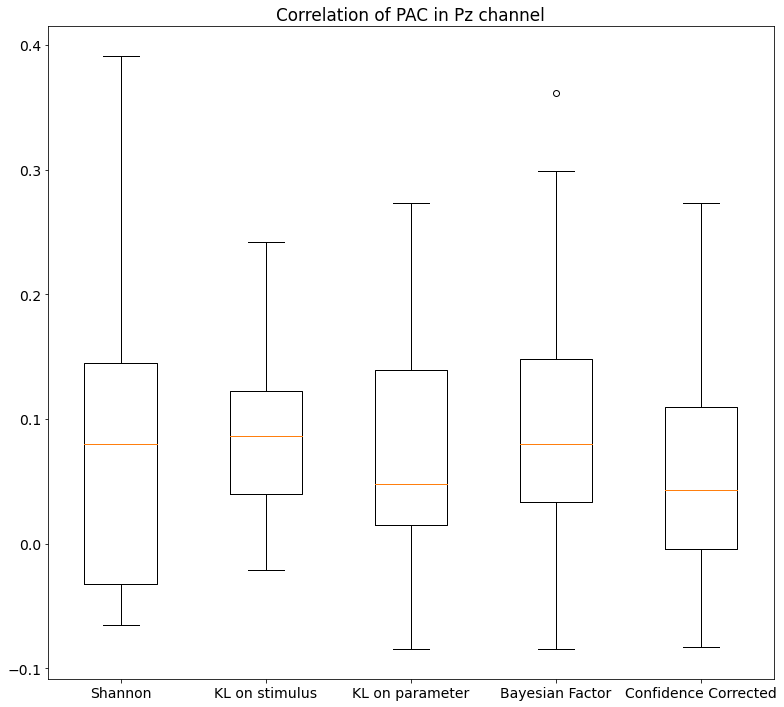

In [9]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Pz channel")
plt.boxplot(Pz_linear_correlation.T,labels=Labels)
plt.show()

### Fz FC3, linear

#### Load Correlations

In [10]:
Fz_FC3_linear_correlation = np.zeros(shape=(5,25))
## Shannon
File_name = 'Shannon_Surprise_linear_parameter_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)


a = np.load(File_path)
b = np.squeeze(a)
Fz_FC3_linear_correlation[0,:] = b

## KL on Stimulus
File_name = 'KL_Surprise_on_stimulus_linear_parameter_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)

Fz_FC3_linear_correlation[1,:] = b


## KL on Parameter
File_name = 'KL_Surprise_on_parameter_linear_parameter_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
Fz_FC3_linear_correlation[2,:] = b

## BF surprise
File_name = 'BF_Surprise_linear_m_linear_epsilon_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_FC3_linear_correlation[3,:] = b

## Confidence Corrected
File_name = 'confidence_surprise_linear_parameter_PAC_over_Fz_FC3_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_FC3_linear_correlation[4,:] = b

(25,)
(25,)


#### Show 

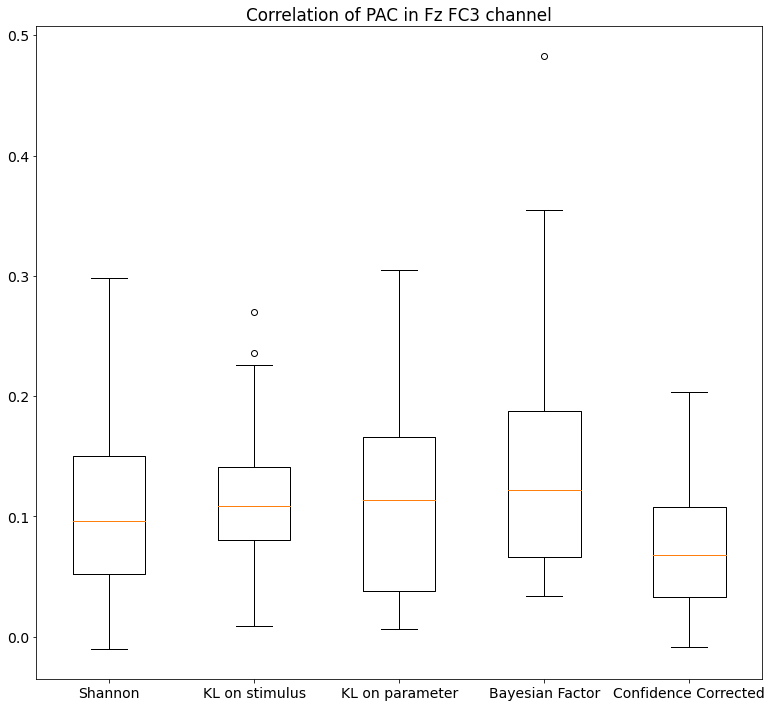

In [11]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Fz FC3 channel")
plt.boxplot(Fz_FC3_linear_correlation.T,labels=Labels)
plt.show()

### Fz FC4, Linear

#### Load Correlations

In [12]:
Fz_FC4_linear_correlation = np.zeros(shape=(5,25))
## Shannon
File_name = 'Shannon_Surprise_linear_parameter_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)


a = np.load(File_path)
b = np.squeeze(a)
Fz_FC4_linear_correlation[0,:] = b

## KL on Stimulus
File_name = 'KL_Surprise_on_stimulus_linear_parameter_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)

Fz_FC4_linear_correlation[1,:] = b


## KL on Parameter
File_name = 'KL_Surprise_on_parameter_linear_parameter_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
Fz_FC4_linear_correlation[2,:] = b

## BF surprise
File_name = 'BF_Surprise_linear_m_linear_epsilon_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_FC4_linear_correlation[3,:] = b

## Confidence Corrected
File_name = 'confidence_surprise_linear_parameter_PAC_over_Fz_FC4_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)

a = np.load(File_path)
b = np.squeeze(a)
print(b.shape)
Fz_FC4_linear_correlation[4,:] = b

(25,)
(25,)


#### Show 

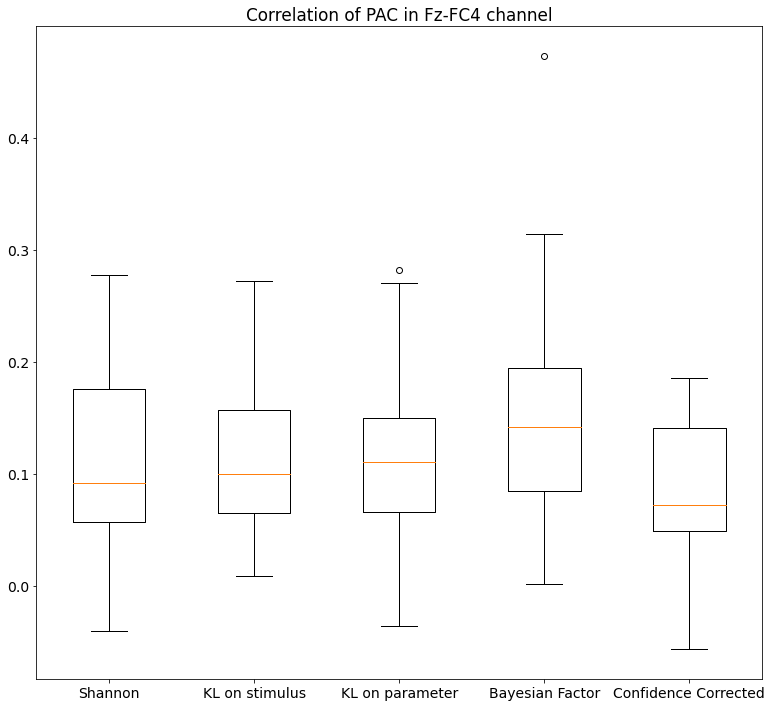

In [13]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Fz-FC4 channel")
plt.boxplot(Fz_FC4_linear_correlation.T,labels=Labels)
plt.show()

### Load Common Surprise Array

In [14]:
## Shannon
File_name = 'Shannon_Surprise_linear_parameter_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
Shannon = np.squeeze(a)
print(Shannon.shape)

## KL on stimulus
File_name = 'KL_Surprise_on_stimulus_linear_parameter_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
KL_on_Stimulus = np.squeeze(a)
print(KL_on_Stimulus.shape)

## KL on parameter
File_name = 'KL_Surprise_on_parameter_linear_parameter_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
KL_on_parameters = np.squeeze(a)
print(KL_on_parameters.shape)

## BF surprise
File_name = 'BF_Surprise_linear_m_linear_epsilon_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
BF_surprise = np.squeeze(a)
print(BF_surprise.shape)

## Confidence Corrected
File_name = 'confidence_surprise_linear_parameter_PAC_over_pairs_t_200_400.npy'
File_path = os.path.join(Load_path,File_name)
a = np.load(File_path)
Confidence_surprise = np.squeeze(a)
print(Confidence_surprise.shape)



(25, 6)
(25, 6)
(25, 6)
(25, 6)
(25, 6)


### Fz F3, Linear

#### Load Correlations

In [15]:
Fz_F3_linear_correlation = np.zeros(shape=(5,25))
## Shannon
Fz_F3_linear_correlation[0,:] = Shannon[:,0]

## KL on Stimulus
Fz_F3_linear_correlation[1,:] = KL_on_Stimulus[:,0]


## KL on Parameter
Fz_F3_linear_correlation[2,:] = KL_on_parameters[:,0]

## BF surprise
Fz_F3_linear_correlation[3,:] = BF_surprise[:,0]

## Confidence Corrected
Fz_F3_linear_correlation[4,:] = Confidence_surprise[:,0]

#### Show 

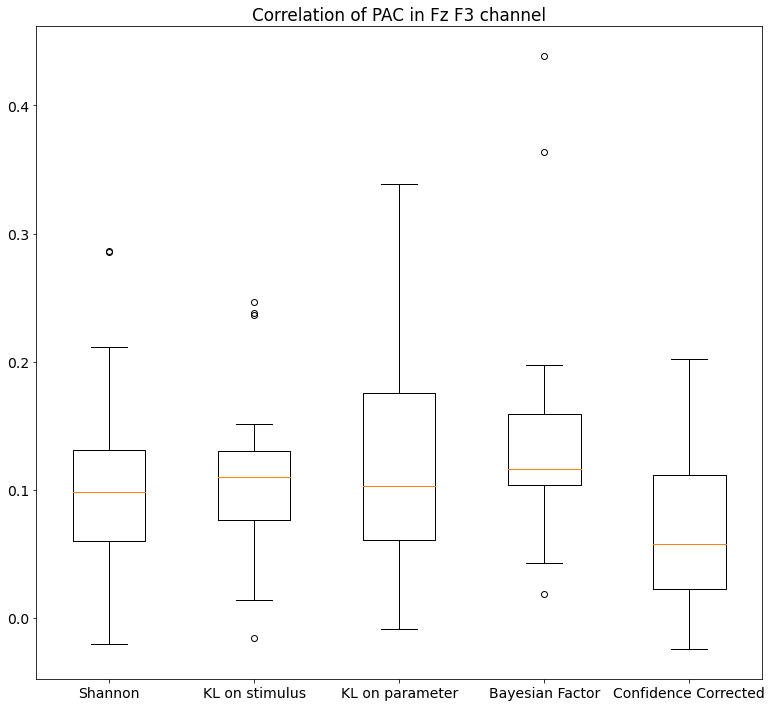

In [16]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Fz F3 channel")
plt.boxplot(Fz_F3_linear_correlation.T,labels=Labels)
plt.show()

### Fz F4, Linear

#### Load Correlations

In [17]:
Fz_F4_linear_correlation = np.zeros(shape=(5,25))
## Shannon
Fz_F4_linear_correlation[0,:] = Shannon[:,1]

## KL on Stimulus
Fz_F4_linear_correlation[1,:] = KL_on_Stimulus[:,1]


## KL on Parameter
Fz_F4_linear_correlation[2,:] = KL_on_parameters[:,1]

## BF surprise
Fz_F4_linear_correlation[3,:] = BF_surprise[:,1]

## Confidence Corrected
Fz_F4_linear_correlation[4,:] = Confidence_surprise[:,1]

#### Show 

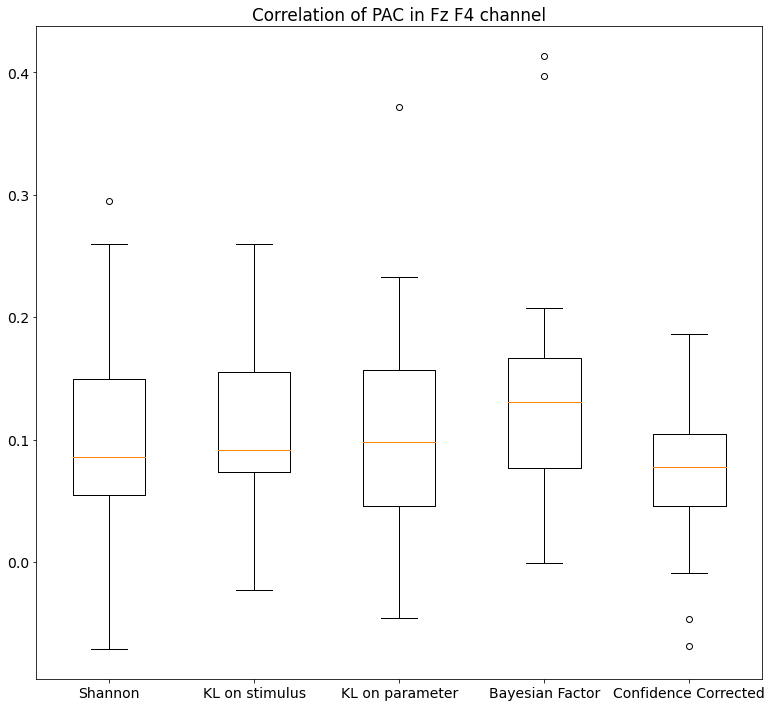

In [18]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Fz F4 channel")
plt.boxplot(Fz_F4_linear_correlation.T,labels=Labels)
plt.show()

### Pz FC3, Linear

#### Load Correlations

In [19]:
Pz_FC3_linear_correlation = np.zeros(shape=(5,25))
## Shannon
Pz_FC3_linear_correlation[0,:] = Shannon[:,2]

## KL on Stimulus
Pz_FC3_linear_correlation[1,:] = KL_on_Stimulus[:,2]


## KL on Parameter
Pz_FC3_linear_correlation[2,:] = KL_on_parameters[:,2]

## BF surprise
Pz_FC3_linear_correlation[3,:] = BF_surprise[:,2]

## Confidence Corrected
Pz_FC3_linear_correlation[4,:] = Confidence_surprise[:,2]

#### Show 

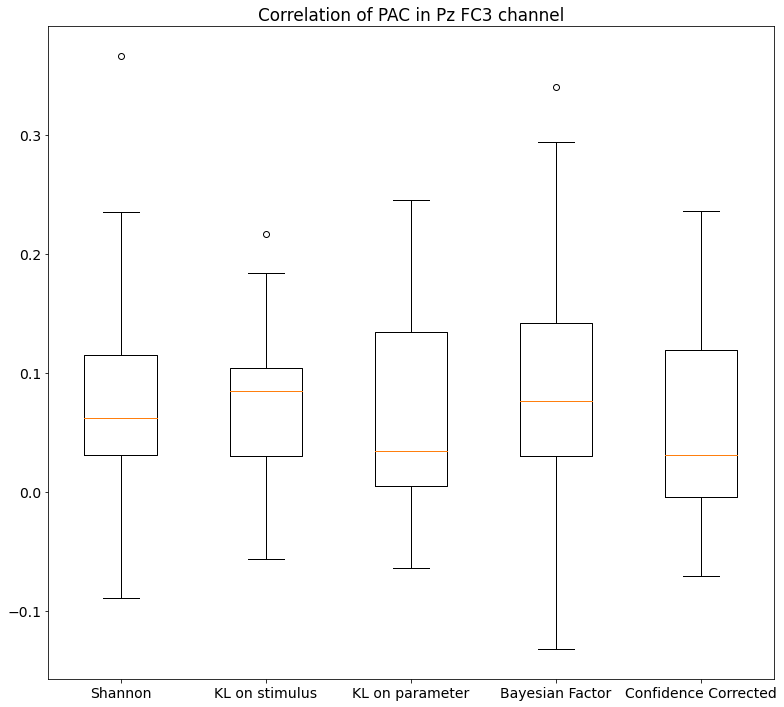

In [20]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Pz FC3 channel")
plt.boxplot(Pz_FC3_linear_correlation.T,labels=Labels)
plt.show()

### Pz FC4, Linear

#### Load Correlations

In [21]:
Pz_FC4_linear_correlation = np.zeros(shape=(5,25))
## Shannon
Pz_FC4_linear_correlation[0,:] = Shannon[:,3]

## KL on Stimulus
Pz_FC4_linear_correlation[1,:] = KL_on_Stimulus[:,3]


## KL on Parameter
Pz_FC4_linear_correlation[2,:] = KL_on_parameters[:,3]

## BF surprise
Pz_FC4_linear_correlation[3,:] = BF_surprise[:,3]

## Confidence Corrected
Pz_FC4_linear_correlation[4,:] = Confidence_surprise[:,3]

#### Show 

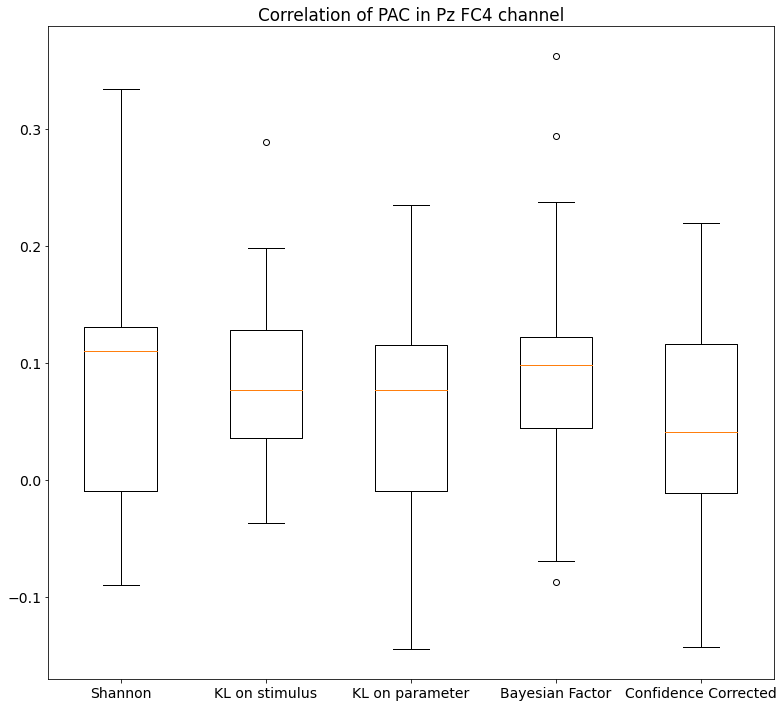

In [22]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Pz FC4 channel")
plt.boxplot(Pz_FC4_linear_correlation.T,labels=Labels)
plt.show()

### Pz F3, Linear

#### Load Correlations

In [23]:
Pz_F3_linear_correlation = np.zeros(shape=(5,25))
## Shannon
Pz_F3_linear_correlation[0,:] = Shannon[:,4]

## KL on Stimulus
Pz_F3_linear_correlation[1,:] = KL_on_Stimulus[:,4]


## KL on Parameter
Pz_F3_linear_correlation[2,:] = KL_on_parameters[:,4]

## BF surprise
Pz_F3_linear_correlation[3,:] = BF_surprise[:,4]

## Confidence Corrected
Pz_F3_linear_correlation[4,:] = Confidence_surprise[:,4]

#### Show 

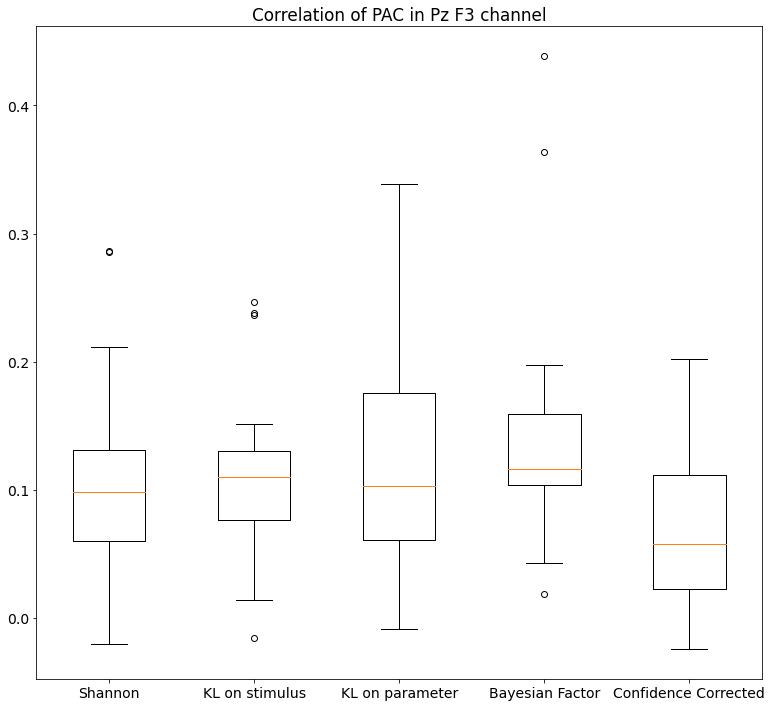

In [24]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Pz F3 channel")
plt.boxplot(Fz_F3_linear_correlation.T,labels=Labels)
plt.show()

### Pz F4, Linear

#### Load Correlations

In [25]:
Pz_F4_linear_correlation = np.zeros(shape=(5,25))
## Shannon
Pz_F4_linear_correlation[0,:] = Shannon[:,4]

## KL on Stimulus
Pz_F4_linear_correlation[1,:] = KL_on_Stimulus[:,4]


## KL on Parameter
Pz_F4_linear_correlation[2,:] = KL_on_parameters[:,4]

## BF surprise
Pz_F4_linear_correlation[3,:] = BF_surprise[:,4]

## Confidence Corrected
Pz_F4_linear_correlation[4,:] = Confidence_surprise[:,4]

#### Show 

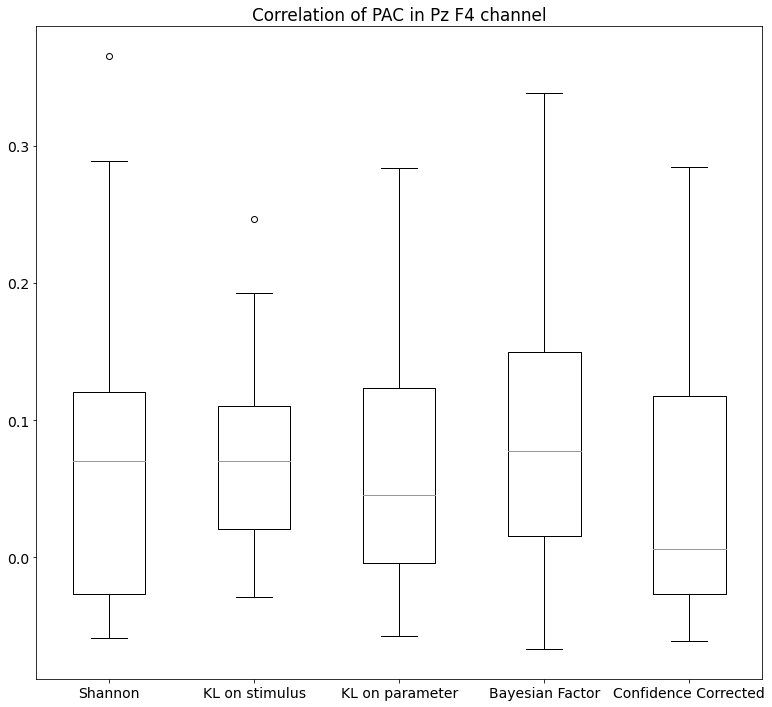

In [28]:
plt.figure(figsize=(13,12))
plt.title("Correlation of PAC in Pz F4 channel")
plt.boxplot(Pz_F4_linear_correlation.T,labels=Labels)
plt.show()